<a href="https://colab.research.google.com/github/Romainkul/Datathon_KUL/blob/main/Datathon_Preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import os
import polars as pl
import requests
from zipfile import ZipFile

# URL to the dataset and base directory where the dataset should reside.
url = "https://kuleuven-datathon-2025.s3.eu-central-1.amazonaws.com/Posters.zip"
base_dir = r"C:\Users\romai\Desktop\datathon\Posters"
zip_path = r"C:\Users\romai\Desktop\datathon\Posters.zip"

# Ensure the base directory exists.
os.makedirs(base_dir, exist_ok=True)

# Download the ZIP file only if it doesn't already exist.
if not os.path.exists(zip_path):
    print("Downloading dataset...")
    response = requests.get(url)
    response.raise_for_status()  # Raise an error for a bad status.
    with open(zip_path, "wb") as f:
        f.write(response.content)
    print("Download complete.")
else:
    print("Zip file already exists. Skipping download.")

# Check if the dataset has been extracted by looking for the 'raw' folder.
raw_dir = os.path.join(base_dir, 'raw')
if not os.path.exists(raw_dir):
    print("Extracting dataset...")
    with ZipFile(zip_path, "r") as zip_ref:
        zip_ref.extractall(base_dir)
    print("Extraction complete.")
else:
    print("Dataset already extracted.")

# Define the paths for the processed images and texts.
processed_dir = os.path.join(base_dir, 'preprocessed')
texts_dir = os.path.join(base_dir, 'texts')

# Map each raw subfolder to the languages that are expected to be available.
folder_language_map = {
    'double_page_german_dutch': ['german', 'dutch'],
    'multipart_dutch': ['dutch'],
    'multipart_french': ['french'],
    'single_patch_dutch': ['dutch'],
    'triple_page_german_dutch_french': ['german', 'dutch', 'french'],
}

# List of valid image extensions.
image_extensions = ('.png', '.jpg', '.jpeg', '.tif', '.tiff')

# Initialize lists for Polars DataFrame
raw_paths, german_processed, dutch_processed, french_processed = [], [], [], []
german_texts, dutch_texts, french_texts = [], [], []

# Loop through each subfolder in the raw directory.
for folder in os.listdir(raw_dir):
    folder_path = os.path.join(raw_dir, folder)
    if not os.path.isdir(folder_path):
        continue

    # Determine which languages are expected for this folder.
    languages = folder_language_map.get(folder, [])

    # Loop through each file in the raw subfolder.
    for filename in os.listdir(folder_path):
        if not filename.lower().endswith(image_extensions):
            continue

        # Full path to the raw image file.
        raw_file_path = os.path.join(folder_path, filename)

        # Prepare paths and texts for available languages
        processed_paths = {lang: os.path.join(processed_dir, lang, filename) if lang in languages else '' 
                           for lang in ['german', 'dutch', 'french']}
        
        texts = {}
        base_name, _ = os.path.splitext(filename)

        for lang in ['german', 'dutch', 'french']:
            text_file_path = os.path.join(texts_dir, lang, base_name + '.jpg.txt')
            if os.path.exists(text_file_path):
                try:
                    with open(text_file_path, 'r', encoding='utf-8') as tf:
                        texts[lang] = tf.read()
                except Exception as e:
                    print(f"Error reading {text_file_path}: {e}")
                    texts[lang] = ''
            else:
                texts[lang] = ''

        # Append data to lists
        raw_paths.append(raw_file_path)
        german_processed.append(processed_paths['german'])
        dutch_processed.append(processed_paths['dutch'])
        french_processed.append(processed_paths['french'])
        german_texts.append(texts['german'])
        dutch_texts.append(texts['dutch'])
        french_texts.append(texts['french'])

# Create a Polars DataFrame
df = pl.DataFrame({
    "raw": raw_paths,
    "german_processed": german_processed,
    "dutch_processed": dutch_processed,
    "french_processed": french_processed,
    "german_text": german_texts,
    "dutch_text": dutch_texts,
    "french_text": french_texts
})

# Preview the DataFrame
print(df.head())

# Optional: Save as a Parquet file for efficient storage
df.write_parquet(os.path.join(base_dir, "posters_data.parquet"))
print("Data saved as Parquet file.")

Zip file already exists. Skipping download.
Dataset already extracted.
shape: (5, 7)
‚îå‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îê
‚îÇ raw          ‚îÜ german_proc ‚îÜ dutch_proce ‚îÜ french_proc ‚îÜ german_text ‚îÜ dutch_text  ‚îÜ french_text ‚îÇ
‚îÇ ---          ‚îÜ essed       ‚îÜ ssed        ‚îÜ essed       ‚îÜ ---         ‚îÜ ---         ‚îÜ ---         ‚îÇ
‚îÇ str          ‚îÜ ---         ‚îÜ ---         ‚îÜ ---         ‚îÜ str         ‚îÜ str         ‚îÜ str         ‚îÇ
‚îÇ              ‚îÜ str         ‚îÜ str         ‚îÜ str         ‚îÜ             ‚îÜ             ‚îÜ             ‚îÇ
‚ïû‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ï

In [1]:
import os
import gc
import torch
import polars as pl
import numpy as np

from transformers import pipeline
from sentence_transformers import SentenceTransformer
import os
import polars as pl
import requests
from zipfile import ZipFile

# Disable wandb
os.environ["WANDB_DISABLED"] = "true"

# ---------------------------------------------
# Utility: chunk text so we don't exceed max tokens
# ---------------------------------------------
def chunk_text(text, chunk_size=512):
    """
    Splits text into smaller chunks while preserving words.
    """
    words = text.split()
    return [" ".join(words[i : i + chunk_size]) for i in range(0, len(words), chunk_size)]

# ---------------------------------------------
# 1) Language Detection
# ---------------------------------------------
def detect_language(df: pl.DataFrame) -> pl.DataFrame:
    """
    Loads the language detection pipeline once,
    sets the validation message if the detected language != expected.
    """
    # The known codes for each language
    expected_language_codes = {
        "german": "de",
        "dutch": "nl",
        "french": "fr"
    }
    
    print(f">> Loading language detection model  ...")
    lang_detector = pipeline(
        "text-classification",
        model="papluca/xlm-roberta-base-language-detection"
    )
    df_dicts = df.to_dicts()
    for lang in ['dutch', 'german', 'french']:
      for row in df_dicts:
          text = row.get(f"{lang}_text", "").strip()
          if not text:
              row[f"{lang}_text_validation"] = ""
              continue
          
          try:
              detected = lang_detector(text[:512])[0]["label"].lower()  # partial text is enough
          except Exception as e:
              print(f"Language detection error on row: {e}")
              detected = ""
          
          # If the detected code != the expected code, flag it
          expected_code = expected_language_codes.get(lang, "")
          if detected != expected_code:
              row[f"{lang}_text_validation"] = f"text in {lang} is not the right one"
          else:
              row[f"{lang}_text_validation"] = ""
    
    # Unload pipeline
    del lang_detector
    gc.collect()
    torch.cuda.empty_cache()

    return pl.DataFrame(df_dicts)

# ---------------------------------------------
# 2) Text Improvement
# ---------------------------------------------
def improve_text(df: pl.DataFrame) -> pl.DataFrame:
    """
    Loads the text-generation model once, only improves text
    if the previous validation said it's the correct language.
    """
    improvement_prompt = {
        "german": (
            "Du bist ein OCR-Korrektor. Korrigiere nur OCR-Fehler und √§ndere sonst nichts. "
            "Gib ausschlie√ülich den korrigierten Text zur√ºck, ohne jegliche Kommentare oder Erkl√§rungen. "
            "Korrigiere nur die OCR-Fehler in dem Text, den der Benutzer senden wird. "
            "Antworte NUR mit dem komplett korrigierten Text, ohne jegliche Erl√§uterungen oder Kommentare."
        ),
        "dutch": (
            "Je bent een OCR-corrector. Corrigeer uitsluitend OCR-fouten en verander verder niets. "
            "Corrigeer alleen de OCR-fouten in de tekst die de gebruiker zal sturen. "
            "Geef uitsluitend de volledig gecorrigeerde tekst terug, zonder enige toelichting."
        ),
        "french": (
            "Vous √™tes un correcteur OCR. Ne corrigez que les erreurs d'OCR et ne modifiez rien d'autre. "
            "Corrigez uniquement les erreurs d‚ÄôOCR dans le texte que l‚Äôutilisateur va envoyer. "
            "R√©pondez exclusivement avec la version int√©gralement corrig√©e, sans aucune explication ni commentaire."
        ),
    }
    
    models={'german':'meta-llama/Llama-3.2-1B-Instruct','dutch':'utter-project/EuroLLM-1.7B-Instruct','french':'meta-llama/Llama-3.2-1B-Instruct'}

    print(f">> Loading text-improvement model ...")
    #imp_pipeline = pipeline("text-generation", model="BSC-LT/salamandra-2b-instruct") #pipeline("text-generation", model="stabilityai/stablelm-2-1_6b")
    df_dicts = df.to_dicts()
    for lang in ['german', 'dutch', 'french']:
      imp_pipeline = pipeline("text-generation", model=models[lang])
      for row in df_dicts:
          validation = row.get(f"{lang}_text_validation", "")
          original_text = row.get(f"{lang}_text", "").strip()

          # If text is empty or we already flagged the language as incorrect, skip improvement
          if not original_text or "not the right one" in validation:
              row[f"improved_{lang}_text"] = original_text
              continue

          # Otherwise, correct the text
          chunks = chunk_text(original_text, chunk_size=512)
          improved_pieces = []
          for chunk in chunks:
            prompt = [{"role": "system", "content": improvement_prompt[lang]},
                        {"role": "user", "content": chunk}]
            try:
                result = imp_pipeline(prompt, max_new_tokens=256)
                  # The pipeline might echo the prompt, so remove it if present
                full_gen = result[-1]["generated_text"][-1]['content']
                  # For safety: remove any leading copy of 'prompt'
                #cleaned = full_gen.replace(prompt, "").strip()
                improved_pieces.append(full_gen if full_gen else chunk)
            except Exception as e:
                  print(f"Improvement error: {e}")
                  improved_pieces.append(chunk)
          print(" ".join(improved_pieces))
          row[f"improved_{lang}_text"] = " ".join(improved_pieces)

      # Unload pipeline
      del imp_pipeline
      gc.collect()
      torch.cuda.empty_cache()

    return pl.DataFrame(df_dicts)

# ---------------------------------------------
# 3) Sentiment Analysis
# ---------------------------------------------
def get_sentiment_score(text,sentiment_pipeline, chunk_size=300):
    """
    Computes sentiment score by chunking text and averaging star ratings (1-5).
    """
    chunks = chunk_text(text, chunk_size)
    scores = []
    for chunk in chunks:
        try:
            result = sentiment_pipeline(chunk, truncation=True, max_length=512)
            label = result[0]['label']  # e.g. '4 stars'
            scores.append(int(label.split()[0]))
        except:
            pass
    return sum(scores)/len(scores) if scores else None

def analyze_sentiment(df: pl.DataFrame) -> pl.DataFrame:
    """
    Loads the sentiment pipeline once, applies to improved texts,
    then unloads.
    """
    print(f">> Loading sentiment model ...")
    sentiment_pipe = pipeline(
        "sentiment-analysis",
        model="nlptown/bert-base-multilingual-uncased-sentiment"
    )

    df_dicts = df.to_dicts()
    for lang in ['dutch', 'german', 'french']:
      for row in df_dicts:
          text = row.get(f"improved_{lang}_text", "").strip()
          if not text:
              row[f"sentiment_{lang}"] = ""
              continue
          
          score = None
          try:
              # We reuse the chunk-based function:
              def local_chunker(txt):
                  for subchunk in chunk_text(txt, 300):
                      yield subchunk

              all_scores = []
              for sub in local_chunker(text):
                  result = sentiment_pipe(sub, truncation=True, max_length=512)
                  label = result[0]['label']
                  all_scores.append(int(label.split()[0]))
              if all_scores:
                  score = sum(all_scores)/len(all_scores)
          except Exception as e:
              print(f"Sentiment error: {e}")
              score = None
          
          if score is not None:
              row[f"sentiment_{lang}"] = f"{score:.2f} stars"
          else:
              row[f"sentiment_{lang}"] = ""

    # Unload pipeline
    del sentiment_pipe
    gc.collect()
    torch.cuda.empty_cache()

    return pl.DataFrame(df_dicts)

# ---------------------------------------------
# 4) Named Entity Recognition
# ---------------------------------------------
def extract_time_location(text):
    """
    Extracts time and location entities using NER.
    """
    if not text.strip():
        return "", ""
    results = ner_pipe(text)
    
    times = {ent['word'] for ent in results if 'TIME' in ent.get('entity', '').upper()}
    locs  = {ent['word'] for ent in results if 'LOC' in ent.get('entity', '').upper()}
    return " ".join(times), " ".join(locs)

def recognize_entities(df: pl.DataFrame) -> pl.DataFrame:
    """
    Loads the NER pipeline once, applies to improved text, unloads after.
    """
    print(f">> Loading NER model...")
    global ner_pipe
    ner_pipe = pipeline(
        "token-classification",
        model="Babelscape/wikineural-multilingual-ner"
    )

    df_dicts = df.to_dicts()
    for lang in ['dutch', 'german', 'french']:
      for row in df_dicts:
          text = row.get(f"improved_{lang}_text", "").strip()
          if not text:
              row[f"extracted_time_{lang}"] = ""
              row[f"extracted_location_{lang}"] = ""
              continue

          t, loc = extract_time_location(text)
          row[f"extracted_time_{lang}"] = t
          row[f"extracted_location_{lang}"] = loc

    # Unload pipeline
    del ner_pipe
    gc.collect()
    torch.cuda.empty_cache()

    return pl.DataFrame(df_dicts)

# ---------------------------------------------
# 5) Zero-Shot Topic Classification
# ---------------------------------------------
WW1_LABELS = [
    "military orders","martial law","war propaganda","German army decrees",
    "anti-resistance measures","civilian resistance","spying and informants",
    "penalties and punishments","executions","arrests and detentions",
    "occupation policies","curfews","travel restrictions","collaboration",
    "civilian cooperation","deportations","censorship","press restrictions",
    "public information control","war economy","wartime taxation","forced labor",
    "food supply","rationing","price controls","black market suppression",
    "public safety","health regulations","refugee management","forced evacuations",
    "civilian trials","public executions","house searches","checkpoint controls",
    "German language imposition","educational censorship","public gathering bans"
]

def zero_shot_topics(df: pl.DataFrame) -> pl.DataFrame:
    """
    Loads a zero-shot classification model once, applies to each row,
    and unloads.
    """
    print(f">> Loading zero-shot model ...")
    zshot_pipeline = pipeline(
        "zero-shot-classification",
        model="joeddav/xlm-roberta-large-xnli",
        force_download=True
    )
    
    df_dicts = df.to_dicts()
    for lang in ['dutch', 'german', 'french']:
      for row in df_dicts:
          text = row.get(f"improved_{lang}_text", "").strip()
          if not text:
              row[f"topics_{lang}_text"] = ""
              continue
          
          try:
              result = zshot_pipeline(
                  text,
                  candidate_labels=WW1_LABELS,
                  multi_label=True
              )
              extracted = [
                  lbl
                  for lbl, score in zip(result["labels"], result["scores"])
                  if score > 0.5
              ]
              row[f"topics_{lang}_text"] = ", ".join(extracted)
          except Exception as e:
              print(f"Zero-shot error: {e}")
              row[f"topics_{lang}_text"] = ""

    # Unload pipeline
    del zshot_pipeline
    gc.collect()
    torch.cuda.empty_cache()

    return pl.DataFrame(df_dicts)

# ---------------------------------------------
# 6) Embeddings
# ---------------------------------------------
def compute_embeddings(df: pl.DataFrame) -> pl.DataFrame:
    """
    Loads the SentenceTransformer once, encodes each improved text, unloads.
    """
    print(f">> Loading embedding model ...")
    emb_model = SentenceTransformer('paraphrase-multilingual-MiniLM-L12-v2')

    df_dicts = df.to_dicts()
    for lang in ['dutch', 'german', 'french']:
      for row in df_dicts:
          text = row.get(f"improved_{lang}_text", "").strip()
          if not text:
              row[f"{lang}_embedding"] = []
              continue
          try:
              emb = emb_model.encode(text).tolist()
              row[f"{lang}_embedding"] = emb
          except Exception as e:
              print(f"Embedding error: {e}")
              row[f"{lang}_embedding"] = []

    # Unload model
    del emb_model
    gc.collect()
    torch.cuda.empty_cache()

    return pl.DataFrame(df_dicts)


# ---------------------------------------------
#                  Main Flow
# ---------------------------------------------
def process_language(df: pl.DataFrame) -> pl.DataFrame:
    """
    Runs each step in the desired order for a specific language
    and returns the updated DataFrame.
    1) Language detection
    2) Improve text only if correct
    3) Sentiment
    4) NER
    5) Zero-shot classification
    6) Embeddings
    """
    print(f"===== Processing =====")
    df = detect_language(df)
    df = improve_text(df)
    df = analyze_sentiment(df)
    df = recognize_entities(df)
    df = zero_shot_topics(df)
    df = compute_embeddings(df)
    return df


if __name__ == "__main__":
  df = pl.read_parquet(r"C:\Users\romai\Desktop\datathon\Posters\posters_data.parquet")
  df = process_language(df)
  df.write_parquet("preprocessed_df.parquet")

c:\Users\romai\Desktop\datathon\Datathon_KUL\.conda\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


===== Processing =====
>> Loading language detection model  ...
>> Loading text-improvement model ...


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.
Starting from v4.46, the `logits` model output will have the same type as the model (except at train time, where it will always be FP32)
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


pt a AM oe _finden die Kontrollen der in der Gemeinde = : wohnenden mannlichen Belgier, die in den Jahren 1885 bis 1898 geboren sind, der Mitglieder der ehemaligen Garde civique, der in ihre Heimat. - entlassenen a Mag Oe feindlichen_ Kriegsteilnehmer und der feindlichen Auslander statt. : Die Kontrolle erfolgt in : | ee oe, um Uhr vormittags (deutsche Zeit). Den Anordnungen der Wachmannschaften und der bei der Kontrolle anwesenden belgischen Polizei- und Gemeindebeamten ist ‚Äî unbedingt Folge zu leisten. Die anwesenden Truppen sind angewiesen, im Bedarfsfalle von den Waffen Gebrauch zu machen. : Die Kontr ollpflichtigen unterstehen am Kontrolltage d den deutschen Kriegsgesetzen. ‚Äî a Bei der Oniollversimanlung ist Rauchen, sowie das Tragen von : Abzeichen verboten, ca seas he: andere Storung der Offentlichen Ordnung. Der Verka


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


Ende Marz 1916 wurden in einem hiesigen Bahnhof 15 Fasser Kakao gestohlen. Wer Angaben macht, die zur Wieder-erlangung des gestohlenen Gutes fahren, hat - eine entsprechende Belohnung zu erwarten. Angaben sind zu richten an den Militar-Polizeimeister Abtlg. Ila, Geschattszimmer 17. Antwerpen, den 29. Mai 1916. Der Kommandant, von FORSTER, Oberst. Druckerei KARL BROEL, Antwerpen.


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


Unter Bezugnahme auf ¬ß 4 der Verordnung des Kaiserlichen Generalgouvernements vom 8. Juli 1916 betr. Bestandsmeldung von KUPFER und ZINN (Ges. u. Verordnungsblatt Nr. 259, S. 2445 ff.) bestimme ich folgendes:

Die Meldescheine gelbe Farbe f√ºr die Best√§nde der Klassen 4 bis 24; gr√ºne Farbe f√ºr die Best√§nde der Klassen 25 bis 27 sind von den anzeigepflichtigen Personen sofort auf die Gemeindeh√§user abzuholen und selbst abzugeben. Sofern ein Anzeigepflichtiger besorgt ist, dass eine Vorschrift im 1. Zweifel ist, hat er sich vor Ausfillung des Meldescheins in der Artilleriekaserne Lier, Stube Nr. 55 pers√∂nlich einzufinden oder einen Sachverst√§ndigen hierher zu senden, um die notwendige Belehrung einzuholen. Kontrolle der Vollst√§ndigkeit und Richtigkeit der Anmeldungen behalte ich mir vor. Ich weise darauf hin


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


Zur Durchtihrung der durch Verordnung des Kaiserl. General-Gouvernements in Belgien vom 8. Juli 1916 angeordneten Bestandsanmeldungen von Kupfer und Zinn werden von den zustandigen Oriskommandanturen in der Zeit vom Meldescheine ausgegeben, die von den nach ¬ß 2 der Verordnung anzeigepflichtigen Personen und Gesellschalten pp. wahrend der Geschaltsstunden von 8 Uhr vorm.- 12 Uhr mit- tags und 3 Uhr bis 7 Uhr nachm.in Empfang zu nehmen sind. ‚Äî Um eine gewissenhafte Anmeldung der Bestande zu ermoglichen und dadureh allen Weiterungen und Ruckfragen aus dem Wege zu gehen, ist es notwendig, dass die anzeige- pflichtigen Personen selbst das Formular zum Meldeschein bei der zustandigen Ortskommandantur, iber die notwendigenfalls bei der Gemeindebehorde Auskunft gegeben wird, in Empfang nehmen. Die Gesellschaften pp. haben damit einem vertretungsberechtigten und √ºber den Fabrik


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


Die Verwaltungschefs f√ºr Flandern und Wallonien haben in Ausfiihrung des Art. 10 der Verordnung des Herrn General-Gouverneurs vom 22. August 1916 betr. den Verkehr mit Butter die dem Hersteller f√ºr seinen Higenbedarf zustehende Buttermenge bis auf Weiteres mit pees Diese Bestimmung tritt am 1. August 1917 in Kraft; ihre Nichtbefolgung wird mit t den in dem einzigen Aces der Verordnung vom 18. Oktober 1916 Benanntey Strafen geahndet. Antwerpen, den 30. Juli 1917. Der 'Prasident der Zivilverwaltung f√ºr die Provinz Antwerpen SCHRAMM Form. 4086. e e, Senator.


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


VERORDNUNG betreffend die Unterrichtssprache an den mittleren Unterrichtsanstalten. Unter Aufhebung der Artikel 1 bis einschlie√ülich 5 des Gesetzes vom 15. Juni 1883 itiber den Gebrauch der niederl√§ndischen Sprache beim mittleren Unterricht in Flandern uad des Gesetzes vom 12. Mai 1910 iiber das Studium der modernen Sprache an den mittleren Unterrichtsanstalten verordne ich folgendes:

Artikel 4: In allen den Gesetzen vom 1. Juni 1850 und vom 15. Juni 1881 uaterliegenden. Verordnung einschlie√ülich der ihnen angegliederten Kindergarten, vorbereitenden und anderen Abteilungen wird der Unterricht in der niederl√§ndischen Landessprache erteilt mit Ausnahme der modernen Fremdsprachen, die in diesen Sprachen selbst unterrichtet werden k√∂nnen.

4. Der Minister f√ºr Wissenschaft und Kunst kann f√ºr eine bis 1. September 1925 wahrende √úbergangzeit besondere Anstalten oder besondere Abteilungen mit und 2 eingereichtet ist, oder 2. die in Artikel 10 und 12 des Gesetzes vom 10. April 1890 vor

Setting `pad_token_id` to `eos_token_id`:None for open-end generation.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


VERORDNUNG betreffend die Unterrichtssprache an den mittleren Unterrichtsanstalten

Unter Aufhebung der Artikel 1 bis einschlie√ülich 5 des Gesetzes vom 15. Juni 1883 itiber den Gebrauch der niederl√§ndischen Sprache beim mittleren Unterricht in Flandern uad des Gesetzes vom 12. Mai 1910 iiber das Studium der modernen Sprache im mittleren Unterrichtsanstalt hoher Grades verordne ich folgendes:

4. In allen den Gesetzen vom 1. Juni 1850 und vom 15. Juni 1881 uaterliegenden. Uaterreibiucaatalion einschliesslich der ihnen angegliederten Kindergarten, vorbereitenden und anderen Abteilungen wird der Unterricht in der niederl√§ndischen Sprache erteilt mit Ausnahme der modernen Fremdsprachen, die in diesen Sprachen selbst unterrichtet werden k√∂nnen.

5. In den Gemeinden Anderlecht-Kuregem, Briissel, Elsene, Etterbeek, Sint-Gillis, S und 2 eingereichtet ist, oder 2. die in Artikel 10 und 12 des Gesetzes vom 10. April 1890 vorgeschriebene vorbereitende Priifung in niederlandischer Sprache abge

Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


Es wird erneut in Erinnerung gebracht, dass im Befehlsbereich des Generalgouvernements Beschlagnahmen und die zu diesem 'Lweck erforderlichen Feststellungen nur von solchen Personen vorgenommen werden diirfen, die im Besitz einer auf den Namen des Inhabers ausgesteliten, mit Dienstsiegel und einem Vermerk iiber die Giltigkeitsdauer versehenen Ausweiskarte nach wach- stehend abgedrucktem Muster sind. ca | Jeder Missbrauch mit diesen Karten wird schwer geahndet. Vorderseite. : Ausweiskarte 'Nr. 20002. Bewijskaart Piece eumpey wa pally Giiltig vom. ee bis Geldig van tot Valable du ‚Äî ‚Äò au Inhaber dieses De drager van dese kaart ; (Dienstgrad oder Beruf, Vor- und Zuname) Le porteur de la pr√©sente von der _ van de. (Angabe der Dienststelle) ‚Äî du service de. ist berechtigt, auf Befehl des Generalgouvernements zu heachlagakh


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


Auf Grund der Verordnung vom 13. April 1917 betreffend den Gasverbrauch wird bestimmt, dass dank 1/3 der bisher verbrauchten Menge weiter verbraucht werden darf, JEDOCH AUS ENZUGLUNDHANDLUNGEN werden gem√§√ü (Aifi. 4 der vorstehend genannten Verordnung bestraft.


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


Gouvernements. Der Deutsche Pageshericht BERLIN, 1. Mai. (Amtliche Meldung von heute mittag.) Westlicher Kriegsschauplatz. - Die gestern gemeldeten Kampfe auf dem westlichen Kanalufer nordwestlich von Ypern endeten mit einem sehr verlustreichen Miss- erfolg des Feindes. Oestlich des Kanals no√©rd- lich von Ypern stiess der Feind mehrere Male vergeblich vor. Die Festung Diinkirchen wurde weiter unter Artilleriefeuer gehalten. Zwischen Maas und Mosel kam es zu|{ Infanteriekaimpfen nur in der Gegend von Ailly und Apremont. Die _ franz√©sischen Angriffe scheiterten samtlich unter sehr starken Verlusten. Am 29. April wurde ‚Äî~ Reims in Erwiderung auf die Beschiessung unserer riickwartigen Ruheortschaften mit einigen Granaten beworfen. Da der Feind die Bedeutung dieses unseres Vorgehens sehr gut kennt, wird es ihm leicht sein, Reims vor emer Beschiessung


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


; Ver√©ffentlichungen des deutschen General- Gouvernements. Der Deutsche Tagesbericht. | BERLIN, 3. Mai. (Amtliche Meldung von heute mittag.) Westlicher Kriegsschauplatz. In Flandern griffen wir nord√∂stlich von Ypern beiderseits der Strasse Poelkappelle-Ypern mit Erfolg an und nahmen die Gehofte von Fortuin, nord√∂stlich von St. Julien. In der Champagne richteten wir durch erfolgreiche Minensprengungen erheblichen Schaden in der feindlichen Stellung zwischen Souain und Perthes an. Zwischen Maas und Mosel fanden gestern nur Artilleriekimpfe statt. Am Hartmannsweilerkopf machten die Franzosen heute nacht vergebliche Angriffsversuche gegen unsere Gipfelstellung. Ein franz√∂sisches Flugzeugzeug landete gestern bei Hundlingen, westlich Saar-Meind; die beiden Insassen wurden gefangen genommen. Ein deutsches Flugzeuggeschwader griff gestern die Luftschiffhalle und den Bahnhof Epinal mit ans


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


deutschen General- Gouvernements. Der Deutsche Tagesbericht. BERLIN, 4. Mai. (Amtliche Meldung von heute mittag.) Westlicher Kriegsschauplatz. In Flandern setzten wir unsere Angriffe von Norden und Osten mit grossem Erfolge fort. Heute morgen fielen Zevencote, Zonnebeke, West Hoek, der Polygoneveld-Wald, Nonne Bosschen ‚Äî alle seit vielen Monaten heiss umstrittene Orte ‚Äî in unsere Hand. Der abziehende Feind steht unter dem Flankenfeuer unserer Batterien nordlich und siidlich von Ypern. In den Argonnen versuchten die Franzosen n√©rdlich von Le Four de Paris vergeblich einen von uns am 1. Mai eroberten Graben zur√ºckzunehmen. Die Artilleriekimpfe zwischen Maas und Mosel nahmen auch gestern ihren Fortgang. Oestlicher Kriegsschauplatz. Die Zahl der in der Verfolgung auf Mitau gefangen genommenen Russen ist auf 4000 gestiegen. Erneute russische


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


Verd√©ffentlichungen des deutschen General- Gouvernements. Der Deutsche Tagesbericht. BERLIN, 5. Mai. (Amtliche Meldung von heute mittag.) | Westlicher Kriegsschauplatz. Mit schwersten Verlusten weichen die Englander weiter in der Richtung auf den hart dstlich von YWpern gelegenen Briickenkopi quriick. Bie Ferme van Heule, Eksternest, der Schlosspark von Herenthage und Het Pap- patje Ferme wurden von uns genommen. Zwischen Maas und Mosel herrschte wieder regere Tiitigkeit. Im Priesterwaide, nord- westlich von Pont-a-Mousson griffen die Fran- zosen gestern mit starken Kraften an. Trotz langandauernder Artillerievorbereitung brach der Angriff mit starken Verlusten fiir den - Feind in unserem Feuer zusammen. Dagegen gingen wir im Walde von Ailly und dstlich zum Angriff iiber, der gute Fortschritte machte. Hier nahmen wir bisher 10 Offiziere und 750 Mann gefangen


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


Verdffentlichungen des deutschen General- Gouvernements. Der Deutsche Tagesbericht. BERLIN, 6. Mai. (Amtliche Meldung von heute mittag.) | Westlicher Kriegsschauplatz. Fast auf der ganzen Front fanden heftige 'Artilleriekimpfe statt. Bei Ypern wurden weitere Fortschritte, so durch die Einnahme der Ferme Vanheuie, und an der Bahn Mes- - sines-Ypern gemacht. Es wurden einige hundert Gefangene gemacht und 15 Maschinen- _gewehre erbeutet. Im Waldgeliinde westlich Combres fielen bei einem Vorstoss 4 Offiziere, 135 Mann, 4 Maschinengewehre und 1 Minen- werfer in unsere Hand. Unser gestriger An- eriff im Aillywalde fiihrte zu dem erstrebten Erfolge. Der Feind wurde aus seiner Stellung geworfen, mehr als 2 000 Franzosen, darun-ter 21 Offiziere, zwei Geschiitze, mehrere Maschinengewehre und Minenwer


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


Verdffentlichungen des deutschen General- Gouvernements. Der Deutsche Tagesbericht. BERLIN, 7. Mai. (Amtliche Meldung von heute mittag.) Westlicher Kriegsschauplatz. Bei Ypern wurden alle Versuche der Engliider, die seit 17. April ema√ü Brenn- punkt des Kampfes bildende H√©he 60, seitlich von Zillebeke, zu entreissen, vereitelt. Wir gewannen dort weiter Gelande auf Ypern. Der Feind verlor bei diesen Kampfen gestern 7 Maschinengewehre, einen Minenwerfer und eine gro√üe Anzahl von Gewehren mit Munition. Bei Fortsetzung ihrer Angriffe erlitten heute fr√ºh die Engliider weitere gro√üe Werluste. Zwischen Maas und Mosel behaupteten und befestigten wir den auf den Maash√∂hen und westlich und westlich des Aillywaldes errungenen Gelande-gewinn. Bei Flirey ist ein schmales Grabenstick unserer Stellung noch im Besitz der Franzosen; sonst wurden dort alle Angriffe abgew


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


Verdffentlichungen des deutschen General- Gouvernements. Der Deutsche Tagesbericht. BERLIN, 8. Mai. (Amtliche Meldung von heute mittag.) | | Westlicher Kriegsschauplatz. Vor Zeebriigge brachten unsere Kiisten- batterien gestern abend einen feindlichen Zer- st√©rer zum Sinken. Auf dem gr√©ssten Teile der Front fanden die tblichen Artilleriekampfe statt, die sich an einzelnen Stellen, so bei Ypern, n√©rdlich von Arras, in den Argonnen und auf den Maash√©hen zeitweise steigerten. Zum Infanterieangriff kam es nur in den Vogesen. Hier griffen die Franzosen unsere Stellungen bei Steinabriick beiderseits des Fechttales nach stundenlanger Artillerievorbereitung an; samt-liche Angriffe scheiterten unter starken Ver- lusten fiir den Feind. Oestlicher Kriegsschauplatz. Unsere gegen Libau vorgesandten Truppen setzten sich in den Besitz dieser Stadt. Hierbei fielen 1 


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


Ver√©ffentlichungen des deutschen General-_ - Gouvernements. WHIEN, 10. Mai. (Amtliche Meldung von gestern.) In Verfolgung des aus seinen Hohen- stellungen geworfenen Gegners itiberschritten. unsere Kolonnen den Grenzkamm der Kar- pathen. Ungarn ist vom Feinde frei. Auf gali- zischem Boden dauert die Schlacht fort. In einem Frontraum von tiber 200 Kilometern ‚Äî von der Weichsel bis zum Uzsoker Pass ‚Äî weicht der Gegner zuriick. Die verbiindeten Armeen iiberschritten unter siegreichen Kiimpfen ungefihr die Linie Uzsoker Pass- - Komanceza-Krosno-Debica-Szezucin. Im Kar- pathenabschnitt √©stlich des Uzsoker Passes und an der Front in Siidostgalizien entwickelten sich nun ebenfalls heftigere Kampfe. Unsere Truppen eroberten mehrere russische Stellun- gen. Starke feindliche Krafte greifen unsere Truppen auf den Hodhen nordo


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


deutschen General-Ver√©ffentlichungen des WIEN, 16. Mai. (Amtliche Meldung von gestern.) Die russischen Armeen in Polen und Galizien sind weiter im R√ºckzug. Auf der ganzen Front von Nowe Miasto an der Pliica bis s√ºdlich vom Dnjester in der Gegend von Dolino dringen die vertriebenen Armeen vor. Am San sind Rudnik und Lezajsk von unschr√§nkend, Jaroslau von deutschen Truppen erobert. Das in Mittelgalizien zustehende √©sterreichisch-ungarische zehnte Korps steht vor den Toren seiner Heimatstadt Przemysl. Weiter s√ºdlich sind Dobromil, Stary,,Sambor und Boryslaw wieder in eigenem Bezitz. Die vertriebenen Truppen der Armee Linsingen erreichten die Hohen westlich von Dolino. In der Pruth-Auenlinie greifen die Russen noch an. In erhebten K√§mpfen n√©rdlich von Kolomea hat kranntnerische und steirische Infanterie des Heeres und der Landwe


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


\ Ver√©ffentlichungen des deutschen General- Gouvernements. eee 0 PSA REO NOLL DEL LEN ERE CIS ELL. ALE OO LOS A Der Deutsche Tagesbericht. BERLIN, 17. Mai. (Amtliche Meldung. von heute mittag.) | ‚Äî Westlicher Kriegsschauplatz. No√©rdlich von Ypern westlich des Kanals bei Steenstrate und Het Sas gaben wir unsere vorgeschobenen Stellungen auf und zogen die dort stehenden schwachen Kriifte, um Verluste durch starkes feindliches Artilleriefeuer zu verhindern, in unsere Hauptstellungen am ost- lichen Kanalufer zuriick. Westlich von Neuve- Chapelle halten die Englinder noch die Teile unseres vorderen Grabens, die seit den vorges- trigen Kampfen in ihrer Hand sind. Das Gefecht dauert noch an. No√©rdlich von Arras, bei Ablain und Neuville wiesen wir franz0- sische Angriffe sehr verlustreich fiir den Gegner ab. Bei Ailly und im Priesterwalde haben


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


Veriffentlichungen des deutschen General- Gouvernements. Der Deutsche Tagesbericht. BERLIN, 18. Mai. (Amtliche Meldung von heute mittag.) Westlicher Kriegsschauplatz. N√©rdlich von Ypern am Kanal bei Steen- strate und Het Sas herrschte gestern Ruhe. Auf dem 6stlichen Kanalufer siid√©stlich von Boesinghe entwickelten sich an einzelnen Stellen Kiampfe, die noch fortdauern. Siidlich von N euve-Chapelle versuchten die Englinder gestern und heute nacht vergeblich weiteren Boden zu gewinnen. Alle Angriffe wurden unter starken Verlusten fiir den Feind abgewiesen. Erneute franz√©sische Angriffe an der Lorettoh√©he bei Ablain und westlich Souchez scheiterten. 170 Gefan- gene blieben in unserer Hand. Bei Ailly kam der Infanteriekampf zum Stilstand. Ein fran- z√©sischer Vorstoss im Priesterwalde brach in unserem flankierenden Feuer zusammen. Ocsilicher


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


deutschen General- Gouvernements. WIEN, 21. Mai. (Amtliche Meldung von gestern.) Qestlich von Jaroslau und bei Sieniawa wurden starke russische Angriffe unter schweren Verlusten des Feindes zur√ºckgegangen. Die verbiindeten Truppen w√§ren nach Ost und Siidost Raum gezogen. In den Kiampfen am oberen Dnjester wurden weitere 5600 Gefangene gemacht. Die Russen wurden in einem Abschnitt nordlich von Sam- bor aus ihrer Hauptverteidigungsstellung geworfen. Eine Ortschaft 10 Kilometer s√ºdwestlich von Moskiska wurde erstigend. An der Pruthlinie ist die Situation unverandert. Nordlich von Kolomea brachte ein kurzer Gegenstoss 1 400 Gefangene ein. DARDANELLEN, 20. Mai. Der Sonder-berichterstatter des Wolfischen Telegraphen- bureaus meldet : Seit der Torpedierung des ¬´ Goliath ¬ª drang die Flotte der Alliierten nicht in die innere Meerenge. Stets kommen wenige Schiffe nur f√ºr eine


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


J √© : ‚Äú ¬• ergeben k√©nnten, ab. Ver√©ffentlichungen des deutschen General- Gouvernements. WIEN, 22. Mai. Die Regierung. beantwortete die Mitteilung Italiens, dass es den Dreibundvertrag als aufgehoben betrachtet, mit einer Note, die gestern nachmittag dem italienischen Botschafter tibergeben | wurde. Die Note schliesst : Die K. K. Regierung vermag die Erklirung der italienischen Regierung, ihre volle Handlungsfreiheit wieder- erlangen zu wollen und ihren Biindnisvertrag mit Oesterreich-Ungarn als nichtig und fortan wirkungslos zu betrachten, nicht zur Kennt- nis zu nehmen, da eine solche Erklarung im entschiedenen Widerspruch zu den feierlich eingegangenen Verpflichtungen steht, welche Italien im Vertrage vom 5. Dezember 1912 auf sich nahm, welcher die Dauer unserer Allianz bis zum 8. Juli 1920 festsetzte, seme Kiindigung nur ein Jahr vorher


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


Verdffentlichungen des deutschen General- Gouvernements. KONSTANTINOPEL, 24. Mai. Das Hauptquartier, meldet : In der Nacht vom 22. zum 23., Mai versuchte der Feind, sich unserem linken Fliigel zu nihern, wurde aber mit Verlusten fiir ihn zuriickgeworfen. Am 22. Mai friih wurde. ein feindlicher Kreuzer vor Kaba Tepe durd) das Feuer unserer | Artillerie schwer beschadigt, ausserdem wurde er von zwei Flugzeugbomben getrofien und wurde von fiinf Kriegsfahrzeugen weg- geschleppt. Gestern war in Ari Burnu und Sedd-il-Bahr keine Kampfhandlung. Die feindlichen Verluste an Toten und Verwun- deten wahrend der Schlacht von Sedd-il- Bahr am 22. Mai belaufen sich auf mehr als 4000 Mann. Gestern beschossen die feind- |. lichen Schiffe unsere Infanterie-Stellungen an beiden Seiten des Eingangs zur Meerenge‚Äî schwach und wirkungslos. E


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


Ver√©ffentlichungen des deutschen General- Gouvernements. WIEN, 30. Mai. (Amtliche Meldung von gestern.) | Nordostlicher Krie paccond An der Lubaczewka und dstlich von Radymno versuchten die Russen auch gestern und heute nacht an mehreren Stellen heftige Angriffe, die alle unter schweren Verlusten tiir den Feind abgewiesen wurden. Am Ostufer des San dringen die verbiindeten Truppen unter fortdauernden Kimpfen vor. Am oberen Dnjestr, dann bei Drohobyez und Stryj sind die eigenen Angriffe bis auf die nichsten Distanzen vorgetragen worden. Die Vorstisse der Russen wurden durchweg blutig. Die sonstige Lage ist unver- iindert. Stidwestlicher Kriegsschauplatz. Den Grenzort Ala und das Primiero erreich-. ten italienische Truppen. Im iibrigen ereignete sich an der Tiroler und Kirntener Grenze nichts. Em Kiistenland begannen_ kleinere Kimpfe. Bei Karfreit wurde


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


Verdffentlichungen des deutschen General- Gouvernements
BERLIN, 31. Mai.
(Amtliche Meldung von heute an: )

Westlicher OE OR Gestern versuchten die Franzosen sowohl n√∂rdlich von Arras wie im Priesterwalde mit starken Kraften unsere Front zu durch- brechen.
Bei Arras hatte der Gegner sich auf der Front Neuville-Roclincourt in den letzten Tagen durch Sappen herangearbeitet.
Ein Angriff auf diese Linie wurde daher, nach dem alle Versuche " uns weiter nordlich aus unseren Stellungen mordern, misslungen waren, erwartet.
Erfolgte gestern nachmittags nach stundenlanger pao vorbereitung und fihrte durch die Tapferkeit'rhemischer und bayerischer Regimenter zu einer ganzlichen Niederlage des Gegners.
Seine Verluste sind aussergew√∂nlich hoch.
Im Priesterwalde gelang es den Franzosen, nur in einige vorgeschobene, schwach besetzte Graben einzudringen.
Im fibrigen ist auch hier der feindliche Angriff gescheitert.
Bei


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


Ver√©ffentlichungen des deutschen General- Gouvernements. BERLIN, 4. Juni. (Amtliche Meldung von heute mittag.) | | ‚Äò Westlicher Kriegsschauplatz. : Das Schloss und der Ort Hooge ostlich von Ypern ist bis auf wenige Hauser am West- rande von uns gestiirmt. Englische Gegen- angriffe wurden blutig abgewiesen. Qestlich von Givenchy gelang es gestern abend en-. glischen Truppen, in unsere Stellung einzu- dringen. Em Gegenangriff warf den Feind unter schweren Verlusten wieder hinaus. Drei englische Maschinengewehre blieben in unserer Hand. Die Stellung ist liickenlos in unserem Besitze. Die Zuckerfabrik Souchez ist nach hin- und herwogendem Kampfe von uns besetzt. An der Bahn westlich von Sou-chez ist der Kampf im Gange. Ein starker‚Äô feindlicher Angriff auf unsere Graben bei und -nordlich von Neuville brach im Artilleriefeuer zusammen. Siidlich


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


Verf√§ngungen des WIEN, 11. Juni. (Amtliche Meldung von gestern.) Aesth Kriegsschauplatz. - Die Kampfe am oberen Dnjester und im Raume zwischen Dnjester und Pruth dauern fort. Die Armee Pflanzer-Baltin gewinnt weiter Raum nach Norden. Ihre Angriffs- kolonnen dringen unter fortdauernden Kampfen bis Obertyn und auf die H√©hen siid- lich von Horodenka vor. Dem erfolgreichen Vorgehen der auf galizischem Boden fech- tenden Teile der Armee schloss sich nun auch eine Gruppe in der Bukowina an, die gestern den Pruth iiberschritt und starke russische Kriifte siidwestlich von Kotzmann zuriick- warf. Die sonstige Lage im Norden ist unver- andert. | | Italienischer Kriegsschauplatz. An der Isonzofront wurden neuerliche Uebergangsversuche des Feindes bei Plava, Gradisca und Sagrado abgewiesen. In der Gegend


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


- Verdffentlichungen des deutschen General- Gouvernements. BERLIN, 11. Juni. (Amtliche Meldung von heute mittag.) | | | Westlicher Kriegsschauplatz. Feindliche Vorst√©sse nord√∂stlich der Loretto- h√©he sowie wiederholte Angrifle gegen unsere Stellungen nord√∂stlich und s√ºd√∂stlich von Neuville scheiterten. Der Nahkampf in den Graben nord√∂stlich von Ecurie dauert noch an. S√ºd√∂stlich und √∂stlich von Ecurie wurden feindliche Angriffe gestern und heute nacht-abgewiesen; nur in der Gegend von Serre-Mailly erzielten die Franzosen einen - unbedeutenden Fortschritt. Die in der Cham- pagne am 9. Juni eroberten Griiben versuchten die Franzosen uns. gestern abend wieder au entreissen. Mit starken Kraften und in breiter Front griffen sie nord√∂stlich von Le Mesnil bis nord√∂stlich von Beaus√©jour-Ferme an. Der Angriff brach unter schwersten Verlusten fiinzlich zusammen. Erneute nichtliche


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


Verd√©ffentlichungen des deutschen General- Gouvernements. BERLIN, 12. Juni. (Amtliche Meldung von heute mittag.) | Westlicher Kriegsschauplatz. Feindliche Angriffe in den Diinen, nord- jstlich von Nieuport und bei Mannekensvere, auf dem Ostrand der Lorettoh√©he und in der Gegend von Souchez wurden abgeschlagen. In dem Nahkampf n√©rdlich Ecurie (Laby- rinth) setzten die Franzosen gestern LWel- mal frische Krifte ein; es gelang, den Feind am Nachmittag vollkommen aus unseren Stel- lungen zu werfen; ein abends einsetzender neuer Vorstoss der Franzosen brach im Infan- teriefeuer zusammen; der zuriickflutende -Feind erlitt sehr erhebliche Verluste. Bei Serre, siidi√©stlich H√©buterne, sind wir aus unseren riickwirtigen Stellungen wieder im - Worgehen. - Oestlicher Kriegsschauplatz. ‚Äî An der Dubissa,


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


gen des WHEN, 12. Juni. (Amtliche Meldung. von gestern.) Russischer Kriegsschauplatz. ‚Äî In Siidostgalizien und in der Bukowina setzten die verbiindeten Armeen den Angriff gegen die noch siidlich des Dnjestr stehenden russischen Krafte erfolgreich fort. Die Truppen der Armee Pflanzer warfen den Gegner aus ihren Stellungen n√©rdlich von Ottinya, bet Obertyn und bei Horodenka, auriick und sind im Vordringen an den Dnejstr, dessen Siidufer die Russen noch zu halten versuchen. Knapp √©stlich von Czernowitz, an der einzigen Stelle, wo die Russen noch am Pruth stehen, wiesen unsere Truppen nach kurzem Kampfe einen Angriff des Feindes ab. Im iibrigen ist die Lage im Norden unverandert. Ttalienischer Kriegsschauplatz. Vorgestern und gestern wurden siamtliche Angriffe der Italiener auf allen Fronten abge- wiesen. Ein neuerlicher, gegen einen


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


Veriffentlichungen des deutschen General- Gouvernements. _ WIEN, 13. Juni. | ethelee Meldang von gestern.) _Russischer Kricegsschauplatz. Zwischen Dnjestr und Pruth bekimpften Truppen der Armee Pilanzer neuerdings meh- rere russische Stellungen. Die Orte Jezierzany und Niezwiska n√©rdlich von Obertyn wurden erstiirmt. Unsere siegreichen Truppen dringen gegen Czernelica vor und tiberschritten dort √©stlich von Horodenka den Dnjestr. Zalesz- czuki wurde genommen. Gegen diese Stadt -vichteten die Russen abends und wahrend der Nacht verzweifelte Angriffe, die alle unter den schwersten Verlusten des Feindes abgewiesen wurden. Auch die Attacke eines HKosaken- regiments brach in unserem Feuer vollstandig zusammen. In der Bukowina mussten die Rus- sen auch die letzten Stellungen am Pruth auf- geben. Sie zichen sich, von unseren Truppen scharf verfolgt, unter grossen Verlusten


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


-Ver√©ffentlichungen des deutschen General- Gouvernements BERLIN, 14. Juni. (Amtliche Meldung von gestern.) | 3 | Westlicher Kriegsschauplatz. Bei Nieuport, Dixmuiden, nd√©rdlich von Arras und bei H√©buterne fanden Artillerie- kampfe statt. Schwachliche Angrifisversuche des Gegners in den Diinen wurden abgewie- sen. Siid√©stlich von Hebuterne sind Infanterie- gefechte im Gange. Die militirischen Anlagen um Lun√©ville wurden mit Bomben belegt. Ocsilischer Kriegsschauplatz. ‚Äî Nordwestlich von Szawle machten nnsere Angriffe gute Fortschritte. Kuze wurde im Sturm genommen. Feindliche Gegenst√©sse scheiterten; 8 Offiziere, 3350 Mann und S Maschinengewehre waren unsere Beute. Siid√©stlich der Strasse Mariampol-Kowno _ haben die Kimpfe gegen von Siiden herange- kommene russische Vertirkungen erneut begonnen. No


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


Verdffentlichungen des deutschen General-‚ÄòGouvernements. WIEN, 14. Juni. (Amtliche Meldung von gestern.) - Russischer Kriegsschauplatz. _ In Siidostgalizien dringen die Truppen der Armee Pflanzer weiter siegreich vor. Nach hartnickigen Kimpfen wurden gestern Tysme- nica, Tlumacz und die H√©hen n√©rdlich von Olezzagenommen. Siidlich von Czernelica wird eekiimpit. Neue russische Angrifle gegen Za- leszezyki wurden blutig abgewiesen. Aus der Bukowina iiber die Reichsgrenze vordringend, - ~ warfen unsere Truppen die Russen aus ihren lings der Grenze vorbereiteten starken Stel-_ -Tungen zuriick. In der Verfolgung wurden mehrere Orte Bessarabiens besetzt. Gestern fielen 1560 Gefangene in die Hinde der Verfolger. Am oberen Dnjestr greifen die verbiindeten| Truppen erfolgreich in der Richtung auf Zydaczow an, wo noch star


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


Ver√©ffentlichungen des deutschen General- Gouvernements. BERLIN, 14. Juni. (Amtliche Meldung von heute mittag.) Westlicher Kriegsschauplatz. Auf der Front zwischen Li√©vin und Arras erlitten die Franzosen eine schwere Nieder- lage. Nachdem im Verlaufe des Tages mehr- mals die zum Vorgehen bereitgestellten feind- Jichen Sturmkolonnen durch unser Artillerie- feuer vertrieben waren, setzten gegen Abend zwei starke feindliche Angriffe in dichten Linien gegen unsere Stellungen beiderseits der Lorettoh√©he, sowie auf der Front Neuville- Roclincourt ein. Der Gegner wurde iberall unter schweren Verlusten zuriickgeworfen. Samtliche Stellungen sind voll in unserem Besitze geblieben. Schwachere Angrife des Feindes am Yserkanal wurden abgeschlagen. Siid√©stlich H√©buterne haben die Infanterie- gefechte zu kemen nennenswerten Ergebnis- sen gefiihrt. Vorst


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


Veroffentlichungen des deutschen General- Gouvernements. BERLIN, 15. Juni. (Amtliche Meldung von heute mittag.) a | Westlicher Kriegsschauplatz. Die Franzosen holten sich gestern eine neue Niederlage. Trotz der am 13. Juni erlittenen schweren Verluste setzten sie ihren Durchbruchsversuch auf der Front Li√©vin-Arras mit gro√üer Z√ºgigkeit fort. Die mit einem ungeheuren Munitionsaufwand vorbereiteten und in dichten Wellen vorgeiragenen franz√∂sischen Angriffe brachen abermals in dem Feuer unserer braven Truppen unter den schwersten Verlusten fiir den Feind ausnahmslos zusammen. Nordwestlich von Moulin-sous-Touvent (nordwestlich von Soissons) gelang es uns noch nicht, die am 6. Juni verlorenen Grabenst√§tten wieder zu nehmen. In der Champagne n√©rdlich von Perthes und Le Mesnil lebte der Kampf stellenweise wieder auf, ohne dass der Feind einen Vorteil zu erringen vermochte. Am


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


Verdffentlichungen des WIEN, 16. Juni. (Amtliche Meldung von gestern.) Russischer Kriegsschauptalz. Durch einen Angriff der verbiindeten‚Äî Armeen entwickelten sich nahezu auf der ganzen Front in Galizien heftige Kampfe. Die Truppen der Armee des Erzherzogs Josef Ferdinand dringen nach der Besitznahme von Sieniawa am Ostufer des San in nord√∂stlicher und nord√∂stlicher Richtung vor. Schloss und - Meierhof Piskorowice wurden gestern er- stigiert und zahlreiche Gefangene wurden gemacht. Unter erbitterten Kampfen dringt die Armee des Generalobersten von Mackensen beiderseits von Krakowice und auf Oleszyce vor. Anschliessend greifen die Truppen des Generals Boehm-Ermolli die Russen estlich | und siid√©stlich von Mosziska an, wo neue feindliche Stellungen die Richtung auf Grodek decken. Siidlich des oberen Dnjestr halten starke russische Kriifte die Briickenk√©pfe von Mikol


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


Ver√©ffentlichungen des deutschen General- Gouvernements. BERLIN, 16. Juni. (Amtliche Meldung von heute mittag.) Westlicher Kriegsschauplatz. Wieder einmal veranlasst durch die russi- schen Niederlagen, griffen Franzosen und Englinder gestern an vielen Stellen der West- front mit starken Kraften an. Den Englan- dern gelang es bei Ypern, unsere Stellung n√©rdlich des Teiches vom Bellewaarde etwas muriickzudriicken. Es wird dort noch gekampit. Dagegen sind zwei Angriffe von vier engl- schen Divisionen zwischen der Strasse Estai- res-La Bass√©e und dem Kanal von La Bassee vollkommen zusammengebrochen. Unsere tapferen westfalischen Regimenter und dort - eingetroffene Teile der Garde wiesen den Ansturm nach erbittertem Nahkampfe restlos ab. Der Feind hatte schwere Verluste. Er less mehrere Maschinengewehre und einen Minen- werfer in unserer Hand. An die Stellung der sich mit gr√©sster


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


Verdffentlichungen des deutschen General- Gouvernements. WIEN, 17. Juni. (Amtliche Meldung von gestern.)

Russischer Kriegsschauplatz. In Galizien konnten die Russen dem allge-  nem Angriff der verbiindeten Armeen trotz zahester Gegenwehr nicht standhalten. Yon unseren siegreichen Truppen hart verfolgt, weichen die Reste der geschlagenen russischen Korps tiber Cewkow, Lubaczow und Jawo- row zur√ºck.

Siidlich der Lemberger Strasse erstiirmte die Armee Boehm-Ermolli heute nacht die russischen Stellungen auf der ganzen 'Front und warf den Feind tiber Sadowa- - Wisznia und Rudki zur√ºck.

Siidlich des Dnjestr wird im Vorfelde der Briickenkople gekiimpft. Die Truppen der Armee Pflanzer nahmen gestern friih Nizniow. Die bis- herigen Schlachten und Gefechte des Monats Juni brachten eine reiche Beute ein. Vom I. bis 15. Juni


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


Verdffentlichungen des deutschen General- Gouvernements
BERLIN, 17. Juni. ‚Äòdisimains ee vor heute mittag.) Westlicher Kriegsschauplatz. N√©rdlich des Teiches von Bellegaarde wur- den die vorgestern verlorenen Grabenstiicke zum grissten Teile wieder gewonnen. Die Englander und Franzosen setzten gestern ihren Durchbruchsversuch fort. No√©rdlich des Kanals von La Bass√©e wurden die Englander von Westfalen und Sachsen im Kampige- menge tiberwalligt und zu beschleunigtem Riickzuge im ihre Stellungen gezwungen. Gegen die Front von westlich Li√©vin bis Arras ‚Äòrichteten die‚Äò Franzosen fortgesetzt neue An- eriffe. An der Lorettoh√©he wurde ihnen ein vollig zusammengeschossener Graben iiber- lassen. Siidlich von Souchez gelang es ihnen, in unserer Stellung in einer Breite von etwa 600 Meter Fuss zu fassen. Dort wird noch gekiimpft. An allen anderen Stellen wurden ‚Äòsie blutig abgew


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


Wer√©ffentlichungen des deutschen General- Gouvernements. WIEN, 18. Juni. (Amtliche Meldung von gestern.) : | Russischer Kriegsschauplatz. Auch gestern konnten die geschlagenen rus- sischen Armeen nirgends Stand halten. In- Mittelgalizien setzten sie auf der ganzen Front, durch starke Nachhuten gedeckt, den Riickzug in nord√∂stlicher und √∂stlicher Richtung fort. Die verbiindeten Armeen verfolgen scharf. N√©rdlich von Sieniawa dringen unsere Truppen iiber Cieplice und Cewkow vor und warfen gestern starke russische Kriifte, die noch auf galizischem Boden kaimpften, unter schweren Verlusten iiber die Reichsgrenze zuriick. Oestlich anschliessend erreichten die verbiindeten Truppen Lubaczow und entrissen den Russen nach heftigem Kampfe Niemirow und dringen‚Äô weiter auf Janow vor. An der Lemberger Strasse warfen Truppen der Armee Boeh


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


Verf√§nglichungen des deutschen General- (souvernements. BERLIN, 18. Juni. (Amtliche Meldung von heute mittag.) | Westlicher Kriegsschauplatsz. Die Feinde setzten ihren Durchbruchsver- such n√©rdlich von Arras vergeblich fort. Die Englander erlitten n√©rdlich des Kanals von La Bass√©e eine neue Niederlage; ihre Angrifis- truppen wurden aufgerieben, nur einzeine Leute fliichteten sich zuriick. | Oestlich von Angres, siidlich von Souchez und n√©rdlich van Ecurie sind die Franzosen in kleine Teile unserer vorderen Stellung eingedrungen. Hart n√©rdlich von der Loretto- h√©he gaben wir ein im umfassenden Feuer liegendes Grabenstiick planmiissig auf. Im iibrigen wurden die feindlichen Angrifle abgeschlagen. Seit dem 16. Juni haben wir auf dem Kampffelde n√©rdlich von Arras 17 Offiziere und 647 Mann gefangen genom- men. Die blutigen Verluste


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


Veroffentlichungen ges deutschen General- -Gouvernements. WIEN, 19. Juni. (Amtliche Meldung von gestern.) Russischer Kriegsschauplatz. Nordlich von Sieniawa drangen unsere Truppen in der Verfolgung auf russisches -Gebiet vor und erreichten die H√©hen n√©rdlich von Kreszow, die Niederung des Tanew und besetzten Tarnograd. Auch die zwischen dem unteren San und der Weichsel stehenden russischen Krifte weichen an mehreren Stellen zuriick. Cieszanow und die Ho√©hen n√©rdlich des Ortes wurden genommen. ‚Äî Im - Berglande dstlich von Niemirow sowie in| der Gegend bei Janow stellten sich starke russische Krifte. An der Wereszyca wird gekimpft. Unsere Truppen fassten an einigen Stellen schon dstlich des Flusses Fuss. Siidlich des oberen Dnjestr mussten die - Russen nach heftigen Kampfen aus den Stel- lungen bei Litynia gegen Kolodruby zuriick- weichen.


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


diciioh√©e Gensel. Gouvernements. BERLIN, 19. Juni. (Amtliche Meldung von heute mittag.) Westlicher K: riegsschauplats. Die Fortsetzung der Angriffe auf unsere Front n√©rdlich von Arras brachte dem Feimnde weitere Misserfolge. N√©rdlich des Kanals von La Bass√©e wurde ein englischer Vorstoss miihelos abgewiesen. Mehrere franz√©sische Angriffe an der Lorettoh√©he, beiderseits Neuville und nord√∂stlich Arras brachen 1zu- zusammen. Wir sauberten unsereige friher ver- lorene Grabenstiicke vom Feinde. In den Argonnen wurden lokale Vorst√©sse des Feindes im Bajonettkampf abgewiesen. Die Kimpfe bei Vauquois haben za _ keinem Ergebnis gefiihrt. Nord√∂stlich von Lun√©ville wurde der von den Franzosen befestigte und besetzte Ort Embermenil genommen. Nach der Herst√©rung aller franz√©sischen Verteidigungs- anlagen gingen unsere Tr


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


Gouvernements. WIEN, 20. Juni. (Amtliche Meldung von gestern. ) Russischer Kriegsschauptlatz. Die galizische Schlacht dauert fort. Im Ansturm gegen die zusammenhiingende russi- sche Verteidigungsstellung an und n√©rdlich von der Wereszyca erkampften die Truppen der verbiindeten Armeen Stellung um Stel- lung. Grodek und Komarno sind genommen. An der Nordfront wurde das siidliche Tanew- ufer vom Feinde gesiubert. Ulanow wurde nach heftigem Kampfe besetzt. Siidlich des -oberen Dnjestr schreitet der Angriff der Ver- biindeten fort. Die Ostgruppe der Armee Pflanzer schlug russische Angriffe wieder blutig zuriick. ‚ÄîTtalienischer Kriegsschauplatz. An der Isonzofront und an der Karntner Grenze trat nach den letzten erfolglosen und _ verlustreichen Vorst√©ssen der Italiener Ruhe ein, die nur durch Plankelei und


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


Ver√©ffentlichungen des deutschen General- Gouvernements. BERLIN, 21. Juni. (Amtliche Meldung von gestern.) Westlicher Kriegsschauplatz. No√©rdlich des Kanals von La Bass√©e und auf der Front n√©rdlich von Arras wiesen wir mehrere feindliche Teilangriffe blutig ab. In der Champagne wurde eine franz√∂sische Abtei- lung, die bei Perthes nach einer Minenspren- gung angriff, zusammengeschossen. Unter- nehmungen der Franzosen gegen unsere Vor- posten am Parroy Walde fihrten zu √©rtlichen Kampfen, bei denen wir die Oberhand be- hielten. In den Vogesen wird Miinster von den Franzosen heftig beschossen. Erneute feindliche Angriffe im Fechttale und siidlich _ davon waren erfolglos. Aus einem feindlichen Flugzeuggeschwader, das, ohne militarischen Schaden anzurichten, Bomben auf Iseghem in Flandern warf, wurde ein Flugzeug heraus- geschossen, mehrere andere


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


Ver√©ffentlichungen des deutschen General- fsouvernements. BERLIN, 21. Juni. (Amtliche Meldung von heute mittag.) Westlicher Kriegsschauplatz. Gegen die Front n√©rdlich von Arras beschrinkte sich der Gegner hauptsiachlich auf Artilleriefeuer. Nur n√©rdlich von Souchez erfolgte ein Infanterieangriff, der von uns abgewiesen wurde. Westlich von Soissons scheiterte ein vereinzelter niichtlicher fran- z√©sischer Worstoss gegen unsere Stellung westlich von Moulin - sous -Touvent. Am Westrande der Argonnen gingen wir zum Angriffe iiber. Wiirtembergische und nord- deutsche Landwehr erstiirmten auf 2 Km Frontbreite mehrere hintereinander legende Verteidigungslinien und fiigten den Franzosen bei ihrem vergeblichen Gegenangriffe die schwersten Werluste zu. Die Beute dieses Kampfes betrug an Gefangenen 6 Offiziere, 623 Mann, sowie 3 Maschinengewehre und 3 Minenwerfer


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


Ver√©ffentlichungen des deutschen: General- Gouvernements. WIEN, 22. Juni. (Amtliche Meldung von gestern.) Russischer Kriegsschauplatz. Die verbiindeten Truppen sind in der Verfolzung bis vor Zolkiew und bis nahe an Lemberg und s√ºdlich der Stadt bis an den Sezerek-Bach vorgegangen. Die in dieser Linie stehenden russischen Krafte wurden immer angegriffen. Bei Mikolajow und Zyzdaczow hielten der Feind am Dnjestr. Truppen der Armee Pflanzer schlugen heftige Angriffe der Russen s√ºdwestlich von Potok und Zloty, bei Zaleszezyki und im bessarabischen Grenzgebiet wieder unter den schwersten Verlusten des Feindes zur√ºck. Die sonstige Lage im Nordosten ist unver√§ndert. Italienischer BKriegsschauplatz. In der Nacht zum 20. Juni schlugen unsere tapferen Truppen wieder zwei italienische Angriffe ab. Hier erschien ein italienischer Offizier


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


gen des deutschen General- -Gouvernements. WIEN, 22. Juni. (Amtlich.) Unsere zweite Armee eroberte heute nach hartem Kampfe Lemberg. BERLIN, 21. Juni. (Amtlich.) Am 20. Juni griff eines unserer Unterseeboote etwa 100 Seemeilen √©stlich von Firth of Forth einen englischen Panzerkreuzer, anscheinend von der Minotaurklasse, an. Das Torpedo traf. Die Wirkung konnte von dem Unterseeboote jedoch nicht mehr beobachtet werden. KOELN, 21. Juni. Die ¬´ K√©lnische Volks- zeitung ¬ª teilt mit : Die deutschen Kardinale von Bettinger (Miinchen) und von Hartmann -(K√©ln) richteten an den Kaiser folgendes Telegramm : ¬´ Emp√∂rt iiber die Verunglimp- fungen des deutschen Vaterlandes und seines glorreichen Heeresin dem Buche ¬´ Der deutsche Krieg und der Katholizismus ¬ª, ist es uns ein Herzensbediirfnis, Ew. Majestat im Namen des ganzen deutschen Ep


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


Ver√©ffentlichungen des deutschen General- Gouvernements. BERLIN, 22. Juni. (Amtliche Meldung von heute mittag.) | | Westlicher Kriegsschauplatz. Auf dem westlichen. Kanalufer, nordwestlich von Dixmuiden, wurden feindliche Angriffe gegen drei von uns besetzte Gehdite abgewiesen. N√©rdlich von Arras fanden auch gestern im wesentlichen Artilleriecampfe statt. Ein franz√©sischer Infanterieangriff am Laby- rinth siidlich von Neuville wurde um Mitter- nacht abgeschlagen. In der Champagne westlich von Perthes schoben wir nach erfolgreichen Sprengungen unsere Stellung vorwarts. Auf den Maash√©hen dauerten die Nahkampfe unter schwerem Artilleriefeuer den Tag tiber an. Heute friih gegen drei Uhr schritten wir zum Gegenangriff, siuberten unsere Graben vom eingedrungenen Feinde fast vollstandig und machten 130 Gefangene. Ein kleiner feindlicher Vorstoss bei March√©ville wurde leicht abgewiesen.


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


-Verdffentlichungen des deutschen General- Gouvernements. BERLIN, 23. Juni. (Amtliche Meldung von heute mittag.) | Westlicher Kriegsschauplatz. Gestern nahmen wir die Festung Din- kirchen, sowie feindliche Truppenansamm- lungen bei den Ortschaften Bergues, Hond- schoote, Fournes und Cassel unter Feuer. Bei Givenchy bis n√©rdlich des HKanals von La Bass√©e und bei Neuville wurden Angrifle durch unser Artilleriefeuer im Keime erstickt. | Siidlich von Souchez machten wir im Graben-‚Äòkampf gute Fortschritte. Auf den Maash√©hen setzten die Franzosen ihre Durchbruchsver- suche ohne den geringsten Erfolg fort; alle An- eriffe wurden unter erheblichen Verlusten ftir den Feind abgeschlagen. Bisher machten wir 280 unverwundete Franzosen, darunter 3 Offi- ziere, zu Gefangenen und erbeuteten ¬¢@ Ma- _ schinengewehre und 20 Minenwerfer


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


Verf√§ngungen des deutschen Generalgouvernements. LONDON, 23. Juni. Amerikanische Blatter bringen nachstehende Aeusserungen aus der in Tokio erscheinenden japanischen Zeitung " Tschugai Schogjo Schimpo " : Es ist wahnsinnig, wenn man auch im entferntesten denken wollte, Truppen nach Europa zu senden. Die englische Freundschaft f√ºr uns wird nicht von langer Dauer sein. Hat England erreicht, was es will, so wird es alle abschreckende Worte geben, die uns helfen haben. Wir sind vollst√§ndig gleichberechtigt mit England. Heute bereits m√ºssen wir bedauern, dass wir infolge einer Uebereinkunft gen√ºtzt gewesen sind, England um Hilfe. Ja, es ist tiber jeden Zweifel erhaben, dass ein Verst√§ndnis mit Deutschland f√ºr Japans Zukunft gr√§√üere Bedeutung gehabt h√§tte. Die n√§chste Zukunft wird uns schwere Verwicklungen bringen. Wir werden gen√∂tigt sein, zu beweisen, dass wir ein Kulturstaat des ersten Rangs sind, dass wir genau auf derselben Stufe


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


oe RRS Gouvernements. WIEN, 24. Juni. 

Die Nordwest- und Westfront des Giertels von Lemberg waren im Zuge der russischen Verteidigungsstellung Zolkiew-Mikolajow von starken russischen Kriiften besetzt. Am 22. Juni um 5 Uhr vormittags erstiermte die Wiener Landwehr das Werk Rzezna an der Strasse Janow-Lemberg. Von Nordwesten her drangen zu dieser Zeit unsere Truppen tiber die H√©hen √©stlich des Mlynowka-Baches vor und erstiermten eimige Schanzen vor der Hohe Lysa-Gora. Im Laufe des Vormittags wurden imweiteren Vordringen gegen die Stadt die tibrigen Werke und Verteidigungsanlagen der Nordwest- und Westfront in blutigem Kampfe genommen. Hierdurch war die rus- sische Front neuerdings durchbrochen und der _ Feind, der abermals schwere Verluste erlitt, Zum Riickzuge gezwungen. Unsere Truppen drangen in


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


Verfentlichungen des deutschen General- Gouvernements. ‚Äî BERLIN, 24. Juni. (Amtliche Meldung von heute mittag.) | Westlicher Kriegsschauplatz. Am Osthang der Lorettoh√©he warfen wir den Feind aus einem von ihm vor einigen Tagen eroberten Grabenstiick. Siidlich von Souchez werden die Kampfe fiir uns erfolg- reich fortgesetzt. Die Labyrinthstellung stid- lich von Neuville wurde gegen einen nachts einsetzenden starken Angriff in zihem Nah- kampfe gehalten. Auf den Maashdhen kam es 2u weiteren erbitterten Zusammenstossen. Wir nahmen noch 150 Franzosen gefangen. Der Feind erlitt bei zwei fehlgeschlagenen Angriffen starke Verluste. Eine Unter- nehmung gegen die von uns gestern genom- mene Hohe bei Ban de Sapt wiesen wir ab. Die Zahl der Gefangenen erh√©hte sich um 50. Ocestlicher Kriegsschauplatz. Nord√∂stlich von Kurschany liessen die Russen


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


Verdffentlichungen des deutschen 1 General- WIEN, 25. Juni. (Amtliche Meldung von gestern.) Russischer Kr puchausils. Die allgemeine Lage in Ostgalizien hat sich nicht geiindert. Oestlich und nord√∂stlich von Lemberg sind Kimpfe mit starken russischen Nachhuten im Gange. Am oberen Dnjestr wurden Milkolajow und Zydaczow genommen. | Flussabwiirts von letzterer Stadt drangen die verbiindeten Truppen unter heftigen Kampfen an mehreren Stellen auf dem no√©rdlichen Dnjestrufer vor. Zwischen Weichsel und San setzt der Feind seinen Riickzug fort. No√©rdlich der Weichsel wurden _russische _ Nachhuten tiber Amienna zuriickgeworfen. Ostrowice und Sandomierz wurden von unse- ren Truppen besetzt. Ttalientscher Kk: prj haielat. An der Karntner Grenze beim Kleinen Pal wurde ein Angriff starker italienischer Trup- pen abgewiesen. Sonst fanden an


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


Ver√©ffentlichungen des deutschen General- Gouvernements. BERLIN, 25. Juni. (Amtliche Meldung von heute mittag.) oF 2 Westlicher Kriegsschauplatz. Im Nahkampfe seitlich von Souchez erbeutet werden mehrere Maschinengewehre. Die feindlichen Vorst√∂sse gegen die Labyrinthstellung wurden abgeschlagen. Am Westrand der Argonnen brach der Angriff eines franz√©sischen Bataillons gegen unsere vorgeschobenen neuen Stellungen unter schweren Verlusten zusammen. Im Nachstoss entrissen wir dem Feind noch einen Graben mit zwei Blockhaiisern. Drei weitere Maschinengewehre und drei Minenwerfer f√§llt in unsere Hand. Auf den Maas- hohen scheiterten die westlich der Tranch√©e angesetzten franz√©sischen Angriffe vollkommen. Ostlich der Tranch√©e eroberten wir einen vom Feinde zivilligen Verbin- dungsgraben zurtick. Bei Leintrey seitlich von Luneville wurden kleinfeindliche Unternehmungen abgewiesen. | Ostlicher


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


Ver√©ffentlichungen des deutschen General- Gouvernements. WIEN, 26. Juni. (Amtliche Meldung von gestern.) Russischer Kriegsschauplatz. Zwischen Halicz und Zurawno dauern die 'Kampfe fort. Auf dem n√©rdlichen Dnjester- - Ufer wurden Gegenangriffe der Russen ab- gewiesen. Der eigene Angriff schreitet vor- warts. Ueber Zydaczow vordringend, wurde gestern Chodorow genommen. Die sonstige Lage am Dnjestr flussabwarts bis Halicz, dann √©stlich von Lemberg, bei Rawaruska und am Tanew ist unverindert. Das siidliche San- Ufer ist vom Feinde frei. In Polen verfolgen die verbiindeten Truppen die gegen Zawichost, Ozarow und Sienno eurtehachendes russischen Krifte. ltalientscher Kk riegsschauplatz. An den Grenzen Tirols und Kirntens mehr- fach Geschiitzkiimpfe. Im kiistenlindischen Gren


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


Veriffentlichungen des deutschen General- Gouvernements. BERLIN, 26. Juni. (Amtliche Meldung von heute mittag.) Westlicher Kriegsschauplatz. Die seit Tagen ununterbrochen gefihrten Nahkimpfe um die noch in der Hand des Feindes befindlichen Teile unserer Stellungen n√©rdlich von Souchez und halbwegs Souchez- Neuville sind abgeschlossen. Heute nacht wurden die letzten Franzosen aus unseren Griben geworfen. Zu ihrer Unterstutzung hatte der Feind noch gestern abend frische Kriifte sowohl beiderseits der Lorettoh√©he, wie siidlich von Souchez zum Angriff vorgefthrt ; sie wurden abgeschlagen. In der Champagne - bei Souain sprengten wir Teile der feindlichen Stellung; √©stlich von Perthes verniciteten die Franzosen eigene Verteidigungsanlagen - durch Fehisprengungen. Auf den Maashohen, westlich von Combres, wurde hart gekampft. Dort setzte der Gegner beiderseits der Tran- ch√©e vier


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


Se -Verdffentlichungen des deutschen General- Gouvernements. BERLIN, 28. Juni. (Amtliche Meldung von heute mittag.), a Westlicher Kriegsschauplatz. N√©rdlich von Arras wurden _feindliche Nachtangriffe beiderseits der Strasse Souchez- Aix Noulette und am Labyrinth, n√©rdlich Ecurie, abgeschlagen. Im Westteile der Ar- gonnen versuchten die Franzosen gestern abend ihre verlorenen Stellungen wieder zu nehmen. Trotz Masseneinsatz von Artillerie scheiterten ihre Angriffe giinzlich. Dasselbe Ergebnis hatte auf den Maash√©hen ein 2 Km breiter Infanterieangriff beiderseits der Tran- ch√©e. Nach ungew√©hnlich grossen Verlusten | fliichtete der Feind in seine Stellungen zur√ºck. | - In den Vogesen √ºberfielen unsere Truppen die Besatzung einer Kuppe hart eastlich von Metzeral. 50 Gefangene und 1 Maschinen- | | gewehr blieben in unserer Hand. Besonders gute Erf


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


-Ver√©ffentlichungen des deutschen General- -Gouvernements. WIEN, 29. Juni. (Amtliche Meldung von gestern.) Russischer Kriegsschauplatz. ‚ÄòDie verbiindeten Armeen in Ostgalizien verfolgen und erreichten gestern unter fort-dauernden Nachhutkampfen nord√∂stlich von Lemberg die Gegend Klodzienko-Zadworzte, und dann mit den Vortruppen den Zwirz, der im Unterlaufe schon iiberschritten wurde. Halicz ist in unserem Besitz. Das s√ºdliche Dnjestrufer aufwarts bis Halicz ‚Äòist‚Äô vom Feinde frei. Nach f√ºnftagigen schweren Kampfen erzwangen die verbiendeten Truppen der Armee Linsingen den Dnjestriibergang. An der tribigen Dnjestrfront herrscht Ruhe. Die Truppen der Armee des Erzherzogs Josef Ferdinand erstiemitten gestern Plazow, s√ºdwestlich von Narol, und drangen heute nacht in die feindlichen Stellungen auf die Hohen nord√∂stlich des Or


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


Be ae toy Saimtliche Lager an Benzin, Benzol, Pe- (roleum, Spiritus, Glycerin, Oelen und Fetten jeder Art, Toluol, Carbid, Rohgummi und Gummiabfallen, sowie Automobilreifen | sind unverziglich unter Angabe von Menge | und Lagerplatz den zustandigen Kreischefs | oder Kommandanturen schriftlich anzu- | zeigen. S Die Militirbehehrdeciide, ob die angezeigte Ware angekauft oder fiir den Verbrauch und Handel freigegeben wird. Im Falle, dass einzelne oben erwahnte Waren weiterhin fabrikmassig hergestellt_ oder nach Belgien eingefiihrt werden, muss | dies ebenfalls angezeigt werden. Unterbleibt die Anzeige, so wird die | - Ware fiir den Staat eingezogen und der _ Schuldige von der Militarbehehrdeciide. Briissel, den 11. Dezember 1914. Der General-Gouverneur in Belgien, Freiherr VON BISSING, s General der Kavallerie. 189


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


IERORONUNG ARTIKEL I. Die direkten und indirekten Abgaben werden hinsichtlich des Grundbetrages und der Zuschlagscentimes zu Gunsten des ‚ÄîStaates wahrend des Jahres 1915 nach den am 51. Dezember 1914 geltenden Gesetzen und Tarifen, welche die Veran- lagung und Erhebung regeln, weiter eingezogen.. - ARTIKEL 2. Diese Verordnung tritt am 4. Januar 1915 in Kraft, in Kassel: Brass den 23. Januar 1914. Der General: Consumer an Belgien, Freiherr VON BISSING, General der Kavallerie.


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


Es wird erneut darauf hingewiesen, dass in den in der deutschen Verwaltung genommenen Teilen Belgiens von den Zeitpunkten der Einsetzung dieser Verwaltung ab nur die Anordnungen des Generalgouverneurs und der unterstellten Beh√∂rden geltend sind. |, | a Seit diesem Zeitpunkt bereits erlassene oder noch ergehende Verordnungen des K√∂nigs der Belgier und der bisherigen belgischen Minister haben im Bereiche der deutschen Verwaltung in Belgien keine Rechenschaftspflicht. Ich werde es mit allen inneherrn Machtmitteln durchsetzen, dass die Regierungsgewalt ausschlie√ülich von den in Belgien eingesetzten deutschen Beh√∂rden ausgeht. Ich muss erwartet, dass sich die belgischen Beamten im wohlverstandenem Interesse des Landes der Fortsetzung ihrer Tatigkeit nicht entziehen, zumal ich eine unmittelbare Forderung deutscher Heeresinteressen nicht verlangen werde. | 8 | Gehalter, die ohne Wissen und gegen den Willen der deutschen Verwaltung von bisherigen belgischen Beh√∂rden bezahlt werden,


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


Meinen Bestrebungen, Handel und Wandel im Lande zu beleben, steht die militarische Pflicht gegen√ºber, die Abwehr der feind- | lichen Spionage und fiir Verhinderung des Entweichens wehrf√§higer Belgier zu den feindlichen Armeen zu sorgen. Wenn diese militarische Pflicht mich zwingt, - der Bevilkerung gewisse Beschrankungen im | -√©ffentlichen Verkehr aufzuerlegen, so tragt die Schuld daran nicht zum mindesten der Teil der Bevilkerung, der den vorerwabnten Bestre- | bungen Vorschub leistet. | Im Hinblick auf diese Erwagungen sehe ich ‚Äòmich leider nicht in der Lage, in den an Hol- | anden Provinzen, und zwar in der -Provinz und Festungsgebiet Antwerpen, | -Provinz Limburg, _ : Kreis Liittich incl. Festungsgebiet, ‚Äî Kreis Verviers,., sowie in dem unserer Kampffront zun√§chst gelegenen Gebietsteil, dem Kreise Tournail, die bisher


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


Vorschusskasse beim Generalgouverneur in Belgien

Art. 1
Der Bankabteilung beim Generalgouverneur in Belgien wird eine Vorschusskasse mit dem Sitz in Briissel unter dem Namen: ¬´ Vorschusskasse beim Generalgouverneur in Belgien ¬ª angegliedert, um WVorschiisse auf solche Empfangscheine zu gew√§hren, die f√ºr die requirierte Massengieterdienstleistung ausgestellt worden sind.

Art. 2
Die Vorschusskasse wird von drei Mitgliedern der Direktion unter dem Vorsitz des Generalkommissars f√ºr die Banken in Belgien geleitet. Der Direktor ist ein aus f√ºnf Mitgliedern bestehender Beleihungsausschuss beigegeben.

Art. 3
Die Geschaftsordnung der Vorschusskasse und die Beleihungsvorschriften unterliegen der Genehmigung des Generalgouverneurs in Belgien.

Art. 4
Alle Bekanntmachungen der Vorschusskasse erfolgen im Gesetz- und Verordnungsblatt f√ºr die


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


Vorschusskasse beim Generalgouverneur in Belgien

Art. 1. Die Vorschusskasse beim Generalgouverneur in Belgien wird unter dem Namen "Vorschusskasse beim Generalgouverneur in Belgien" angegliedert, um WVorschiisse auf solche Empfangsscheine zu gew√§hren, die f√ºr requirierte Massengiiter ausgestellt worden sind.

Art. 2. Die Vorschusskasse wird von drei Mitgliedern der Direktion unter dem Vorsitz des Generalkommissars f√ºr die Banken in Belgien geleitet. Der Direktor ist ein aus f√ºnf Mitgliedern bestehender Beleihungsausschuss beigegeben.

Art. 3. Alle Bekanntmachungen der Vorschusskasse erfolgen im Gesetz- und Verordnungsblatt f√ºr die okkupierten Gebiete Belgien, in Briissel, den 2. April 1915.

Der Generalgouverneur in Belgien, Freiherr von BISSING, Generaloberst.


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


Py 4 te foe 3 Sr Indem ich auf die Ver√©ffentlichungen in den -'Tageszeitungen iiber die Aufl√©sung des Comite√©- Directeur des Belgischen Roten Kreuzes hinweise, verordne ich hiermit : Alle diejenigen Beh√©rden, Vereinsorganisa- tionen, Komitees etc., welche mit dem _ bis- herigen Comit√©-Directeur in dienstlicher oder geschiftlicher Verbindung standen bezw. von ihm Weisungen erhielten, haben bis auf Weiteres in Sachen des Roten Kreuzes nur mit der von mir eingesetzten Central-V erwal- tung des Roten Kreuzes zu verkebren, an deren Spitze B. Graf von Hatzfeldt-Trachen- berg, Delegierter des General-Gouverneurs | fiir das Belgische Rote Kreuz, steht. Die Adresse lautet : Central-Verwaltung des Belgischen Roten Kreuzes, Briissel, Koninkstraat, 93. ae - Briissel, den 16. April 1915.


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


betreffend den Paketverkehr mit Gefangenen Seder in Deutschland befindliche gefangene Belgier darf einmal monatlich ein Paket im Gewicht bis zu 5 kg erhalten. Diese Pakete werden von jetzt ab nur von der Paketsammelstelle der "Agence belge de Renseignements pour les prisonniers de guerre et les intern√©s" in Br√ºssel, Universit√©s et Buidude, sowie von den in Belgien errichteten Zweigstellen der Agence gesammelt und von dort frachtiert nach Deutschland weiterbetrieben. Die Eisenbahnbeh√∂rden nehmen Pakete f√ºr Gefangene von anderen Stellen oder von Privatpersonen nicht mehr an. Die Pakete enthalten: Bekleidungsst√ºcke, W√§sche, Lebens- und Genussmittel, Tabak, Mittel zur K√∂rperpflege und Spielkarten. Sie enthalten nicht Geistige Geiseln, Waffen, Messer und waffen√§hnliche Instrumente, Munition, Sprengstoffe, scharfe Schnuren und dergleichen, schriftliche Mitteilungen und Drucksachen. Das Einwickelpapier darf ausser


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


Artikel 1. Wer ohne beh√∂rdliche Genehmigung Gold-, Silber- oder Nickelm√ºnzen oder franz√∂sische Banknoten zu einem ihren Nennwert steigenden Preis erwirbt oder zu erwerben sucht, wird mit Gef√§ngnis bis zu 15 Jahren und mit Geldstrafe bis zu 10.000 Franken bestraft. Gleiches gilt, wer Gold-, Silber- oder Nickelm√ºnzen oder franz√∂sische Banknoten an Personen, die sich nicht im Besitz einer beh√∂rdlichen Genehmigung befinden, fehlerhaft verkaufte, ver√º√üerte oder an dieser Gesch√§ftst√§tigkeit teilnahm., Sind mildende Umst√§nde vorhanden, so kann ausschlie√ülich auf Geldstrafe eine Entsendung in ein Gef√§ngnis werden. Zust√§ndig sind die Militargerichte. Die M√ºnzen und Noten werden eingezogen. | Artikel 2. F√ºr die Erteilung der in Artikel 1 vorgegebenen Genehmigung ist der Generalbevollm√§chtigte der Bank zust√§ndig., Die mit Genehmigung versehenen Personen erhalten einen beh√∂rdlichen Aus


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


= f a " ¬Æ iui : ~ - Zu meinem Bedauern habe ich mich davon tiberzeugen mussen, dass die Bev√∂lkerung sich bei Ausgabe des von mir durch Bekanntmachung vom 18. Februar 1915 zugelassenen Radfahrverkehrs schwere Missbrauche hat zu ~ Schulden kommen lassen. Ich sehe mich daher zu der Anordnung -veranlasst. dass vom 26. d. Mts. bis auf weiteres der Radfahrverkehr im ganzen Gebiet des General-Gouvernements ausserhalb des Weichbildes der Ortschaften der "ite eit aemna: unterworfen wird. Huwiderhandlungen gegen meine Bestimmungen werden mit Freiheitsentziehung bis m 1 Jahr oder mit Geldstrafe bis zu 4000 M. oder mit Freiheits- und Geldstrafe bestraft. Die Grenzen des Weichbildes der Ortschaften im Sinne dieser Verordnung werden durch die Gouverneure bezw. Kreischefs bekannt gemacht. | Briissel, den 21. Juni 1913. _ Der General-Gouver


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


Beginnd mit dem 1. November 1915 wird die Ueberwachung, wie sie bisher schon fiir die in den Jahren 1892 bis 1897 geborenen Belgier bestand, auf alle miinnlichen Belgier ausgedchnt, die in den Jahren 1885 bis 1898. | _ (beide einschliesslich) geboren sind. ‚Äî Dagegen werden die Mannschaften (nicht nuci die Offiziere) der chemaligen Garde - Givique non active mit dem vollendeten $0. Lebensjahre aus der Ueberwachung ent- lassen. oo oe Bei dieser Gelegenheit wiederhole ich, dass die Ueberwachung nur eingefihrt ist, um die Anwesenheit der Meldepflichtigen festzu- stellen und ihr Abwandern zu verhindern. _ Es ist damit weder. eine Einstellung in das deutsche Meer, noch eine Abfiihrung in Kriegs- BE fangenschaft beabsichichtet. Briissel, den 22. Oktober 1915. Der General-Gouverneur in Belgien. Freiherr von B Ueberschreitung der in I bis III oder nach Va 'fesigesetzten H√©chstpreise abschliesst ; b) wer entgegen den nach Yd erlassenen Bestimmungen Zucker verwendet oder Melasse ohne die in VI

Setting `pad_token_id` to `eos_token_id`:None for open-end generation.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


Beginnd mit dem 1. November 1915 wird die Ueberwachung, wie sie bisher schon fiir die in den Jahren 1892 bis 1897 geborenen Belgier bestand, auf alle miinnlichen Belgier ausgedchnt, die in den Jahren 1885 bis 1898. _ _ geboren sind. ‚Äî Dagegen werden die Mannschaften (nicht nuci die Offiziere) der chemaligen Garde - Givique non active mit dem vollendeten $0. Lebensjahre aus der Ueberwachung ent- lassen. oo oe Bei dieser Gelegenheit wiederhole ich, dass die Ueberwachung nur eingefihrt ist, um die Anwesenheit der Meldepflichtigen festzu- stellen und ihr Abwandern zu verhindern. _ Es ist damit weder. eine Einstellung in das deutsche Meer, noch eine Abfiihrung in Kriegs- BE fangenschaft beabsichichtet. Briissel, den 22. Oktober 1915. Der General-Gouverneur in Belgien. Freiherr von BISSING, - 3 Generaloberst Ueberschreitung der in I bis III oder nach Va 'fesigesetzten H√©chstpreise abschliesst ; b) wer entgegen den nach Yd erlassenen Bestimmungen Zucker verwendet oder Melasse ohne die in V

Setting `pad_token_id` to `eos_token_id`:None for open-end generation.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


a at RVR TN San alee a Sige betrelfend Rave cal nae - uN ‚Äò Ni SR Say Artikel 1. durch Vermittlung auf zustiindig der Kartoffelversorgungsstelle anzumelden. Artikel 4. Zur Beschaflung des angemeldeten Bedarfes (Art. 3) kann die Kartof- felversorgungsstelle bestimmen, welche Kartoffelmengen aus den Erzeu- gungsgebieten abzugeben sind. Die Aufbringung dieser Mengen liegt den Gemeinden in diesem Gebiet ob. Der Biirgermeister setzt die von -Erzeugern abzugebenden Kartoffelmengen fest. ee somnrat er ‚Äî Aufforderung nicht nach, so kann der Kreischet die Aussonderung auf seine Kosten vornehmen lassen. ner ree Bei der Bestimmung der. zu enteignenden en ist ae ee ne : Erzeuger zur Fortfiihrung seiner. Wirtschaft erforderlichen Vorrate, parece auch an ‚Äî In, Bedacht zu nehmen. _ Regelt de : g die -Kartoffelversorgung von Geme den Mitglienden des Schiedsgerichtes und den Sachverst√§ndigen f√ºr ihre Miethewaltung zustehende Entsch√§digung sowie die Entsch√§digung der Zeugen f√ºr Zeitvers√§umnis

Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


-. petreffend die Ab√§nderung und Erneuerung der Verordnung vom 30. November 1915 √ºber die Regelung des Verkehrs mit Butter (Gesetz- und Verordnungsblatt Seite 1397). Artikel I. Der Preis f√ºr Butter, den der Hersteller beim Verkaufe im Grosshandel frei Briissel, einschliesslich der tiblichen Verpackung, f√ºrsten kann (Grundpreis), wird bis zum 15. April 1916 f√ºr das Kilogramm festgesetzt, wie folgt : 1. Sisshaumbutter. Reine Butter (bis h√∂chstens 18 % Wassergehalt) (Sisshaumbutter I. Gite): 6,50 Franken. | | Butter mit mehr als 18 % Wassergehalt (Sisshaumbutter II. Gite): 4,‚Äî Franken. 2. Salzene Butter. 'Reine Butter (bis h√∂chstens 18 % Wassergehalt) (Salzene Butter I. Gite): 6,30 Franken. |, Butter mit mehr als 18 % Wassergehalt (Salzene Butter II. Gite) :


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


Auf. Grund meiner Verordnungen vom 30. Juni und 23. Juli 1915 (Ziffer 5), betref- fend die Brotgetreideernte 1913, sowie meiner Verordnung vom 28. August 1915, betreffend Brotgetreide und Mehl friiherer Erntejahre, habe ich auf Vorschlag der Zentral Ernte Kommission die Hi√©chstpreise f√ºr den Verkauf von erdroschenem Brotgetreide, Mehl, Kleie und Brot bis auf weiteres wie nue festgesetzt : f√ºr Weizen ab Lager oder Milch geliefern... ‚Ç¨8.28 f√ºr 100 kg Roggen > cD ‚Ç¨26.58 f√ºr 100 kg Spelz > ay ungeschalten > ay ungeschalten Mengekorn > 28.77 f√ºr 100 kg Weizenkleie ab Mithle geliefert ¬∞ ) <2.‚Äî y¬ª- ¬ªy ¬ª Mengekornkleie A > 20.‚Äî > 18.‚Äî Weizenmehl. den Backern oder Verbr. gel. ¬∞ e ¬ª 48.05 ‚Ç¨> D 


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


Folgende Bekanntmachung ist vom Gericht der Mob. Etappen-Kemmandantur der 4. Armee erlassen ; 2000 Mark (4weitausend Mark) a Belohnung. Am 2. September 1915 ist die Leiche des seit dem 25. Mai 1915 vermissten Schlossherrn Henry d@Udekem d‚ÄôAcoz vom Chateau de Laeke-Boschen (Ruddervoorde bei Beernem) in einem Gehdlze an der Landstrasse Beernem nach Wynghene vergraben aufgefunden worden. Anscheinend liegt Mord vor. Hinige Tage vorher, namlich am Sonnabend, den 28. August 1915 ist der dortige Jagdaufseher Camille Dierix spurlos verschwunden; es liegt der Verdacht vor, dass Dierix mit der Mordtat an dem Schlossherrn in Zusammenhang steht. Es wird daher auf die Festnahme des Jagdaufsehers Dierix oder auf nachweislich wahre Angaben zur Ursache seines Verschwindens oder seinem Verbleib eine Belohn


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


Saat ~‚Äî Auszug aus iiber Jagd und Vogelfang fiir den Bereich des General-Gouvernements in Belgien. (JA GDORDNUNG.) 1. Jagdjahr, Jagdberechtigung. Das Jagdjahr lauft vom 1. Marz bis zum letzten Tage des nichtsten Februars. Die Jagd wird durch deutsche Offiziere, Sanitatsoffiziere, Veterinaroffiziere und Beamte im Offiziersrang ausgef√ºhrt. 6. Eingefriedigtes Gelainde. Dauernd und vollstindig eingefriedigtes Gelande geh√∂rt nicht zu den Jagdrevieren; dort darf die Jagd nur mit Genehmigung des Eigent√ºmers oder seines Vertreters ausgetrieben werden. Wenn eine neu errichtete Einfriedigung offensichtlich nur den Zweck verfolgt, ein bestimmtes Grundst√ºck der Jagd zu entziehen, so braucht sie nicht begr√ºndigt zu werden. Die Entscheidung ist hier von der Kreischef. 8. Vogelfang, Fasanen- und Entenzucht. Jeder Vogelfang ist in der Zeit vom  des Dienststempels auszustellen. Der Wildeinfuhrschein ist an jedem Stick Wild durch eine Schnur zu befestigen, deren Enden an dem Scheine mit dem Diens

Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


Bei der Ausreise aus dem Gebiet des General- Gouvernements diirfen Reisende ausser den Ausweispapieren keinerlei schriftliche Mittei-. lungen oder Drucksachen irgend welcher Art mitfiihren, es sei denn, dass sie hierfiir die besondere schriftliche Erlaubnis des General- Gouvernements, der Politischen Abteilung, _ Bank-Abteilung oder des Verwaltungschefs bei dem General-Gouverneur haben. Die Erteilung der Erlaubnis zur Mitnahme von Geschiiftspapieren und ihnlichen Schrift- stiicken steht ausschliesslich dem General- kommissar fiir die Banken und den Zweig- stellen der Bank-Abteilung in Antwerpen und Liittich sowie der Abteilung fir Handel und Gewerbe bei dem Verwaltungschef zu. ‚Äî Im Uebrigen bleibt es den Reisenden iiberlassen, die ben√©tigten Schriftstiicke sich durch die Post an ihr Reiseziel iibersenden zu lassen. Jede Nichtbefolgung vorstehender Verord- nung wird mit Ha


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


| Am 15. April 1916 treten neue Passbestimmungen in Kraft. Auf die fiir das reisende Publikum wissenswerten Punkte sei hiermit √©ffentlich aufmerksam gemacht. I. Personal-Ausweis. Wie bereits am 10. Oktober 1915 von mir verordnet, hat jede Person jeder Staatsangeh√∂rigkeit nach Vollendung des 15. Lebensjahres, einerlei,ob sie sich innerhalb oder ausserhalb ihres Wohnortes befindet, einen Personal-Ausweis bei sich zu fiihren. Alle Eingereisten jeglicher Staatsangeh√∂rigkeit haben sich innerhalb 48 Stunden nach Ankunft bei dem fiir ihren ersten Aufenthalt zustan- digen Passbiiro zu melden, wo entweder ihr Personal-Ausweis oder Reisepass mit einem Vermerk versehen, d.h. ¬´ visiert ¬ª oder ihnen Anweisung erteilt wird,sich unverziiglich bei der fiir ihren Aufenthaltsort zustandigen belgischen Ortspolizeibehehrde einen Personal-Ausweis zu beschaffen. Wer im Besitz von 2 ausgestellt sind, und die Ueberschreitung der Giiltigkeitsdauer von Passierscheinen wird bestraft. Die Inhaber von Passier

Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


betreffend | die Regelung des Verkehrs mit Butter. Einziger Artikel. Die mit Verordnung vom 30. November 1915 | _ tiber die Regelung des Verkehrs mut Butter - (Gesetz- und Verordnungsblatt Seite 1625), festgesetzten Butterh√©chstpreise bleiben bis auf weiteres in Kraft. ‚Äî - Briissel, den 8. April 1916. Der General-Gouverneur in Belgien, Freiherr VON BISSING, - Generaloberst. c.c.


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


roi P die Erhaltung und Sicherstellung der beschlagnahmten Gegenstunde verantwortlich. Gegenstunde, mit Ausnahme der durch die Abteilung fiir Handel und nichtig. - Verordnung betreffend Beschlagnahme und Bestandsmel- | dung von Mangan, Wolfram, Chrom, Molybdiin, Wanadium, Titan, Kobalt, Nickel, u. a. Artikel I. Beschlagnahme. Simtliche Bestiinde der nachstehend aufgefiihrten Klassen in festem und fliissigem Zustand werden hiermit beschlagnahmt : Klasse 1. Mangan als Metall und in Eisenlegierungen (Ferro- mangan und Spiegeleisen). Klasse 2. Mangan in Erzen und Schlacken. | Klasse ¬∞3. Wolfram als Metall und als Wolframeisen(Ferrowolfram). Klasse 4. Wolframstahl mit mindestens 1 ¬∞/, Wolframgehalt. Klasse 53. Wolframin Erzen. in Schlacken,in Neben- und Zwischen- erzeugn des Betriebes erforderlich sind, ist ihre Verwendung bis zur Entscheidung der Abteilung f√ºr Handel und Gewerbe auf einen unverzugsweise einzureichende Antrag in dem bisherigen Umfang gestattet. 3. Alle rechtsgesch√§ftlic

Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


< s. \ ‚Äò betreffend Notstandsarbeiten. 7 1. Arbeiten,die mittelbar oder unmittelbar,dem ‚ÄúZwecke dienen, Arbeitslosen ‚Äòeine Beschiifti- -gung gegen Entgelt zu verschaffen (Notstands- arbeiten), miissen bei dem Biirgermeister der Gemeinde, in dessen Gebiet sie ausgefihrt werden sollen, vor Inangriffnahme der Arbei- ten angemeldet werden. Der Birgermeister ist verpflichtet, die Anmeldung an den Zivil- kommissar des Bezirks weiterzugeben. Der Zivil kommissar fiihrt die Entscheidung des Priisidenten der Zivilverwaltung fir die Provinz herbei. | | | | Die Ausftthrung von Notstandsarbeiten ohne -Genehmigung wird verboten. Notstandsarbei- ten, deren Ausfiihrung beim Inkrafttreten dieser Verordnung bereits begonnen worden ist, sind bis zum 1. Juni 1916 anzumelden. ¬• Wer Notstandsarbeiten, die noch nicht genehmigt sind, ausf


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


HE RORONUING gegen die Arbeitsscheu. Unter Aufhebung der Verordnung gleichen Titels vom 15. August 1915 (Gesetz- und Verordnungsblatt Nr. 108, Seite 889) verordne ich wie folgt : Artikel 1. Wer bei Ermittelungen, die die Feststellung seiner Hilfsbed√ºrftigkeit bezwecken, unverh√§ltnism√§√üig oder willk√ºrlich falsche Angaben macht, wird, wenn nicht nach den bestehenden Gesetzen eine h√∂here Strafe verwirklicht ist, mit Gef√§ngnis bis zu sechs Monaten bestraft; daneben kann auf Geldstrafe bis zu 1000 Mark erkannt werden. Artikel 2. Wer die √úbernahme oder die Fortsetzung einer ihm angebotenen, seinem Leistungsverm√∂gen entsprechenden Arbeit ohne befristende Grund ablehnt, obwohl er aus √∂ffentlichen oder privaten Mitteln unterstattet oder durch seine Ablehnung unterlassungsbeidrig wird, wird mit Gef√§ngnis von sechs Monaten bis zu einem Jahr bestraft. _ Als hinreichend ist insbes


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


betreffend Versammiungen und Vereine. Unter Aufhebung der Verordnung, betreffend Versammlungen und politische Vereine, vom 16. 1. 15 (Gesetz- und Verordnungsblatt Nr. 34, Seite 119) verordne ich wie folgt : re I. Versammlungen unter freiem ee sind verboten. ¬∞ Art. 2. Oeffentliche Versammlungen sind verboten, wenn in den politischen Angelegenheiten -er√©rtert und beraten werden sollen. In allen anderen Fallen bediirgen sie der vorherigen Genehmigung. Art. 3. Private Versammlungen bediirgen ebenfalls der vorherigen Genehmigung. Statt der Genehmigung geniigt die vorherige Anmeldung, wenn es sich um Versamm- lungen zu rein kirchlichen, beruflichen, gesel-_ ligen, wissenschaftlichen oder kiinstlerischen Lwecken handelt. ‚ÄòArt. A. Versammlungen zu gottesdienstlichen Zwek- ken und Sitzungen: von Behorden innerhalb ihrer Zustandigkeit bedi


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


Verordnung iiber das Halten von Tauben. 

Die Besitzer von Tauben jeder Art sind verpflichtet, ihre Tauben 'taglich bis 1 Uhr nachmittags in den Schlagen eingesperrt zu halten. Von 14 Uhr ab bis zum Sonnenuntergang diirfen die Tauben freigelassen werden. Von 2 Uhr bis 5 Uhr nachmittags m√ºssen alle Schlige offen sein und alle Tauben ausfliegen k√∂nnen. Es ist verboten, einzelne Tauben vom allgemeinen Schlag abgesondert zu halten. 

Ye = Ueber alle, auch die im Laufe des Jahres geborenen Tauben, sind 

gum 18. Oktober jeden Jahres nach Schlagen aufgestellte Listen, nach dem friheren Muster in doppelter Ausfertigung, dem Biirgermeister der Gemeinde einzureichen. Diese Listen sind bis zum 1. November dem Ves Kreischef, oder wo ein solcher nicht vorhanden ist, dem Kommandanten weiterzureichen. Die eine Ausfertigung derselben wird von der deutschen Beh√∂rde dem Biirgermeister nach Stempelung zur Aushand jeder Transport von Tauben aus einem Schlag in den andern, sowie jeder Handel und Tausch

Setting `pad_token_id` to `eos_token_id`:None for open-end generation.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


Samtliche ‚Äò aufgefiihrten Klassen in festem und fllissigem Zustand werden nach Massgabe der nachfolgenden Bestimmungen einer Meldepflicht unterworfen : Klasse 1. ¬ª ¬ª Io. Ils ¬ª 2. Teas 10% 16. ish 18. Klasse 19 ¬ª 20 22. 23. 24. ¬ª ¬ª Klasse 25. Geschirre und Wirtschaftsgerate jeder Art f√ºr K√ºchen und Backstuben aus Kupfer, Bronze und Messing. 26. Waschkessel, Badewannen, Warmwasserbehilfen in Kochmaschinen und Herden, Wasserkasten und Waschk√ºchen und Goldwaren und Gegenst√§nde von 2. Von 1. beztiglich der im ¬ß 1 unter A und B genannten Klassen x bis 24 alle nat√ºrlichen oder juristischen Personen, Gesellschaften, Verb√§nde oder Vereine privatrechtlicher oder effektivrechte Natur, in deren Betrieben die in den Kl. werden, oder die solchen Gegenst√§nde aus Anlass ihres Handelsbetriebes oder sonst Apparaten und Teilen von solchen. Zinn in Erzen, Neben- und Zwischenprodukten der Hiittenindustrie mit einem Metallgehalt von mindestens 2%, des Gesamtgewichts. Zinn in chemischen Produ

Setting `pad_token_id` to `eos_token_id`:None for open-end generation.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


Erordnung iiber den Verkehr | mit Web-, Wirk-, Strick- und Bandwaren | in Belgien.

¬ß 4. Das "Militarische Textil-Beschaffungsamt" in Briissel hat das Recht von den nach ¬ß 1 der Verordnung tiber die Bestandsaufnahme von Web-, Wirk-, Strick- und Bandwaren in Belgien vom 19. Juli 1916 (Gesetz- und Verordnungsblatt Nr. 239) bei den Anmeldepflichtigen vorhandenen Waren 75 ¬∞/, zu erwerben. Soweit ein freihandiger Verkauf auf Grund der nach ¬ß 2 massgebenden Preisberechnung nicht gelingt, k√∂nnen die betreffenden Waren von dem "Militarischen Textil-Beschaffungsamt" in Briissel enteignet werden. Auf folgende unter 1 bis 8 genannte Warengattungen findet dieses Recht nur insoweit Anwendung, als f√ºr die betreffenden Waren niedrigere Preise von dem "Militarischen Textil-Beschaffungsamt" in Briissel angemessen eracht tiber ihn beschliesst. Zustandig sind die deutschen Militargerichte und Militarbefehlshaber. ¬ß 4. Die Vorschriften dieser Verordnung finden keine Anwendung auf Waren, die sich na

Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


Verordnung: Regelung des Handels mit Butter
Art. 1. Der gewerbsm√§√üige Handel mit Butter darf vom 1. September 1916 ab nur der Buttervertriebsverband, genannt "F√©d√©ration Nationale des Unions Professionnelles de Marchands et Producteurs de Beurre", die ihm angeschlossenen Handelsvereinigungen, genannt "Unions Professionnelles Provinciales de Marchands et Producteurs de Beurre", und deren Mitglieder aus√ºben. Die Satzungen des Buttervertriebsverbandes unterliegen meiner Genehmigung. Unter den Handel im Sinne des Abs. 1 fallt nicht 1. der nicht gewerbsm√§√üige An- und Verkauf von Butter, insbesondere auch durch staatliche und Gemeindeverwaltungen, Konsumanstalten und Konsumgenossenschaften, gemeinn√ºtzige Anstalten, wie Sal- und Iihnliche Anstalten, Anstalten der Wohlt√§tigkeit, Anstalten der Krankenkasse, Anstalten der Berufsausbildung, Anstalten der Bildung, Anstalten der K


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


VERORDNUNG 1) Jede politische Kundgebung in der √∂ffentlichen Friedensf√∂rtigkeit ist verboten, z. B. in der Form vor Ansammelungen auf den Stra√üen, des Aufruhrs von Hoch- und Schmiihrufen, des Schlie√üen von Laden und Gastwirtschaften, des Tragens vereinbarter gleichfarbiger Kleidung, des Tragens von Abzeichen und dergleichen. 2) Zuwiderhandlungen werden, soweit nicht eine andere h√§rtere Strafe verwirkelt ist, mit Arrest oder mit Gef√§ngnis bis zu sechs Monaten oder mit Geldstrafe bis zu zwanzigtausend Mark bestraft. Auf Freiheitsstrafe und Geldstrafe kann nebeneinander erkannt werden. 3) Zustandig sind die Milit√§rgerichte und die Milit√§rbeaufsichter. Bri√üel, den 30. Juli 1916. (Stattdr. 409.) Der General-Ge√ºvernewr in Belgien, _ Freiherr von BISSING, Generaloberst. G. G. J. d. 


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


VERORDNUNG 1) Jede politische Kundgebung in der √∂ffentlichen Freiheit ist verboten, z. B. in der Form vor Ansammelungen auf den Stra√üen, des Ausbringen von Hoch- und Schmierhufen, des Schlie√üen von Laden und Gastwirtschaften, des Tragens vereinbarter gleichfarbiger Kleidung, des Tragens von Abzeichen und dergleichen. 2) Zuwiderhandlungen werden, soweit nicht eine andere hartere Strafe verwirkt ist, mit Arrest oder mit Gef√§ngnis bis zu sechs Monaten oder mit Geldstrafe bis zu zwanzigtausend Mark bestraft. Auf Freiheitsstrafe und Geldstrafe kann nebeneinander erkannt werden. 3) Zustandig sind die Milit√§rgerichte und die Milit√§rbefehlshaber. Bri√üel, den 30. Juli 1916. (Staatsd. 409.) Der General-Gouverneur in Belgien, _Freiherr von BISSING, Generaloberst. G. G. J. d. 12690. betreffend


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


~ Warnung. Wie schon haufig werden auch jetzt wieder die Angriffe der franz√©sisch-englischen Heeres- teile, unterstiitzt durch gelbe, braune und schwarze /Truppen, dazu benutzt, um phan- tastische, jeder tatsiichliche Unterlage entbehrende Geriichte iiber eine durch die deutschen Truppen bevorstehende Raumung Belgiens zu verbreiten. Der Zweck dieser Bestrebungen liegt klar zu Tage. Die Bevol- kerung des Landes soll in Unruhe versetzt und durch die angebliche Unsicherheit der nahen Zukunft auch von der regelmissigen Arbeit, als Grundlage der Ordnung und Zu- friedenheit, abgelenkt werden. Es sind sogar von unverantwortlichen Hetzern Versuche gemacht worden, Arbeiter, die nach langerer _ Beschiiftigungslosigkeit wieder guten Lohn verdienen konnten, zum Verlassen der Arbeitsstelle zu bewegen. Wie bei] friiheren iabnlichen Anliissen warne ich auch wieder die arbeitsamen, verniinftigen Teile der Bev√∂lkerung in ihrem eigen


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


‚Äò pot betreffend | Hinschrankung des Verbrauches von Sahne. Artikel 1. | Behufs besserer Verwendung der Vollmilch ist verboten : 1) Sahne in den Verkehr 1u bringen, ausser mur Herstellung von Butter. 2) Volimilch oder Sahne in gewerblichen Betrieben zum Backen 2u verwenden oder so _tubereitete Backware zu _ verkaufen, feil- muhalten oder sonstwie in den Verkehr zu bringen. | | _ 3) Vollmilch oder ‚ÄòSahne zur Herstellung vou schokoladen- und anderen, kakaohaltigen Zubereitungen, Bonbons und ahnlichen Erzeug- nissen 2u verwenden. | 4) Geschlagene Sahne allein oder in Zube- reitungen oder in Verbindung mit anderen Speisen im Kleinverkehr., insbesondere in | Milchiiiden, Konditoreien, Biickereien, Gast-, Schank- und Speisewirtschaften sowie in Erfrischungsraiumen zu verabfolgen. | Ausnahmen k√∂nnen die Zivilkommissare


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


~‚Äî Erlatterangen zu der Verordnung iber die Bestandsaufnahme von Web-, Wirk-, Strick- und Bandwa- ren in Belgien. Gemisss 7 8 der Verordnung vom 19. Juli 1916 iiber die Bestandsaufnahme von Web-, | Wirk-, Strick- und Bandwaren in Belgien ist | an das Militirische Textil-Beschaffungsamt | eine Reihe von Anfragen gerichtet worden, | deren Beantwortung sich aus dem folgenden | ergibt : |, : 1. Unter die genannte Verordnung fallen und daher anmeldepflichtig sind: Konfektionierte Miinnerhemden, | Tiille fiir Blusen und Schleier, | Mo√©bel- und Teppichstoffe, | Gardinenstoffe (abgesehen von? 2 Zif- fer 10). a. 2. ) 2 Liffer 19 der Verordnung soll besa- gen, dass abgepasste gemusterte weisse Tisch- zeuge nicht anmeldepflichtig sind. 3. Unter Schlauchwaren (7?


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


Ex, ay : ‚Äòi‚Äò = ‚Äòj petreffend Apaniebans der Ver- ordnung vom 27. Marz 1916 tiber den Verkehr mit kinstlichen Dingemitteln. Die Ziffer 13 der der Verordnung vom 27, Mirz 1916 betreffend den Verkehr mit kiinstlichen Diingemitteln (G. u. V. Bl. S. 1859) beigefiigten Liste erhalt ‚Äî nach- stehende Fassung: 4 13.) Kalisalze: | ae ease a fiir: 4 GGue a) Kainit Hartsalz (Kainite-Hartsalz) | : 3 Basis 12,4¬∞/,reines Kali.... 6‚Äî 100 kg _ lose b) Hederich-Kainit (Kainite pour la a destruction des a Basis 12,4 a reines Kali... ‚Äò l‚Äî > ey c) Sylvinit (Sylvinite) Basis. 19, i r, reines Kali.... 6.‚Äî mc a ¬ª d) Diingesalz 40


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


~ Verordnung, q die Regelung des Verkehrs mit Butter. Artikel 1. a Die durchschnittliche Menge Milch, die in einer Wirtschaft bisher zu Butter verarbeitet worden ist, ist auch in Zukunft zur Herstellung von Butter zu verwenden. Die Verarbeitung von Vollmilch zu Kase ist nur denjenigen Personen gestattet, die bereits vor dem 1. August 1914 berufsmassig mit der Herstellung von Kase aus Vollmilch beschiftigt waren. In solchen Betrieben darf h√∂chstens diejenige Menge von Vollmilch zu Kase verarbeitet werden, die bereits vor dem 1. August 1914 verkast worden ist. Ausnahmen bewilligt der Verwaltungschef. Artikel 2. Die Sch√§ufung von Milchk√ºhnen, das heisst von K√ºhnen, die taglich mehr als 4 Ltr. Milch geben, ist verboten. Das Verbot gilt nicht, wenn es sich um Not- oder Schlachtungen handelt, das heisst um soleil Schlachtungen, die infolge schwerer Erkrankung des Tieres oder infolge kauflich gegen den festgesetzten - Ho√©chstpreis zu tiberlassen. Artikel 6. Der Verwaltungschef wird ermac

Setting `pad_token_id` to `eos_token_id`:None for open-end generation.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


~ Verordnung, q die Regelung des Verkehrs mit Butter. Artikel 1. a Die durchschnittliche Menge Milch, die in einer Wirtschaft bisher zu Butter verarbeitet worden ist, ist auch in Zukunft zur Herstellung von Butter zu verwenden. Die Verarbeitung von Vollmilch zu Kase ist nur denjenigen Personen gestattet, die bereits vor dem 1. August 1914 berufsmassig mit der Herstellung von Kase aus Vollmilch beschiftigt waren. In solchen Betrieben darf h√∂chstens diejenige Menge von Vollmilch zu Kase verarbeitet werden, die bereits vor dem 1. August 1914 verkast worden ist. Ausnahmen bewilligt der Verwaltungschef. Artikel 2. Die Schlachtung von Milchkiihen, das hei√üt von Kiihen, die t√§glich mehr als 4 Liter Milch geben, ist verboten. Das Verbot gilt nicht, wenn es sich um Notsehlachtungen, das hei√üt um soleil Schlachtungen handelt, die infolge schwerer Erkrankung des Tieres oder infolge eines Ungl√ºcksfalles kauflich gegen den festgesetzten - Ho√©chstpreis zu tiberlassen. Artikel 6. Der Verwaltung

Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


In Ergainzung der Verordnung iiber die Bestandsaufnahme von Web-, Wirk-, Strick- und Bandwaren in Belgien vom 19. Juli 1916, im folgenden kurz ¬´ Verordnung¬ª genannt, wird bestimmt:

1. Der Anmeldepflicht unterliegen ausser den in der Verordnung bezeichneten Standen, Handtiicher jeder Art (z. B. Toilettehandtiicher, Kichenhandtiicher, Badet√ºcher usw.) bei einem Vorrat von mehr als 60 St√ºcken einer Qualit√§t, ohne Ricksicht auf Farbe, Muster und Gr√∂√üe;
   b. Taschentiicher bei einem Vorrat von mehr als 60 St√ºcken einer Qualit√§t, ohne Ricksicht auf Farbe, Muster und Gr√∂√üe;
   c. Bettet√ºcher bei einem Vorrat von mehr als 15 St√ºcken einer Qualit√§t, ohne Ricksicht auf Farbe, Muster und Gr√∂√üe;
   d. M√§nnerhemden bei einem Vorrat von mehr als 30 St√ºcken einer Qualit√§t, ohne Ricksicht auf Farbe, Muster und Gr√∂√üe;
   e. gestrick


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


Verordnung, |? betreffend Anmeldepflicht und Beschlagnahme der Fertigfabrikate aus Kupfer, Zinn, Nickel und deren Legierungen in f andels- 1 nd Gewerbebetrieben. +, ¬ß 4. In Erginzung der Verordnung vom 8. Juli 1916 (Gesetz- und Verordnungsblatt Nr. 239) werden simtliche am 3x. Januar 1917 (Stichtag) im Gebiete des Generalgouvernements vorhandenen Bestinde an nachstehend aufgefiihrten Gegenstinden aus Kupfer, Zinn, Nickel oder deren Legierungen hiermit der Anmeldepflicht a a See esi na ncn 5 2. on der Verordnung betroffene Gegenstande. D. Handelsartikel (sum Werkauj besiimint). ereau.. Sa GA oe a mR I. Kupferklassen. oe Soe Klasse 28. Ferlige Armaturen und Apparate fiir Wasserleitungen, Gasbeleuchtungen und Zentralhei- zuugen Juli rg16 gemeldet sind. Der Anmeldepflicht unterliegen auch diejenigen Gegenst√§nde aus Kupfer, Zinn, Nickel oder deren Legierung, die mit einem √úberzug (Metall), Lack, Farbe und dergleich versehen sind. ‚Äî Ausgenommen sind mit Kupfer, Messing und Zinn √ºberzog

Setting `pad_token_id` to `eos_token_id`:None for open-end generation.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


Verordnung, betreffend Bestandanmeldung und Beschlagnahme von Zink und Kadmium iv Rohstoffen und Halbfabrikaten, Artikel 2. ‚ÄûAnmeldung nahmen Zink und Kadmium iv Rohstoffen und Halbfabrikaten, unterworfen in den Anforderungen des ¬ß 1, im Gebiet des Generalgouvernement vorhandene Vor--rate der nachstehend bezeichnet _ Gegenstinde werden hiermit der Anmeldung unterworfen und beschlagrahmt :. Feinzink, d.i. Zink mit einem Reingehalt an Zink von mindestens 99 % Rohzink, raffiniert und raffiniert unter 99 % Zinkgehalt. Zink in Halbfabrikaten jeder Art, insbesondere gewalzt, gezogen, gegossen, gepresst, gestanzt, gespritzt, z. B. Bleche, Stangen, Roehren, Pressstiicke, Draht und in sonstigen Handelsformen. Zink, umgeschmolzen aus Altzink und alten Zinklegierungen, Fehl- gtissen, strafbare Handlung bezieht, erkanat werden. Die Ein- ziehung muss erfolgen, wenn vorsaizische Zuwiderhandlung vorliegt. Der Versuch ist strafbar. Im iibrigen finden die Bestimmungen der Verordnung vom 17. Juni 191

Setting `pad_token_id` to `eos_token_id`:None for open-end generation.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


<= Klasse 58. Spezialapparate und Gestelle der Weinhandlungen und > betrefferd Anmeldepflicht und Beschlagnahme | - von Fertigfabrikaten aus Kupfer, Bronze und Messing in Handels- und Gewerbe- betrieben sowie in und an 6ffentlichen Gebiuden und Anlagen. Artikel 1. In Erginzung der Verordnung vom 30. Dezember 1917 6 C. C. 1Va 24446 Gesetz- und Verordnungsblatt Nr. 305) werden simtliche am 1. Septem-ber-1917 (Stichtag) im Gebiete des Generalgouvernements vorhandenen Gegenstiinde und Bestinde aus Kupfer, Bronze und Messing der in Arti-kel 2 aufgefiihrten Klassen hiermit der Anmeldepflicht unterworfen. | Artikel 2. ‚Äî Von der Verordnung betroffene Gegenstinde. F. Handelsartikel und Lagervorrate. ] Klasse 30. Massenartikel, als Halb- und Fertigfabrikate Meldung ist der Bestand am Stichtage _ Z e√© s Die Vordrucke sind bei den Orts- und Abschnittskommandanturen zu entnehmen und so auszofillen, dass sich aus ihnen die Best√§nde nach ihrem Nettogewicht in Kilogramm, und zwar getrennt sach den

Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


ganze Gebiet des Generalgouvernements.) Die mit Verordnung vom 1. Mai 1914, G. G. Ild 3514/1, bekanntgegebene Verkehrbeschrinkung hebe ich auf. Der gesamte Reiseverkehr aus den zum Generalgouvernement geh√∂rigen Teilen des Kreises Tournai bei P√©ruwelz und Leuze, den Kreisen Ath, Soignies, Thuin, Philippeville ausschlie√üslich der Gebiete Givet und Fumay, dem s√ºdlich der Bahnlinie Sasoye-Yvoir-Leignon-Treffpunkt der Grenze zwischen den Kreisen Dinant und Marche gelegenen Teile des Kreises Dinant, sowie aus dem Kreise Neufchateau und dem zum Etappengebiet geh√∂rigen Arrondissement Mons nach dem britten Gebiet des Generalgouvernements und umgekehrt ist nunmehr in dem fr√ºheren Umfang (d. h. mit Ausnahme des Kraftwagen- und Fahrradverkehrs) wieder verkehrsschein: frei. | = i Auch ist der Reiseverkehr im bisherigen Umfang nach dem


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


| Ausfihrungsverordnung;'a m der Verordnung i fiber die Regelung des Verkehrs mit Riiber vom 22. September 1917. Gemiss Artikel 3 und 4 der Verordnung vom 22. September 1917 den Verkehr mit Riiber wird fiir Zuckerrtiben bestimmt : _ Artikel 4. -‚Äî~~ Zum Ankauf von Zuckerriiben sind nur Zucker und Sirupfabriker berechtigt, die gemass Artikel 3 der Verordnung vom 18. Juli 1916 tiber die Verwertung von Zuckerriiben von der Zuckerverteilungsstelle zuge- lassen sind. so = Alle Zuckerriiben sind an eine dieser Fabriken abzuliefern. Dic Verarbeitung darf nur in diesen Fabriken und nach den Weisungen der Zuckerverteilungsstelle erfolgen. Es ist verboten, Zuckerriiben anderweit zu verkaufen oder zu ver- arbeiten, sie zu verfiittern oder sonst zu verbrauchen. Artikel 2. Zur Durchfiihrung des Ankaufes werden die in Artikel 1 bezeichneten Fabri ol fac ‚Äî he eee aE a _ ~‚Ç¨Erlauterung | ‚Äô gar Durchfiihrung der Verordnung, betreffend - _Beschlagnahme und Ablieferungspflicht von Einrichtungsg: ge

Setting `pad_token_id` to `eos_token_id`:None for open-end generation.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


| Ausfihrungsverordnung;'a m der Verordnung i fiber die Regelung des Verkehrs mit Riiber vom 22. September 1917. Gemiss Artikel 3 und 4 der Verordnung vom 22. September 1917 den Verkehr mit Riiber wird fiir Zuckerrtiben bestimmt : _- Artikel 4. _-‚Äî~~ Zum Ankauf von Zuckerriiben sind nur Zucker und Sirupfabriker X berechtigt, die gemass Artikel 3 der Verordnung vom 18. Juli 1916 tiber die Verwertung von Zuckerriiben von der Zuckerverteilungsstelle zuge- lassen sind. so = Alle Zuckerriiben sind an eine dieser Fabriken abzuliefern. Dic Verarbeitung darf nur in diesen Fabriken und nach den Weisungen der Zuckerverteilungsstelle erfolgen. Es ist verboten, Zuckerriiben anderweit zu verkaufen oder zu ver- arbeiten, sie zu verfiittern oder sonst zu verbrauchen. Artikel 2. Zur Durchfiihrung des Ankaufes werden die in Artikel 1 bezeichnet ol fac ‚Äî he eee aE a _ ~‚Ç¨Erlauterung | ‚Äô gar Durchfiihrung der Verordnung, betreffend - _Beschlagnahme und Ablieferungspflicht von Einrichtungsg: gensta

Setting `pad_token_id` to `eos_token_id`:None for open-end generation.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


Ausfiihrungsvorschriften zur Verordnung vom | 31. Juli 1917, betreffend Ablicferung von Einrichtungsgegenstainden aus Kupfer, Mesing und Bronze.

Ablieferpflicht. Gemiss Artikel 5 der Verordnung des Herrn Generalgouverneurs vom 31. Juli 1917 H. G. A. 22928, betreffend erweiterte Beschlagnahme und Ablieferungspflicht von Kinrichtungsgegenst√©nden aus Kupfer, Messing uad Bronze in Haushaltungen sowie in und an Hausern, und ferner gemass Artikel 5 Absatz 3 und 4 der Verordnung vom. 31. Juli rgt7 H. G. A. 24895 ergeht hiermit an samtliche ablieferungspflichtigen Personen (vergl. ¬ß 7 der Verordnung vom 13. Dezember 1916 C. C. IV. A. 23418) die Aufforderung, die in Artikel 2 dieser Bekanntmachung aufgefiihrten Arten von G werden, entbindet der Nichtempfang einer derartigen Aufforderung nicht von der Ablieferungspflicht, viel- ‚Äî mehr haben die Ablieferungen dann zu gleicher Zeit mit denjenigen der Nachbarhauser zu erfolgen. Die Ablieferungsstellen werden taglich, mit Ausnahme Sonntags, von

Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


betreffend die Bestandsanmeldung von Bett-, Haus- und Tischwaschen

Artikel 4. / Vorwort der Verordnung betroffene Gegenstande. Nach der Einhaltung dieser Verordnung sind anzumelden: Simtliche am Tage der Bekanntmachung (Stichtag) im gesamten Gebiet des Generalgouvernements vorhandene Bestiende an ungebrauchter, in Gebrauch befindlicher oder gebrauchter Bett-, Haus- und Tischwasche jeder Art in wei√ü oder farbig, die zum Beziehen oder Bedecken von Betten in Unterk√ºnften oder sonst zum Gebrauch in Aufenthalts- und Speiserdumen, Wirtschafts- und Kichenbereichen bestimmt sind; insbesondere Bettb√ºcher, Decken, Laken, Hand- und Mundtischer, Tischtischer und Tischdecken, Wirtschafts- und Schuhtiere. Artikel 2. Von der Verordnung betroffene Personen. Zur Anmeldung verpflichtet sind alle Personen, die die Beherbergung von Personen oder den Verkauf von Lebens- und Genuss Erwerb oder } vauf sonstige Weise in den Gewahrsam der in Artikel 2 erw√§hnten Betriebe und Personen gelangen, einstens zum

Setting `pad_token_id` to `eos_token_id`:None for open-end generation.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


M. Josen, journaliste belge de grand m√©rite et qui avait jou√©, Jusqu‚Äôau moment de la guerre, un grand role politique dans cette province. D√©s l‚Äôoccupation de la Belgique, M. Josen √©tait mis par les autorit√©s militaires allemandes sur la liste des suspects qu‚Äôil fallait particuli√©rement surveiller. Mais il se tenait sur ses gardes, car il savait que le moindre pr√©texte suffirait aux Allemands pour l‚Äôarr√©ter, l‚Äôaccuser d‚Äôespionnage et lui faire subir le sort de tant de ses malheureux compatriotes qui ont laiss√© leur vie sous les balles prussiennes. Des semaines et des mois pass√©rent. En vain les Allemands attendaient l‚Äôoccasion pour ¬´ faire son affaire ¬ª 4 cet homme courageux, mais prudent et circonspect, l‚Äôoccasion ne vint pas. Aussi d√©cid√© √† proc√©der par un de ces coups laches et infames dont ils poss√©dent seuls la maitrise. Il y a un mois M. Josen ayant l‚Äôintention de passer en Hollande se rend la population. Aussit√¥t une p√©tition se couvrit de cen

Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


sVouvelles publi√©es par le Gouvernement | G√©n√©ral allemand. Nouvelles allemandes quotidiennes. BERLIN, 1¬∞ mai. (Communiqu√© officiel de Th√©atre occidental de la guerre. Les combats annonc√©s hier sur la rive ouest du canal, au nord-ouest d‚ÄôYpres, se sont termin√©s par un √©chec de Pennemi qui a subi des pertes tr√©s fortes. A Pest du canal, au nord d‚ÄôYpres, Pennemi a attaqu√© plusieurs fois sans succ√©s. Nous avons continu√© a canonner la for- teresse de Dunkerque. Entre la Meuse et la Moselle, il n‚Äôy a eu des combats d‚Äôinfanterie que dans la r√©gion d‚ÄôAilly et d‚ÄôApremont. Toutes les attaques des Francais ont √©chou√©; leurs pertes sont tr√©s grandes. Le 29 avril, nous avons lance quelques obus sur Reims, en r√©ponse au bombardement des localit√©s situ√©es derri√©re notre front. L‚Äôennemi connaissant parfaite-ment la signification d‚Äôune telle


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


i $ Nouvelles allemandes quotidiennes. BERLIN, 3 mai. (Communiqu√© officiel de midi.)

Th√©dire de la guerre a (Ouest. En Flandre, nous avons attaqu√© avec succ√©s au nord-est d‚ÄôYpres, des deux cot√©s de la route de Poelkappelle a Ypres et avons pris les fermes de Fortuin, au sud-est de Saint- Julien. En Champagne, nous avons fait sauter plusieurs mines qui ont endommage√© s√©rieusement la position ennemie entre Souain et Perthes. Entre la Meuse et la Moselle, il n‚Äôy a eu hier que des combats dartillerie. Au Hartmannsweilerkopf, les Francais ont en vain ‚Äú4 P tent√© plusieurs attaques nocturnes contre notre position du sommet. Un avion frangais a atterri hier pr√©s de Hundlingen, a louest de Saargemund; le pilote et son compagnon ont √©t√© faits prisonniers. Une escadrille d'avions allemands a attaqu√© hier le hangar des diri- geables et la gare d‚ÄôEpinal


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


Nouvelles publi√©es par le Gouvernement G√©n√©ral allemand. | Nouvelles allemandes quotidiennes. BERLIN, 4 mai. (Communiqu√© officiel de Th√©dtre de la guerre a U Quest. En Flandre, nous avons continu√© avec grand succ√®s notre offensive partant du nord et de Pest. Ce matin, Zevekote, Zonnebeke, Westhoek, le bois du Polygoneveld et Nonne Bosschen sont tomb√©s en notre pouvoir. Toutes ces localit√©s sont depuis des mois P‚Äôobjet de combats acharn√©s. L‚Äôennemi, qui se retire, est pris de flanc par le feu de nos batteries au nord et au sud d‚ÄôYpres. Dans PArgonne, au nord du Four de Paris, les Francais ont en vain essay√© de reprendre une tranch√©e que nous leur avons enlev√©e le 1* mai. Les combats ont continu√© hier entre la ‚Äî Meuse et la Moselle. | Th√©atre de la guerre a Est. Le nombre des prisonniers russes captur√©s en poursuivant Pennemi dans sa retraite sur Mit


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


1 J Nouvelles publi√©es par le Gouvernement G√©n√©ral allemand. Nouvelles allemandes quotidiennes. BERLIN, 5 mai. (Communiqu√© officiel de midi.) ; Th√©dtre de la guerre ¬´ U Quest. Les Anglais continuent √† reculer dans la direction de la t√©te de pont qui se trouve & Pest et tout pr√©s d‚Äô Ypres; leurs pertes sont des plus fortes. Nous avons pris la ferme van Heule, Eksternest, le parc du chateau de Herenthage et la ferme Het Pappatje. Entre la Meuse et la Moselle, on signale un regain d‚Äôactivit√©. Dans le bois Le Pr√©tre, au nord-ouest de Pont-a‚Äî Mousson, les Francais ont attaqu√© hier avec de gros effectifs. Malgr√© une longue canon- nade pr√©alable, leurs efforts ont √©chou√© gr√¢ce √† notre feu qui les a caus√© de fortes pertes. Dans le bois d‚ÄôAilly et a Pest, nous avons pris Poffensive; nous y avons progress√© sensiblement et fait jusqu‚Äôa pr√©sent 10 officiers et


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


iAo we Ue Cy =¬ª a eS tS _ 6=CS~S LJ Vw _ Rie A SUR BU ith. lh Ne tress Nouvelles publi√©es par le Gouvernement G√©n√©ral allemand. Nouvelles allemandes quotidiennes. BERLIN, 6 mai. (Communiqu√© officiel de midi. ) Th√©dtre de la guerre a UOuest. Violents combats d‚Äôartillerie presque sur tout le front. Pr√©s d‚Äô Ypres, nous avons fait de nouveaux progres le long de la voie ferr√©e de Messines a Ypres et avons pris la ferme Van- heule. Nous avons captur√© quelques centaines de prisonniers et 15 mitrailleuses. Nous avons attaque dans le bois a Pouest de Combres, et y avons pris 4 officiers, 135 soldats, 4 mitrail- leuses et 1 lance-bombes. Notre attaque @hier dans le bois d@ Ailly a eu le succ√©s voulu. L‚Äôen- nemi a √©t√© rejet√© de sa position, laissant plus de 2,000 soldats dont 


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


) Sh MA ahah eM Nouvelles publi√©es par le Gouvernement G√©n√©ral allemand. Nouvelles allemandes quotidiennes. BERLIN, 7 mai. (Communiqu√© officiel de midi.) | Th√©dtre de la guerre a l Ouest. Pr√©s d‚ÄôYpres, les Anglais ont √©chou√© dans toutes leurs tentatives de nous enlever la hau- teur 60, au sud-est de Zillebeke, qui, depuis le 19 avril, est un des principaux points Wattaque. Nous avons de nouveau progress√© ‚Äî dans la direction @Ypres et captur√© hier 7 mitrailleuses, 1 lance-bombes et un grand nombre de fusils et de munitions. Ce matin, les Anglais, qui continuent dattaquer, ont subi de nouvelles pertes consid√©rables. Entre la Meuse et la Moselle, nous avons maintenu | et organis√© nos gains sur les Hauts-de-Meuse, au sud-ouest et au sud du bois d‚ÄôAilly. Pres de Flirey, une petite partie Wune de nos | tranche√©es est encore


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


i] : (==. OF Lo oa Ne Oe Nouvelles publi√©es par le Gouvernement G√©n√©ral allemand. Nouvelles allemandes quotidiennes. BERLIN, 8 mai. (Communiqu√© officiel de Th√©dtre de la guerre a Ul Quest. Nos batteries de la cote ont fait sombrer hier soir un contre-torpilleur ennemi devant Heebrugge. Sur la plus grande partie du front, il y a eu, comme @habitude, des combats d‚Äôar- | tillerie qui, a certains endroits, tels que pr√©s d‚ÄôYpres, au nord d‚ÄôArras, dans Argonne et sur les Hauts-de-Meuse, ont, par moment, augment√© Wintensit√©. Tl n‚Äôy a eu une action d‚Äôinfanterie que dans les Vosges, ou les Francais ont attaqu√© nos positions pr√©s de Steinabriick, des deux c√©t√©s de la vall√©e du Fecht, apr√©s avoir pr√©par√© leur offensive par une canonnade de plusieurs heures. Nous avons repouss√© toutes leurs attaques en leur infli- geant


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


Nouvelles publi√©es par le Gouvernement VIENNE, 10 mai : (Communiqu√© officiel d'hier.) Nous continuons a poursuivre Pennemi qui a √©t√© rejet√© de ses positions des hauteurs et avons franchi la ligne de fait des Carpathes. En Hongrie, il n'y_a plus d'ennemis. La bataille continue en Galicie. L'ennemi recule sur une √©tendue de front de 200 km de la Vistule au d√©fil√© d'Uzsok. Les Alli√©s, livrant sans cesse des combats victorieux, ont d√©pass√© la ligne allant du d√©fil√© @Uzsok √† Komancza, Krosno, Debica et Szczucin. Des combats assez violents se d√©veloppent aussi dans le secteur des Carpathes, √† Pest du d√©fil√© d'Uzsok, et sur le front du nord-est de l'ie Galicie. Nous avons conquis plusieurs positions russes. De fortes forces ennemies attaquent nos troupes sur les hauteurs au nord-est d'Ottynia. Le combat y dure


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


Nouvelles publi√©es par le Gouvernement G√©n√©ral allemand
| VIENNE, 16 mai. (Communiqu√© officiel ‚Äò@hier.) En Pologne et en Galicie, les arm√©es‚Äî : russes continuent a battre en retraite. Les | Alli√©s progressent sur tout le front de Nowe- miasto sur la Pilica a la r√©gion de Dolino, au sud{du Dniester. Sur le San, nos troupes ont pris Rudnik et Lezajsk, tandis que nos Alli√©s ont conquis Jaroslau. Le 16¬∞ corps | @arme√©e austro-hongrois, originaire de la Gali- cie centrale, se trouve devant les portes de Przemysl, une de ses anciennes garnisons. | Plus au sud, Dobromil, Stary Sambor et Bo- ryslaw sont de nouveau en notre pouvoir. Les ‚Äî troupes alli√©es de Parm√©e de Linsingen ont _atteint les hauteurs au sud-ouest de Dolino. Sur le Pruth, les Russes attaquent encere. Au nord de Kolomea


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


nh tt @¬ÆO = ee on a) el met CD et ee te lee Lp WS u MP ey a Xv | el | ened Nouvelles publi√©es par le Gouvernement G√©n√©ral allemand. Nouvelles allemandes quotidiennes. BERLIN, 17 mai. (Communiqu√© officiel de midi.) Th√©dtre de la querre a U' Quest. Au nord @Ypres, a Pouest du canal, pr√©s de Steenstrate ct de Het Sas, nous avons abandonne√© nos positions avanc√©es et, pour √©viter que la violente canonnade ennemie ne nous cause des pertes, nous avons retir√© nos faibles effectifs dans nos positions principales sur la rive est du canal. A Pouest de Neuve- Chapelle, les Anglais occupent encore les parties de notre tranch√©e de premi√© ligne qwils ont en leur pouvoir depuis les combats @avant-hier. Le combat continue. Au nord dArras, pres d‚ÄôAblain et de Neuville, nous avons repousse des attaques francaises et inflig√© de tr√©s fortes pertes a Pennemi. Pr√©s d‚ÄôAilly Bh√©n


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


par le Gouvernement G√©n√©ral belge. - Nouvelles belges quotidiennes. BRUSSELS, 18 mai. (Communiqu√© officiel de midi.) Oy Th√©dtre de la guerre a I‚Äô Quest. Au nord @Ypres, sur le canal, pr√©s de | Steenstrate et de Het Sas, la journ√©e dhier a √©t√© -calme. Sur la rive est du canal, au sud-est de Boesinghe, des combats qui | durent encore se sont d√©velopp√©s a quel- ques endroits. Au sud de Neuve-Chapelle, hier et pendant la nuit, les Anglais ont essay√© en vain de progresser de nouveau. Toutes | leurs attaques ont √©t√© repouss√©es; leurs pertes sont consid√©rables. De nouvelles attaques francaises ont √©chou√© contre la hauteur de Lorette pres d‚ÄôAblain et & Pouest de Souchez. 170 prisonniers sont rest√©s en notre pouvoir. Pres d‚Äô Ailly, le combat Winfanterie s‚Äôest arr√©t√©. Dans le bois Le Pr√©tre, nous avons enray√© | une attaque des Fran


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


Nouvelles publi√©es par le Gouvernement G√©n√©ral allemand

VIENNE, 21. mai. (Communiqu√© officiel Whier.)

A PEST DE JARLOS AUU et pres de SIENIAWA, de fortes attaques russes ont √©t√© rePOUSSEES 5 P√âNEMI A HAU√â DE FORTES PERTES. Les Alli√©s ont PROGRESSE VERS PEST ET LE SUD-EST. Au cours des combats sur le DNIESTER SUP√©rieur, nous avons CAPTURE 5 600 NOUVEAUX PRISONNERS. Dans un secteur au nord de SAMBOR, les Russes ont ET√â REJETTES DE leur position principale. Nous avons pris DASSAUT Une localit√© situ√©e a 10 km au sud-ouest de MOSCISKAV. Sur le PRUTH, la situation n‚Äôa pas chang√©. Au nord de KOLOMEA ; au cours dune courte contre-attaque, nous avons fait 1 400 prisonniers.

A√â DARDANELLES, 20 mai. Le correspondent sp√©cial de l'Agence tel√©graph


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


2 TRL aisha Att UU cere NE aoe ARMIN. fe SEM scones tN‚Äù Lf Ly | a OOOUolllOlUDE lke a a Ne Ceres ee Te Nouvelles publi√©es par le Gouver: G√©n√©ral allemand. VIENNE, 22 mai. En r√©ponse a la commu- nication du gouvernement italien annoncant qu il consid√©re la Triple-Alliance comme r√©si- lige, le gouvernement de Vienne a remis hier apres-midi a Pambassadeur italien une note se terminant comme suit : Le gouvernement austro-hongrois ne peut prendre acte de la d√©claration par laquelle le gouvernement italien veut reprendre sa_pleine libert√© daction et consid√©rer son trait√© dalliance avec PAutriche-Hongrie comme nul et sans effet quant √† Pavenir. Cette d√©claration est en effet en contradiction manifeste avec les obligations contract√©es solennellement par PItalie en vertu du trait√© du 5 d√©cembre 1912, lequel renouvelait Valliance jusqu‚Äôau 8 juil- let 1920, ne


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


j Nouvelles publi√©es - par le Gouvernement G√©n√©ral allemand. CONSTANTINOPLE, 24 mai. Le Quartier g√©n√©ral mande : Dans la nuit du 22 au 23, Pennemi a essay√© de s‚Äôapprocher de notre aile gauche, mais il a √©t√© repouss√© et a subi des | pertes. Le 23 mai, au matin, un croiseur | ennemi a √©t√© s√©rieusement endommag√© par | notre artillerie devant Kaba-Tepe; en outre, il a √©t√© attemt. par deux bombes d'avions. | et s‚Äôest √©loigne, remorqu√© par cing navires de guerre. A Ari Burnu et a Sedd-il-Bahr, on ne s‚Äôest pas battu hier. Les pertes ennemies en morts et blesses dans la bataille du. 22 mai, a Sedd-il-Bahr, sont de plus de 4 000 hommes. Hier, les navires ennemis ont canonn√© faible- ment et sans effet nos positions @infanterie des | deux cot√©s de Pentr√©e du d√©troit. Une de nos batteries a det


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


} iv ouvelles publi√©es G√©n√©ral Him VIENNE, 30 mai. (Communiqu√© officiel d'hier.) : : Th√©atre de la guerre au Oy d-Lst. Pres de la Lubaczewka et a Pest de Ra-dymno, les Russes ont entrepris de nouveau, hier et la nuit derni√®re, de violentes attaques a plusieurs endroits, mais ils ont √©t√© partout repousses et ont subi de fortes pertes. Sur la rive est du San, les Alli√©s progressent en livrant des combats continuels. Sur le Mniester sup√©rieur et pr√©s de Drohobyez et de Stryj, nos attaques ont avanc√© jusque dans le voisinage imm√©diat des positions ennemies. Les attaques des Russes ont toutes √©t√© repouss√©es. Sur les autres fronts, rien de nouveau. Thedir√© de la guerre au Sud-Ouest. Des troupes italiennes ont atteint la localit√©-fronti√®re d‚ÄôAla et le Primiero. A part cela, rien a signaler sur les fronti√®res du Tyrol et de Carinth


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


_- Nouvelles publi√©es par le Gouvernement G√©n√©ral belge. ‚Äî 1) BRUXELLES, 31 mai. (Communiqu√© de midi.) Th√©atre de la guerre a [ Ouest. >| Les Francais ont essay√©, avec de gros t | effectifs, de rompre notre front au nord d@‚ÄôArras. | et dans le bois Le Pr√©tre. Pres d‚ÄôArras, len- t | nemi_ s‚Äô√©tait approch√©, les jours derniers, du || front de Neuville 4 Roclincourt au moyen de, sapes. Nous nous attendions donc a une atta- -| que a cet endroit, apres que toutes les tenta- [| tives de nous rejeter de nos positions plus au _| nord eurent √©chou√©. Cette attaque a eu liew.| hier apr√©s-midi apr√©s une canomnade de plu- >| sieurs heures et a abouti a une d√©faite compl√©te de Vennemi, grace a la vaillance de plusieurs -r√©giments rh√©nans et bavarois. Les pertes |, | ennemies sont exceptionnel


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


Nouvelles publi√©es par le Gouvernement G√©n√©ral allemand
BERLIN, 4 juin.
Communiqu√© de midi.
Th√©dtre de la guerre a [ Ouest. Nous avons pris @‚Äôassaut le chateau et, sauf quelques maisons de la lisi√©re ouest, le village de Hooge a Pest d‚ÄôYpres.
Les Anglais ayant contre-attaqu√©, ont √©t√© repouss√©s avec des pertes sanglantes.
A lest de Givenchy, des troupes anglaises ont r√©ussi hier soir a p√©n√©- trer dans notre position mais une contre-attaque les en a rejet√©es en leur infligeant de fortes pertes;
3 mitrailleuses anglaises sont rest√©es ‚Äî entre nos mains.
La position est enti√©rement en notre pouvoir.
Apr√©s une s√©rie d‚Äôattaques et de contre-attaques, la sucrerie de Souchez a √©t√© occup√©e par nous;
le long du chemin de fer a Pouest de Souchez, la lutte continue.
A Neuville et au nord de ce village, une forte attaque ennemie dirig√©e contre nos tranch√©es s‚Äôest √©croul√©e troupes anglo-francaises, les Tures font de terribles contre-attaques en rangs serre√©s | ~ Le

Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


Nouvelles publi√©es par le Gouvernement G√©n√©ral allemand. VIENNE, 11 jum. (Communiqu√© d'aujourhier.) kront russe. Dans la r√©gion du Dniester sup√©rieur et entre le Dniester et le Pruth, les combats continuent. L‚Äôarm√©e de Pflanzer-Baltin pro- gressent encore vers le nord; ses colonnes Wattaque sont arriv√©es jusqu‚Äô√† ‚ÄòObertyn et aux hauteurs au sud d‚ÄôHorodenka, en livrant des combats continuels. Un groupe de nos forces de la Bukovine, suivant le mouvement de nos troupes luttant en Galicie, a progresse √©gale-ment, franchi hier le Pruth et rejet√© de gros effectifs russes au sud-ouest de Kotzmann. Sur le restant du front, au nord, la situation n‚Äôa pas chang√©. Front italien. Nous avons repouss√© √† Plava, Girndicen et Sagrado de nouvelles tentatives ennemies de passer ‚ÄòIsonzo. Dans la r√©gion de Flitsch et pr√©s de la cr√©te du Karn,


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


Nouvelles publi√©es par le Gouvernement G√©n√©ral allemand

BERLIN, 11 juin. (Communiqu√© de midi.)

Th√©atre de la guerre a nord-est de la hauteur de Lorette : Des attaques ennemies ont √©chou√© au nord-est de la hauteur de Lorette ainsi quau nord et au sud de Neuville.

Dans les tranchees au nord dEcurie, les corps 4 corps durent encore.

Au sud-est d‚ÄôHe√©- buterne et pr√©s de Beaumont, des attaques ennemies ont √©t√© repouss√©es hier et la nuit derni√©re; a un seul endroit, dans Ia r√©gion de Serre-Mailly, les Francais ont fait des progres insignifiants.

En Champagne, hier soir, ils ont essay√© de nouveau de reprendre les tranch√©es. que nous leur avons enlev√©es le 9 juin. Ils ont attaqu√© avec de gros effectifs sur une grande largeur de front (depuis | au nord du Mesnil jusqu‚Äôau nord de la ferme de Beaus√©jour). Cette attaque s‚Äôest √©croul√©e


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


I wv a‚Äù Ly sa ha SS A Sf a de \ SSE] STE 2 -| de Betygola, des attaques russes ont √©chou√©. | pm = G2 Cp, mm Cp. Ce wld i I a ce cee ee =.¬ª 8 ww. ee ee eo eo oY Nouvelles publi√©es par le Gouvernement BERLIN, 12 juin. (Communiqu√© de midi.) Th√©atre de la guerre a (Ouest. Nous avons repousse des attaques ennemies dans les dunes, au nord-est de Nieuport et pr√©s de Manneckensvere, sur le penchant est de la hauteur de Lorette et dans la r√©gion de Souchez. Au nord d‚ÄôEcurie, dans le Laby- rinthe, les Francais ont, pendant les corps a corps, envoy√© deux fois des troupes fraiches a la rescousse; nous avons r√©ussi dans Vapr√©s-midi a rejeter enti¬¢rement Pennemi de nos positions; le soir, une nouvelle attaque des Francais s‚Äôest √©croul√©e sous notre fusillade. L‚Äôennemi, qui s parce que les patrons ont refus√© de reviser les anciens tarifs, 1st Sawverenent Cenea en Being.


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


Nouvelles publi√©es eee mae VIENNE, 12 juin. (Communiqu√© @hier.) Front russe. Au sud-est de la Galicie et en Bukovine, les Alli√©s continuent leur offensive victorieuse contre les forces russes qui se trouvent encore au sud du Dniester. Les troupes de Parm√©e de Pflanzer ont rejet√© Pennemi de ses positions au nord d'Ottynia, pres d'Obertyn et d'Horodenka et progressent vers le Dniester, bien que les Russes essayent encore de se maintenir sur la rive sud de ce fleuve. Imm√©diatement √† Vest de Czernowitz, au seul endroit o√π: les Russes sont encore sur le Pruth, nos troupes ont repouss√© une attaque ennemie apr√®s un combat de courte dur√©e. Sur le front italien. | Avant-hier et hier, toutes les attaques des Italiens ont √©t√© repouss√©es sur tous les fronts. Une nouvelle attaque dirig√©e contre une partie de la t√©te de pont de Goerz s'est √©croul√©e sous le feu de


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


al il Nouvelles publi√©es par le Gouvernement G√©n√©ral allemand. VIENNE, 13 juin. (Communiqu√© hier.) Front russe. Entre le Dniester et le Pruth, des troupes de Parm√©e de Pfilanzer ont attaqu√© plusieurs positions russes. Au nord d'Qbertyn, les loca- lit√©s de Jezierzany et de Niezwiska ont √©t√© prises d'assaut. Nos troupes victorieuses pro- gressent dans la direction de Czernelica; elles ont pass√© le Dniester a lest d'Horodenka et pris Zaleszczuki. Cette ville a √©t√©, le soir et pendant la nuit, attaqu√©e d√©sesp√©r√©ment par les Russes qui ont √©t√© repouss√©s avec des pertes tr√©s fortes. Une attaque d‚Äôun r√©giment de cosaques s‚Äôest √©croul√©e sous notre feu. En Bukovine, les Russes ont di abandonner leurs derni√®res positions sur le Pruth. Ils se retirent, en subissant de grosses pertes, au dela de la fronti√©re de P Empire, poursuivi de pr√©s par nos tr


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


| Nouvelles publi√©es || par le Gouvernement G√©n√©ral allemand. n| BERLIN, 14 juin. (Communiqu√© hier.) Theatre de la guerre a U' Quest. n| Wuel dartillerie pr√©s de Nieuport, Dixmude, {| au‚Äônord d‚ÄôArras et pr√©s d‚ÄôHe√©buterne. Dans ¬ª | les dunes, quelques tentatives ennemies de | 1} prendre Poffensive ont √©t√© repouss√©es. Au a | sud-est d‚ÄôHe√©ebuterne, des combats d‚Äôinfanterie? | sont engages. Les installations militaires des environs de Lun√©ville ont √©t√© bombard√©es. Th√©atre de la guerre a C Est. =; Au nord-ouest de Szawle, notre offensive a 1 sensiblement progress√©. Nous avons pris Kuze > | @assaut. L‚Äôennemi a contre-attaqu√© en vain et, | a laiss√© 8 officiers, 3,350 soldats et 8 mitrail- 1) | leuses entre nos mains. Au sud-est de la route -| de Mariampol a Kowno


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


l Nouvelles publices par le Gouvernement G√©n√©ral belge. VIENNE, 14 juin. (Communiqu√© hier.) Front russe. Dans le sud-est de la Galicie, Parm√©e de Pflanzer continue √† progresser victorieusement. Apr√®s des combats violents, nous avons pris hier Tysmenica, Tlumacz et les hauteurs au nord de QOlezza. Au sud de Czernelica, un combat est en cours. De nouvelles attaques des Russes contre Zaleszczyki ont √©t√© repouss√©es. Nos troupes venant de la Bukovine ont pris la fronti√®re russe et ont rejet√© VPennemi de ses positions longues de la fronti√®re. En poursuite Pennemi, elles ont occup√© plusieurs localit√©s de Bessarabie et ont captur√© hier 1 560 Russes. Sur le Dniester sup√©rieur, les Alli√©s attaquent avec succ√®s dans la direction de Lydaczow, ou de gros effectifs occupent encore la rive sud du Dniester. Dans la Galicie centrale, des troupes austro-hongroises et allemandes


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


Nouvelles publi√©es par le Gouvernement G√©n√©ral belge. | n| BRUXELLES, 14 juin. (Communiqu√© de midi.) ll a ee ‚Ñ¢) i @ my ww I ee le | he Ce Ee 8 i = Se ce ed a Th√©atre de la guerre a [ Ouest. Sur le front de Li√©vin a Arras, les Francais | ont subi hier une grave d√©faite. Apr√©s que, pendant la journ√©e, leurs colonnes d‚Äôattaque -eurent √©t√© dispers√©es plusieurs fois par notre canonnade au moment ou elles voulaient se lancer a Passaut, elles entreprirent vers la soir√©e deux fortes attaques en lignes serr√©es contre nos positions des deux cot√©s de la hauteur de Lorette et sur le front de Neuville a Roclincourt. Partout Pennemi a √©t√© repouss√© en subissant de fortes pertes; toutes les positions attaqu√©es sont enti√©rement en notre pouvoir. Des attaques plus faibles ont √©t√© repouss√©es pr√©s du canal de PYser. Au sud-est d‚ÄôH√©bu- terne,


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


Nouvelles publi√©es par le Gouvernement G√©n√©ral allemand. BERLIN, 15 juin. (Communiqu√© de midi.) Th√©dtre de la guerre a U Quest. _ Les Francais ont subi hier une nouvelle defaite. Malgr√© leurs fortes pertes du 13 juin, | ils ont recommenc√© avec grande t√©nacit√© leurs tentatives de rompre notre front sur la ligne de Li√©vin a Arras. Toutes leurs attaques sans exception, pr√©par√©es par une canonnade effr√©- nee et entreprises en colonnes serr√©es, se sont ecroul√©es de nouveau sous le feu de nos braves troupes. qui ont inflig√© des pertes enormes a Pennemi. Au nord-ouest de Moulin- sous-Touvent (au nord-ouest de Soissons}, nous avons pas encore r√©ussi a reconqu√©rir les parties de tranch√©es perdues le 6 juin. En Champagne, au nord de Perthes et du Mesnil, le combat a repris ca et la sans que Pennemi ait pu remporter le moindre avantage. L‚Äô√©glise de Leffinghe von der Marwitz ont pris hier Moszisea. L'aile droite de Parm√©e du g√©n√©ral von Linsingen a pris d'assaut les hauteu

Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


ree tae ek OS Sal re ee te PM rT ate Ni ie Sass) Soh, ‚Äî ye es ha oan ie Vw = a mse ‚Äî S Nouvelles publi√©es par le Gouvernement VIENNE, 16 juin. Pea nyo. a0 @hier ) Front russe. Par suite de Poffensive des Alli√©s, de erolcnis combats se sont d√©velopp√©s sur presque tout le front de Galicie. L‚Äôarm√©e de PArchiduc Joseph-Ferdinand, apres avoir conquis Sie- ‚Äî niawa, progresse vers le nord et le nord-est sur la rive est du San. Le chateau et la m√©tai- rie de Piskorowice ont √©t√© pris d‚Äôassaut hier; nous avons fait de nombreux prisonniers. L‚Äôarm√©e du g√©n√©ral von Mackensen, en livrant des combats acharn√©s, progresse des deux c√©ses de Krakowice et marche sur Oleszyce. Les troupes du g√©n√©ral Boehm-Ermolli attaquent les Russes a lest et au sud-est de Mosziska, ot de nouvelles positions ennemies d√©fendent


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


Nouvelies publi√©es par le Gouvernement G√©n√©ral allemand. BERLIN, 16 juin. (Communiqu√© de midi.) Th√©aire de la guerre orientale (Ouest. Les d√©faites russes ont de nouveau amen√© les Fran√ßais et les Anglais 4 attaquer a beaucoup d&#39;endroits avec de gros effectifs. Pres @Ypres, les Anglais ont r√©ussi √† progr√®ser un peu au nord de P√©tang de Belle- -waarde. Le combat n&#39;y est pas encore termin√©. En revanche, entre la route d&#39;Estaires ‚Äî ala Bass√©e et le canal de la Bass√©e, deux attaques de 4 divisions allemandes ont tout √† fait √©chou√©. Nos braves r√©giments westphaliens et les formations de la garde qui sont arriv√©es √† cette partie du front ont repouss√© enti√®rement Passaut apr√®s un corps √† corps acharn√©. L&#39;ennemi a subi de lourdes pertes et a laiss√© plusieurs mitrailleuses et 1 lance-bombes entre nos mains. Pr√©s de la


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


par le g√©n√©ral allemand. VIENNE, 17 juin. (Communiqu√© d'aujourd'hui.) Front russe. En Galicie, malgr√© une d√©fense des plus tenaces, les Russes n'ont pu r√©sister √† la g√©n√©rale des arm√©es alli√©es. Les d√©bris des troupes russes, poursuivis de plus en plus par nos soldats, reculent au-del√† de Cewkow, Lubaczow et Jaworow. Au sud de la route de Lemberg, 'arm√©e de Boehm-Ermolli a pris d'assaut cette nuit les positions russes sur tout le front et a rejet√© Pennemi au-del√† de Sadowa-Wisznia et de Rudki. '| Au sud du Dniester, des combats sont engag√©s dans la contr√©e qui aboutit aux t√©tes de pont. Les troupes de Parme√©e de Pflanzer ont pris hier matin Nizniow. Jusqu'√† pr√©sent, dans les batailles et combats du 1er au 15 juin, nous avons captur√© 108 officiers, 122 300 soldats, 53


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


CA OD NOUVELLES PUBLI√âES PAR LE GOVERNEMENT √âN√âRAL ALLEMAND
BERLIN, 17 JUIN. (COMMUNIQU√â DE MIDI.)

TH√âDATER DE LA GUERRE A [OUEST. AU NORD DE P√âTANG DE BELLEGARDE,Nous avons repris la plupart des morceaux de tranch√©es que nous avions perdus avant-hier. Les Anglais et les Fran√ßais continuent √† essayer de forcer notre front. Au nord du canal de la Basse-√âscaude, les Westphaliens et les Saxons ont vaincu les Anglais au cours d'un corps √† corps et les ont oblig√©s √† se retirer pr√©cipitamment dans leurs positions. Sur tout le front allant de Pouest de Li√©vin √† Arras, les Fran√ßais entreprennent sans cesse de nouvelles attaques. Pr√©s de la hauteur de Lorette, nous leur avons abandonn√© une tranch√©e d√©molie par la canonnade. Au sud de Souchez, ils ont r√©ussi √† pe√©terner dans notre position sur une large


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


J G√©n√©ral allemand. VIENNE, 18 juin. (Communiqu√© hier.), Front russe. Hier, les arm√©es russes n'ont pu de nouveau resister nulle part. Dans la Galicie centrale, sur tout le front, elles battent en retraite vers -|le nord-est et Pest, prot√©g√©es par de fortes a √©rs = | siren ch PF arri√©re-gardes. Les Alli√©s les poursuivent de_ pres. Au nord de Sieniawa, nos troupes pro-gressent au dela de Cieplice et de Cewkow et ont rejet√© hier au dela de la fronti¬¢re de Empire de grosses forces russes qui luttaient encore en territoire galicien. A lest, les Alli√©s ont attemt Lubaczow, conquis Niemirow apr√©s un violent combat et marchent sur Janow. Pr√©s de la route de Lemberg, des troupes de Parm√©e de Boehm ont rejet√©, pr√©s de Wolczuchy, de fortes arri√©re-gardes au dela de la Wereszyca et


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


| (pw t me (wow pw ee mp lA ONO CZ \vo ft ww 8 A | Xp a ee Sv fe ee RO Ae A AO Lew Ue me, 0 vt ‚ÄòNouvelles publi√©es par le Gouvernement G√©n√©ral allemand. BERLIN, ‚Äò18 juin. (Communiqu√© de mich.) ‚ÄòLa guerre a (Ouest. Les ennemis ont continu√© a essayer en vain de forcer notre front au nord d Arras. Les Anglais ont subi une nouvelle d√©faite au nord du canal de la Bass√©e; leurs colonnes datant ont √©t√© extermin√©es; quelques soldats. seulement ont pu regagner leurs positions. A. Pest d‚ÄôAngres, au sud de Souchez et au nord @Ecurie, les Francais ont p√©n√©tr√© dans de petites parties de notre: position de premi√©re ligne. Imme√©diatement au nord de la hauteur de Lorette, nous avons abandonn√© volontairement un morceau de tranchee qui etait cern√© par le feu de Partillerie ennemie. Partout ailleurs, toutes les attaques ont √©t√© repou


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


par le Gouvernement G√©n√©ral belge. BRUXELLES, 19 juin. (Communiqu√© hier.) Front russe. Au nord de Sieniawa, nos troupes, en poursuite de Pennemi, ont p√©n√©tr√© en territoire russe, atteintes les hauteurs au nord de Kreszow, puis la plaine du Tanew et pris Tarnograd. Les forces russes qui se trouvent entre le San inf√©rieur et la Vistule ont aussi recul√© a plusieurs endroits. Nous avons pris Cieszanow et les h√©ritants au nord de cette localit√©. Dans les territoires de Pest de Niemirow et de Janow, nous avons constat√© la pr√©sence de gros effectifs russes. Sur la Wereszyca, des combats sont engag√©s. Nos troupes ont d√©j√† pris pied en quelques endroits √† Pest du fleuve. Au sud du Dniester sup√©rieur, les Russes, apr√®s des violents combats, ont d√©pos√© leurs positions pr√©s de Litynia et se sont retir√©s sur Kolodruby. Nos troupes ont atteint Pem-‚Äî bouchure de


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


Nouvelles publi√©es par le Gouvernement G√©n√©ral allemand
BERLIN, 19 juin. (Communiqu√© de midi.)
Th√©atre de la guerre a (Ouest. L'ennemi a entrepris de nouvelles attaques contre notre front au nord @ Arras et a subi de nouveaux √©checs. Aunord du canal de Bass√©e, nous avons repouss√© ais√©ment une attaque des Anglais. Pres de la hauteur de Lorette, des deux cot√©s de Neuville et au nord-est d'Arras, plusieurs attaques des Fran√ßais se sont √©chou√©es sous notre feu. Nous avons oblig√© Pennemi √† √©vacuer quelques morceaux de tranch√©es qu'il nous avait enlev√©s derni√®rement. Dans l'Aragnon, desattaques purement locales de l'ennemi ont √©chou√© √† repousser la bayonnette. Les combats de Vauquois n'ont abouti √† aucun r√©sultat. Au nord-est de Lun√©ville, nous avons pris le village d'Embermenil que les Fran√ßais avaient fortifi√© et occup√©. Apr√®s


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


- Nouvelles publi√©es par le Gouvernement G√©n√©ral allemand. - VEENNE, 20 juin. (Communiqu√© hier.) Front russe. La bataille de Galicie continue. Les arm√©es alli√©es enl√©vent aux ennemis une a une leurs positions de d√©fense qui se touchent sur la Wereszyca et au nord. Elles ont pris Grodek et Komarno. Sur le front nord, Pennemi a d√©l√©gu√© la rive sud du Tanew √† la Russie. Apres un violent combat, nous avons occup√© Ulanow. Au sud du Dniester sup√©rieur, l&#39;offensive des Alli√©s progresse. Le groupe est de Varm√©e de Pflanzer a repouss√© plusieurs attaques des Russes en leur √©o des pertes sanglantes. / Front italien. Sur le front de ‚ÄôIsonzo et sur la fronti√©re de Carinthie, aux derni√®res attaques vaines et meurtri√®res des Italiens a succ√©d√© un calme relatif, interrompu seulement par des escar- maches et des canonnades isol√©es


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


Nouvelles publi√©es par le Gouvernement G√©n√©ral allemand. BERLIN, 21 juin. (Communiqu√© du jour.)

Th√©atre de la guerre a I‚Äô Quest. Au nord du canal de La Bass√©e et au nord d‚ÄôArras, nous avons repouss√© plusieurs attaques partielles de Pennemi qui a subi des pertes sanglantes. Kn Champagne, pr√©s de Perthes, nous avons extermin√© un d√©tachement fran√ßais qui attaquait apr√®s avoir fait sauter une Leach a al EF aw UCU ayant attaqu√© nos avant-postes, il en est r√©sult√©: des combats locaux dans lesquels nous avons eu le dessus. Dans les Vosges, les Fran√ßais canonnent violemment Munster. De nouvelles attaques ennemies dans la vall√©e du Fecht et au sud ont √©chou√©. Nous avons abattu un avion faisant partie d'une escadrille qui jetait des bombes sur Iseghem en Flandre. Plusieurs d√©gats sont nuls au point de vue militaire. En/Champagne, un autre avion ennemi a


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


t| Nouvelles publi√©es _.| par le Gouvernement G√©n√©ral allemand. n BERLIN, 21 juin. (Communiqu√© de midi.) Th√©dtre de la guerre a (Ouest. i| Sur le front au nord @ Arras, Paction enne-‚Äî. | mie s‚Äôest born√©e a une canonnade, except√© au - | nord de Souchez, ot: nous avons repouss√© une - | attaque d‚Äôinfanterie. A Pouest de Soissons, les. - | Francais ont entrepris de nuit une attaque - | isol√©e contre notre position a Pouest de Moulin-. | sous-Touvent; elle a √©chou√©. Sur la lisi√©re j | ouest de PArgonne, nous avons pris Poffen- - | sive. Des troupes de la ¬´ Landwehr¬ª du Wur- temberg et du nord de Allemagne ont pris - @assaut plusieurs positions de d√©fense de Pennemi, sur un front de 2 km. Les Francais ont ensuite fait une contre-attaque qui a √©chou√© et leur a caus sait, furent repousses partout, ont subi de fortes pertes. evant un seul de nos points @appul, nous avons compte 175 tues. Le Gouvernement G√©n√©ral en Belgique S.T.E. a ret a oa af) 3 ae ree ee.


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


Nouvelles publi√©es ar le Gouvernement G√©n√©ral allemand. n| VIENNE, 22 juin. (Communiqu√© hier.) Front russe. n| Les troupes alli√©es qui poursuivent les ‚Äî k | Russes sont arriv√©es devant Zolkiew, pres de e | Lemberg et au Szezerek au sud de Lemberg. e | Les forces russes d√©fendant cette ligne sont r | attaqu√©es partout. L‚Äôennemi se maintient sur [. | le Dniester pr√©s de Mikolajow et de Zydac- ‚Äò n | zow. Au sud-ouest de Potok et de Zaleszezyki et dans le territoire-fronti√©re de - | Bessarabie, des troupes de Parm√©e de Pflanzer - | ont repousse de violentes attaques des Russes en leur infligeant des pertes √©normes. Sur le restant du front du nord-est, pas de changement. : | Kront talien. | t | Dans la nuit du 20 juin, nos braves troupes - | ont de nouveau repouss√© deux endommag√© par un projectile de notre artille - rie. Le 18 juin, nous avons canonn√© avec succ√®s Vaile gauche de Vennemi qui a eu - de fortes pertes. Pour se mettre √† Vabri du feu de nos batteries de la 

Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


‚ÄòNouvelles publi√©es | par le Gouvernement G√©n√©ral belge. BRUSSELS, 22 juin. (Communiqu√©.) Notre | deuxi√®me arm√©e a conquis Lemberg aujour- ma. (Communique. ) Le 20 juin, un de nos sous-marins a attaqu√©, a 100 lieues marines environ a lest de Firth of Forth, un croiseur-cuirass√© anglais appartenant probablement √† la classe du Minotaure. La torpille a attemt son but, mais le sous-marin n‚Äôa pu s‚Äôassurer du r√©sultat obtenu. BRUSSELS, 21 juin. (Communique. ) On mande a la ¬´ Lannische Volkszeitung ¬ª : Les cardinaux allemands von Bettinger (Munich) et von Hartmann (Cologne) ont adress√© la d√©p√™che suivante √† l'Empereur : ¬´ R√©volt√©s des diffamations dont la patrie allemande et sa glorieuse arm√©e ont √©t√© objecte dans le livre : ¬´ La guerre allemande et le catholicisme ¬ª, nous √©prouvons le besoin


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


Leng pion Tv mw 98 ae le CDP ; _Moavelles publi√©es "G√©n√©ral allemand. BERLIN, 22 juin. (Communiqu√© de midi.) Th√©dtre de la guerre a [ Ouest. Sur la rive ouest du canal, au nord-ouest de Dixmude, nous avons repouss√© des attaques ennemics dirig√©es contre trois fermes que nous occupons. Au nord d Arras, hier encore, il y a eu surtout des combats dartillerie. Une attaque @infanterie fran√ßaise a √©t√© repouss√©e vers minuit dans le Labyrinthe au sud de Neuville. En Champagne, a louest de Perthes, apres avoir fait sauter plusieurs fourneaux de mines, nous avons avance nos positions. Sur les Hauts- de-Meuse, les corps a corps ont dur√© toute la journ√©e au milieu dune violente canonnade.. Ce matin, vers 3 heures, nous avons contre- attaque et rejet√© Pennemi presque completement de nos tranch√©es en faisant 130 prisonniers. Pres de March√©ville, nous avons repouss√© ais


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


Nouvelles publi√©es par le Gouvernement G√©n√©ral allemand
BERLIN, 23 juin. (Communiqu√© de midi.)
Th√©atre de la guerre a (Ouest. Hier, nous avons canonn√© la place forte de Dunkerque ainsi que des rassemblements de troupes pres de Bergues, Hondschoote, Fournes | et Cassel.
Des environs de Givenchy au nerd du canal de La Bass√©e et pr√©s de Neuville, notre canonnade a repouss√© des attaques avant qu‚Äôelles aient pu se d√©velopper.
Au sud de Sou-chez, nous avons progress√© sensiblement dans le combat de tranch√©es.
Sur 631 Hauts-de- Meuse les Francais ont, sans le moindre succ√®s,
continu√© √† attaquer pour forcer notre front.
Jusqu'√† pr√©sent, nous avons pris 280 Fran√ßais non bless√©s, dont 3 officiers, 7 mitrailleuses et 20 lance-bombes.
Les combats √† avant-poste √† Pest de Lun√©ville durent encore.
Dans les Vosges, nous avons enlev√©, pr√©s de Ban de S


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


| Nouvelles publi√©es par le Gouvernement w√©n√©ral allemand. - LONDRES, 23 juin. Des journaux am√©ricains publient le journal "Tschugai Schogja Schimpo" de Tokio : | Hl faudrait √©tre fou pour songer √† envoyer des troupes en Europe. Notre amiti√© avec PAngleterre ne sera pas de longue dur√©e. Quand PAngleterre aura atteint ce quelle veut, elle abandonnera tous ceux qui Pauront aid√©e. Nous sommes les √©gaux des Anglais. A present deja, il nous faut d√©ja regretter qu'une convention nous ait oblig√©s de venir | en aide a l‚ÄôAngleterre. Il est m√©me hors de doute qu'une entente avec Allemagne aurait eu plus d‚Äôimportance pour Pavenir du Japon. Les ann√©es prochaines nous entraineront dans de graves complications. Nous devrons prouver que nous constituons une grande puissance civilis√©e et que notre d√©veloppement a atteint le m√™me niveau que celui de PAngleterre et de PAm√©rique ; quant √† la force, nous ne craignons ni Pun


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


Nouvelles par le Gouvernement 4 VIENNE, 24 juin. (Communiqu√© hier.) Front russe. 

Les fronts nord-ouest et ouest de la ceinture de Lemberg √©taient occup√©s par de gros effets russes derri√®re la ligne de d√©fense de Zol- kiew a Mikolajow. Le 22 juin a 5 heures du matin, la Landwehr de Vienne a pris d'assaut le fort de Rzezna sur la route de Janow a Lemberg. Vers la m√™me heure, nos troupes, venant du nord-ouest au-dessus de la hauteurs de Pest de la Mlynowka, ont pris d'assaut quelques retranchements de la hauteur de Lysa-Gora. Pendant la matin√©e, les autres forts et d√©fenses des fronts nord-ouest et ouest ont √©t√© conquis apr√®s de sanglants combats. Le front russe et √©tant de nouveau forc√©, Pennemi, qui avait une fois de plus subi de fortes pertes, a √©t√© oblig√© de battre en retraite. Nos troupes qui le poursuivent ont


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


Nouvelles publi√©es par le Gouvernement G√©n√©ral allemand. BERLIN, 24 juin. (Communiqu√© de midi.)

Th√©dtre de la guerre a [OQuest. Sur le penchant est de la hauteur de Lorette, nous avons rejet√© VPennemi dun morceau de tranch√©e qwil avait conquis il y a quelques jours. Au sud de Souchez, les com- bats contmuent a notre avantage. Nous nous sommes maintenus dans le Labyrinthe au if| sud de Neuville malgr√© une forte attaque nocturne de Pennemi, suivie d‚Äôun corps a corps acharn√©. Sur les Hauts-de-Meuse il y a eu de nouvelles rencontres violentes; nous avons encore captur√© 150 Francais. L‚Äôennemi, dont deux attaques ont √©chou√©, a subi de fortes pertes. Nous avons repouss√© une attaque des Francais dirig√©e contre la hauteur que nous leur avons enlev√©e hier pr√©s de Ban-de- Sapt et avons fait de nouveau 50 prisonniers. Th√©atre de la guerre au Nord-Est.




Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


VIENNE, 25 juin. (Communiqu√© hier.) Front russe. La situation g√©n√©rale dans la Galicie ouest n'a pas chang√©. A l'est et au sud-est de Lemberg, des combats sont engag√©s avec de fortes arri√©-gardes russes. Sur le Danube sup√©rieur, Kielbaskow et Stolachow ont √©t√© pris. En aval de Stolachow, les Alli√©s, apr√®s de violents combats, sont arriv√©s sur la rive sud du Danube √† plusieurs endroits. Entre la Vistule et le San, la retraite de Vienne continue. Au nord de la Vistule, des arri√©-gardes russes ont √©t√© rejet√©es au dela d'Amiens. Vienne et Sandomierz ont √©t√© occup√©es par nos troupes. 3 Front italien. | A Ja fronti√©re de Carinthie, pres du petit Pal, nous avons repouss√© une attaque prise par de gros effectifs italiens. A part cela, il n'y a eu de combats d'artillerie sur cette fronti√©re et sur celle du


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


q RI Youvell es publi√©es par le Gouvernement G√©n√©ral allemand. BERLIN, 25 juin. (Communiqu√© de midi.) Th√©tre de la guerre a (Ouest. Dans des corps a corps au sud de Souchez, nous avons pris quelques mitrailleuses. Plusieurs attaques de 'ennemi contre notre position du Labyrinthe ont √©t√© repouss√©es. Sur la GF BEES Ss ws a ld a | A Ss dl oo yF¬•X COT _ F oO MO Oo RRR EG eee‚Äô Ss oe _ 6 elUC~drai‚Äò SO ‚Äúeo Cs CS ame ww i √©i| \e lisi√©re ouest de P Argonne, un bataillon fran√ßais a attaque vainement nos nouvelles positions avancees et a subi de fortes pertes. En contre-attaque, nous avons de nouveau enlev√© une tranch√©e avec deux blockhaus et'Capture encore 3 mitrailleuses et 3 lance-bombes. Sur les Hauts-de-Meuse, a Pouest de la Tranch√©e, les attaques des Francais ont compl√©tement √©


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


A Nouvelles publi√©es par le Gouvernement G√©n√©ral allemand. VIENNE, 26 juin. (Communiqu√© hier.) Front russe. Entre Halicz et Zurawno, les combats continuent. Sur la rive nord du Dniester, nous avons repouss√© des contre-attaques des Russes. ‚Äî Notre offensive progresse. Au d√©tour de Lydaczow, nous avons pris hier Chodorow. Sur le Dniester, en aval de Halicz, ainsi qu'√† Pest de Lemberg, pr√©s de Rawaruska et sur le Tanew, la situation n'a pas chang√©. La rive'sud du San est √©vacu√©e par Pennemi. En Pologne, les Alli√©s poursuivent les forces russes qui se retirent sur Zawichost, Ozarow et Sienno. Front ttaken. On signale de multiples combats d'artillerie sur les fronti√©res du Tyrol et de la Carinthie. Dans le territoire du littoral, dans la matin√©e, nous avons repouss√© deux attaques √† l'ouest de Ronchi. L'enn


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


[| Nouvelles publi√©es -| par le Gouvernement G√©n√©ral belge. n| BRUXELLES, 26 juin. (Communiqu√© de midi.) Th√©dtre de la guerre a [Quest. e| Au nord de Souchez et a mi-chemin entre 1, | Souchez et Neuville, les corps √† corps qui - | durent depuis plusieurs jours pour la poss√©- - | sion des parties de nos positions qui se trou- | g | vaient encore au pouvoir de Pennemi, ont pris - | fin. Cette nuit, les Fran√ßais ont √©t√© rejet√©s de n | nos tranch√©es. Hier soir encore, Pennemi avait - | envoy√© des troupes √† la rescousse de nouvelles troupes ‚Äò1 | des deux cot√©s de la hauteur de Lorette et au‚Äô n | sud de Souchez, mais elles ont √©t√© repouss√©es. - | En Champagne, pr√©s de Souain, nous avons fait sauter quelques parties des positions enne- -| mines; a Pest de Perthes, les Fran√ßais ont endommag√© eux-m√©mes leurs retranchements - | par suite d‚Äôexplos


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


Nouvelles publi√©es par le Gouvernement G√©n√©ral allemand. BERLIN, 28 juin. (Communiqu√© de midi.) Theatre de la guerre a [ Ouest. Au nord d‚ÄôArras, nous avons repouss√© des attaques nocturnes des deux cot√©s de la route de Souchez a Aix Noulette et pres du Laby- rinthe, au nord @Ecurie. Dans la partie ouest de PArgonne, les Wrancais ont essay√© hier soir de reprendre leurs anciennes posi- tions. Malgr√© de grands renforts d@artillerie, leurs attaques ont compl√©tement √©chou√©. Sur les Hauts-de-Meuse, des c√©t√©s de la Tranch√©e, une attaque @infanterie entreprise sur un front de 2km. a eu le m√™me sort. Apr√©s des pertes exceptionnellement fortes, Pennemi a ete refoul√© dans ses positions. Dans les Vosges, nos troupes ont surpris les occupants @un sommet a Pest et tout pres. de Metzeral. 50 prisonniers et une mitrailleuse


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


Nouvelles publi√©es -| par le Gouvernement Allemand. WVEENNE, 29 juin. (Communiqu√© WVhier.) Front russe. Dans la Galicie orientale, les Alli√©s, avec des combats continuels aux arri√©re-gardes ennemies quils poursuivent, ont atteint -| hier la r√©gion de Kledzienko-Zadworze, au -| nord-est de Lemberg et leurs avant-gardes. r| sont arriv√©es au Zwirz qu‚Äôelles ont d√©ja franchi en amont. Halicz est en notre pouvoir. La rive sud du Dniester en amont a partir de Halicz est √©vacu√©e par Pennemi. Apres 5 jours de durs combats, les troupes alli√©es de Parm√©e de Linsingen ont forc√© le -| passage du Dniester. Sur le restant du front du Dniester, le calme r√©gne. Les troupes de Parm√©e de Varchiduc Joseph-Ferdinand ont pris d‚Äôassaut Plazow, au sud-ouest de Narol, et ont p√©n√©tr√© cette nuit


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


Arr√©t√© ‚Äî Tous d√©p√¥ts de p√©trole, p√©trole brut, √©thylenglycol, essence de no√´l, glycerine, huiles et √©r√¢isses de tout genre, toluol, carbure, caoutchouc brut et d√©chets de caoutchouc, ainsi que de pneumatiques d'automobile, doivent √™tre d√©clar√©s sans retard aux chefs de district ou Commissaires respectifs. La d√©claration indiquera la quantit√© et l'emplacement du d√©p√¥t. : ‚ÄòL‚Äôautorit√© militaire d√©cide, si les marchandises d√©clar√©es seront achet√©es ou laiss√©es libres pour Tusage et le Commissariat g√©n√©ral de l'Automobile, <a | Dans le cas o√π certains de ces articles susmentionn√©s continueraient √† √™tre fabric√©s ou √† √™tre import√©s en Belgique, une d√©claration est √©galement n√©cessaire. ~ Au cas o√π la d√©claration n‚Äôaurait pas √©t√© faite, les marchandises seront confisc√©es au profit du gouvernement et le coupable sera puni par la Autorit√© militaire. Bruxelles, le 11 d√©cembre 1914. Le G


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


hart. Les imp√¥ts directs et indirects, principaux et temporaires additionnels au profit de l'√âtat, existants au 1er d√©cembre 1914, seront recouvr√©s pendant: ann√©e 1915 d'apr√®s les lois et les tarifs qui r√©gissent l'assiette et la perception.

ART. 2. ‚Äî La pr√©sente ordonnance sera obligatoire le 1er janvier 1915.

Bruxelles, le 23 d√©cembre 1914.

Le Gouverneur G√©n√©ral en Belgique, Baron VON BISSING,
G√©n√©ral de cavalerie.
Bruxelles. | et itthograpme KB. Gayot, rue Hacheve.


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


Il est rappel√© que dans les parties de la Belgique soumises au gouvernement allemand et depuis le jour de l'instauration de ce gouvernement, seules les ordonnances du gouverneur g√©n√©ral et des autorit√©s qui lui sont subordonn√©es, ont force de loi. Les arr√™t√©s pris depuis ce jour ou encore a prendre par le Roi des Belges et les ministres belges n‚Äôont aucune force de loi dans le domaine du gouvernement allemand en Belgique. Je suis d√©cid√© a obtenir par tous les moyens a ma d√©mission, que les pouvoirs gouvernementaux soient exerc√©s exclusivement par les autorit√©s allemandes institu√©es en Belgique. Je attends des fonctionnaires belges que, dans l'int√©r√™t bien compris du pays, ils ne se refuseront pas pour continuer leurs fonctions, surtout que je ne r√©clamerais pas d'eux des services dans l'int√©ret direct de l'arm√©e allemande. Les traitements qui sont injustes ou contraires √† l'int√©r√™t public seront pay√©s par les anciennes autorit√©s belges aux fonctionnaires belges

Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


r A cot√© de mon d√©sir de faire revivre le commerce et le trafic dans le pays, Jai mon devoir militaire qui m‚Äôoblige a arr√©ter tout espionnage de Pennemi et a emp√©cher les Belges en √¢ge de porter les armes de quitter le pays pour aller s‚Äôenroler dans les arm√©es ennemies. Si ce devoir militaire n'oblige a imposer certaines restrictions au mouvement du public, la faute en est en grande partie √† telle partie de la population qui favorise les tentatives susmentionn√©es. En cons√©quence, je me vois, a mon grand regret, dans la possibilit√© d'abroger les prescriptions touchant les passeports dans les provinces touchant aux Pays-Bas notamment dans la province et position fortifi√©e d'Anvers, la province de Limbourg, Parrondissement de Li√©ge avec place fortifi√©e, ‚Äî z s _Parrondissement de Verviers, de m√™me que dans la contr√©e touchant 4 notre front de bataille, arrondissement de Tournal. Dans toutes les autres parties de mon gouvernement, je veux ‚Äî confiant en la lo


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


iS ce ne y J. I. A= [am he \we e bs ge sch un 2, | | dant dans la partie occup√©e du pays, ainsi que les d√©tenteurs appartenant a des nations neutres, pourrgnt, | des bons d√©livr√©s pour les ¬´ Massengiiter ¬ª r√©quisitionn√©s, tel qu'il a √©t√© envisag√© dans mon avis du d√©finitive. concernant a reation dune Crasse d Avances pres Ie Gouverneur G√©n√©ral en Belgique Art. 1¬∞. Il est attach√© au D√©partement des Banques pr√©s le Gouverneur G√©n√©ral en Belgique une Caisse d‚ÄôAvances ayant son ae a Bruxelles, sous la d√©nomination de ¬´ Caisse d‚ÄôAvances pr√©s le Gouverneur G√©acral en Belgique ¬ª, qui aura pour but de. faire des avances sur les bons de r√©quisitions donn√©s en echange des marchandises consi- d√©r√©es comme ¬´ Massengiiter ¬ª. | Art. 2. La Caisse d‚ÄôAvances sera dirig√©e par un Conseil de Direction sous la pr√©sidence du Com


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


iS ce ne y J. I. A= [am he \we e bs ge sch un 2, | | dant dans la partie occup√©e du pays, ainsi que les d√©tenteurs appartenant a des nations neutres, pourrgnt, | des bons d√©livr√©s pour les ¬´ Massengiiter ¬ª r√©quisitionn√©s, tel qu'il a √©t√© envisag√© dans mon avis du d√©finitive. concernant a reation dune Crasse d Avances pres Ie Gouverneur G√©n√©ral en Belgique Art. 1¬∞. Il est attach√© au D√©partement des Banques pr√©s le Gouverneur G√©n√©ral en Belgique une Caisse d‚ÄôAvances ayant son ae a Bruxelles, sous la d√©nomination de ¬´ Caisse d‚ÄôAvances pr√©s le Gouverneur G√©acral en Belgique ¬ª, qui aura pour but de. faire des avances sur les bons de r√©quisitions donn√©s en echange des marchandises consi- d√©r√©es comme ¬´ Massengiiter ¬ª. | Art. 2. La Caisse d‚ÄôAvances sera dirig√©e par un Conseil de Direction sous la pr√©sidence du Com


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


_ En vous r√©f√©rant aux communications publi√©es par les journaux au sujet de la dissolution du Comit√©-Directeur de la Croix rouge de Bruxelles, ‚Äî a jarr√©te ce qui sait : Toutes les autorit√©s, soci√©t√©s ou associations : priv√©es ou autres, comit√©s, etc. qui se trouvaient en rapports officiels ou en relations @affaires avec Pancien Comit√©-Directeur ou qui recevaient les instructions de ce Comit√© ne doivent, jusqu'a nouvel avis et pour tout - ce qui concerne la Croix rouge, avoir des relations qu'avec l Administration centrale de la Croix rouge que j'ai institu√©e et qui est dirig√©e par M. le comte de Hatzfeldt-Trachenberg, d√©l√©gu√© du Gouverneur g√©n√©ral de la Croix rouge de Belgique. | Ladresse de cette administration est : Administration centrale de la Croix rouge de Bruxelles, 93, rue Royale, Bruxelles. | Bruxelles, le 16 avril 1915. Der General-Gouverneur in Belgien, Freiherr von BISSING, Generaloberst.


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


6S BNNOKS 18 COS aX prisonnigrs. Helge Tout Belge prisonnier en Allemagne ne peut recevoir chaque mois qu‚Äôun colis de 3 kilogrammes au plus. A partir de ce jour, ces colis devront √™tre d√©livr√©s au ¬´ Bureau de groupage ¬ª (¬´ Paket- sammelstelle ¬ª) de P ¬´ Agence belge de renseignements pour les prisonniers de guerre et les intern√©s ¬ª, √† Bruxelles (Universit√©), ou aux succursales ‚Äòde P¬´ Agence¬ª en Belgique. De la, Pexp√©dition se fera gratuitement en Allemagne. Les autorit√©s des chemins de fer n‚Äôacceptent plus les colis destin√©s aux prisonniers, qui leur sont pr√©sent√©s par d‚Äôautres interm√©diaires ou par des particuliers. Les colis peuvent contenir : des v√™tements, du linge, des vivres ou des friandises, du tabac, des cartes √† jouer et tout ce qui peut servir aux soins corporels. : Les colis ne doivent pas contenir de substances psychotropiques, d'armes


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


ss ate a ean a ‚Äú ‚Äúad | Art. I. Toute personne qui, sans poss√©der une autorisation expresse de Pautorit√© comp√©tente, ach√®te ou essaye d‚Äôacheter des monnaies d‚Äôor, d‚Äôargent ou de nickel ou des billets de banque fran√ßais a un prix d√©passant leur valeur nominale, sera punie d‚Äôune peine d‚Äôemprisonnement d‚Äôun an au plus et d‚Äôune amende de 10 000 francs au maximum. Les m√™mes p√©nalit√©s seront appliqu√©es : f¬∞ √† ceux qui offrent en vente ou vendent des monnaies dor, d‚Äôargent ou de nickel ou des billets de banque fran√ßais √† des personnes non autoris√©es par Pautorit√©; 2¬∞ 4 √† ceux qui interviennent dans de telles transactions. En cas de circonstances att√©nuantes, la peine pourra se borner √† une amende. Les contraventions au pr√©sent arr√©t√© seront soumises √† la juridiction des tribunaux militaires. Les pi√®ces de monnaie et les billets de banque seront confisqu√©s. L'autorisation pres


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


SO ORE CRE ets \ous Cp ‚Äòammie ‚Äòeo \o + is H @ t ¬∞ A mon grand regret, j‚Äôai constat√© que mon avis du 18 f√©vrier 1915 te besa: la circulation des bicyclettes a conduit a de graves abus de la part de la population. Je me vois done oblig√© de d√©cider quant au 26 courant et jusqu‚Äôa nouvel avis, seuls les porteurs d‚Äôun laissez-passer pourront circuler a bicyclette. au c√¥te de la banlieue de mon localit√©. Les contrevenants au pr√©sent arr√™t√©s seront passibles d‚Äôune peine d‚Äôemprisonnement d‚Äôun an au plus ou d‚Äôune amende de 4 000 marcs_ au plus; les deux peines pourront √©tre r√©unies. _ Les limites de la banlieue des diverses localit√©s dans le sens du pr√©sent arr√©t√© seront publi√©es par les soins des gouverneurs ou des chefs @arrondissement. Bruxelles, le 21 juin 1915.


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


A partir du 1er novembre prochain, le contr√¥le exerc√© jusqu'√† pr√©sent sur les Belges n√©s de 1897 sera √† applicable √©galement √† tous les hommes n√©s de ISSo de 1898 (y compris ces deux ann√©es). Les soldats (pas les officiers) de Pancienne garde civique non active seront lib√©r√©s du contr√¥le s'ils sont ag√©s de 30 ans accomplis. Je r√©p√©te que le contr√¥le n'a @autre but que de permettre de constater la pr√©sence des personnes inscrites et de les emp√™cher de quitter le pays. On n'a donc nullement intention de les incorporer dans la Prusse allemande ni de les interner comme prisonniers de guerre. Bruxelles, le 22 octobre 1915. Der General-Gouverneur in Belgien, : Freiherr von BISSING, Generaloberst. r r e t on conna√Ætre les ventes de sucre et de sirop le heteraves √† a silere pendant l'excercice 1915/16. ee ee Art. 1¬∞. Les prix-maxima suivants sont applicables dans par ex. pour la fabrication de la bi√®re ou de l'alcool. Article 6. Qui n'est pas autoris√© √† employer de la 

Setting `pad_token_id` to `eos_token_id`:None for open-end generation.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


A partir du 1er novembre prochain, le contr√¥le exerc√© jusqu'√† pr√©sent sur les Belges n√©s de 1897 sera applicable √©galement √† tous les hommes n√©s de l'Issel (y compris ces deux ann√©es). Les soldats (pas les officiers) de Pancienne garde civique non active seront lib√©r√©s du contr√¥le s'ils sont ag√©s de 30 ans accomplis. Je r√©p√©te que le contr√¥le n'a @autre but que de permettre de constater la pr√©sence des personnes inscrites et de les emp√™cher de quitter le pays. On n'a donc nullement intention de les incorporer dans la Prusse allemande ni de les interner comme prisonniers de guerre. Bruxelles, le 22 octobre 1915. Der General-Gouverneur in Belgien, : Freiherr von BISSING, Generaloberst. R r e t on coneerant les ventes de sucre et de sirop le h√™treaves a √©t√© sil√®re pendant l'exercice 1915/16. Art. 1¬∞. Les prix-maxima suivants sont applicables dans toute |‚Äô√©tend par ex. pour la fabrication de la bi√®re ou de l'alcool. Article 6. Q Ik n'est permis d'employer de la m

Setting `pad_token_id` to `eos_token_id`:None for open-end generation.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


Arrete r√©glant Yapprovisionnement en pommes de terre. Article 1¬∞, Pour tout le territoire du Gouvernement g√©n√©ral, il est cr√©√© un ¬´ Bureau d‚Äôapprovisionnement en pommes de terre ¬ª (Bartelieferschungsstelle) [B. V.S.|, situ√© √† Bruxelles et relevant du Chef de gouvernement civil pres le Gouverneur g√©n√©ral. Article 2. Ce Bureau d‚Äôapprovisionnement a pour mission de veiller √† la distribution des pommes de terre destin√©es √† la Valimentation de la population belge. A cette fin, il a le droit de r√©gler la consommation des pommes de terre. : ss Article 3. Dans les communes o√π les stocks de pommes de terre sont insuffisants pour fournir √† la population la nourriture n√©cessaire, l'administration commune devra, √† l'occasion de la p√©riode de vacances, d√©clarer la quantit√© manquante au Bureau d'approvisionnement. \ Article 4. En vue de fournir aux besoins d√©clar√©s (art. 3), le Bureau d'approvisionnement peut d√©terminer les quantit√©s d√©clar√©es non ex√©cutoires. par l

Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


modifiant et compl√©tant Varr√©t√© du 30 novembre 1915 relatif a la reglementation fe commerce du beurre. (Bulleti officiel des lois et ar r√©t√©s, page 1397) 

| Article Ie. Le prix que le producteur de hoards peut | exiger dans le commerce de gros (prix r√©gu- lateur) est, jusqu‚Äôau 15 avril prochain, fix√© comme suit par kg. live√© franco a Bruxelles, erealiper usuel y Ble | 1. Beurre One: beurre naturel (contenant au plus 18 ¬∞, d‚Äôeau) (beurre cr√©me 1 qualit√©). fr. 6.50. beurre contenant plus de 18 et au plus 50 ¬∞/, @eau (beurre cr√©me. 2 qualit√©), fr. 6.30. so fr. 3.70 

2. Beurre sale : beurre naturel (contenant au plus 1 8 ¬∞/, @eau) (beurre sal√© 1¬∞ qualit√©) fr. 3.70 | Beurre contenant plus de 18 et au plus 50 ¬∞/,


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


N Comme suite a mes erreurs des 30 juin et 25 juillet 1915 (art. 5) concernant la r√©colte de 1915 des c√©r√©ales servant √† la panification, et a mon arr√™t√© du 28 ao√ªt dernier relatif au ble et a la farine provenant des r√©coltes pr√©-ceedentes, j'ai, sur la proposition de la commission centrale de la r√©colte, fix√©, jusqu'a nouvel avis, les prix-maxima suivants, applicables aux ventes de bl√© battu, farine, son et pain : 

- 100 kg de froment pris au d√©pot ou √† l'ouveau moulin : fr. 38.28 le 100 kg. 
- 26.58 kg de seigle ‚Äî ¬´ 26.58 ¬ª ‚Äî 
- 24.30 kg de son de seigle 
- 18.‚Äî kg de farine de froment livr√©e aux boulangers ou consommateurs 
- 48.05 kg de farine de seigle 
- 34.56 kg de farine de m√©tail 
- 36.29 kg de farine de froment


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


SG 3 9 oe e Z 4 5 @ L‚Äôavis suivant √©mane du tribunal de la Kommandantur des √©tapes mobiles de la 4¬∞ arm√©e: 2000 (deux mille) marcs de r√©compense. | Le 2 septembre 1915, on a d√©couvert, |enterr√© dans un bois situ√© pres de la grand‚Äô route de Beernem 4 Wyngheene, le cadavre |q@Henry d‚ÄôUdekem d‚ÄôAcoz, propri√©taire du chateau de Laeke-Boschen (Ruddervoorde pres de Beernem), dont on √©tait sans nouvelles depuis le 25 mai 1915. On croit qu'il a √©t√© victime d'un meurtre. Quelques jours avant (le samedi 28 aout 1915), 'Camille | Dierix, garde-chasse du domaine, a disparu sans laisser de trace; il est suspect de ne pas | √©tre √©tranger au meurtre du dit Henry @Udekem d‚ÄôAcoz. Une r√©compense de 1000 (mille) mares sera


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


i= 2 6 n S= concernant lexercice de la chasse et de i‚Äôoisellerie dans le territoire du Gouvernement g√©n√©ral en Belgique. (REGLEMENT SUR LA CHASSE. ) 1. Ann√©e cyn√©g√©tique. Droit de chasse. L' ann√©e cyn√©g√©tique va du 1¬∞ mars au dernier jour du mois de f√©vrier suivant. Ont seuls le droit de chasser : les officiers, officiers de sant√©, officiers-v√©t√©rinaires allemands et les fone- tionnaires allemands ayant rang d‚Äôofficier. 6. Terrains cl√©tur√©s. Les terrains cl√©tur√©s d'une mani√©re permanente et compl√©te ne font pas partie des districts de chasse; la chasse ne peut s‚Äôy pratiquer qu‚Äôavec l'autorisation sp√©ciale du propri√©taire ou de son remplagant. S il est √©vident qu'une cloture a √©t√© nouvellement install√©e afin qu'on ne chasse pas sur un terrain, on ne devra pas n√©cessairement tenir compte de cette cl√©ture. C‚Äôest le chef d‚Äôarrondissement qui d√©cider chasseur, chef de district et propri√©taire de la chasse. les communes int√©ress√©es. 18. Epoques auxq

Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


Ra√´ Le Lp VS lhl er Les voyageurs qui quittent le territoire du Gouvernement g√©n√©ral ne doivent avoir sur eux ou dans leurs bagages ni communications √©crites ni imprim√©s, quelconque, sauf leurs papiers d'identit√© et de passeports; il ne sera fait exception √† cette disposition que pour les voyageurs qui seront porteurs d'une autorisation sp√©ciale et √©crite du Gouvernement g√©n√©ral, du D√©partement politique, de la Section des banques ou du Chef de Administration civile pr√©s le Gouverneur g√©n√©ral. Seuls le Commissaire g√©n√©ral des banques, les bureaux auxiliaires de la Section des banques √† Anvers et √† Li√©ge, et la Section du commerce et de Vindustrie pr√©s le Chef de VPAdministration civile ont le droit d'accorder autorisation d'√©mporter des papiers d'affaires et autres papiers du genre. -- Ausurplus, les voyageurs peuvent toujours se faire envoyer par la poste, au lieu de destination de leur voyage, les papiers dont ils ont besoin. Toute infraction au pr√©sent arr√™t√

Setting `pad_token_id` to `eos_token_id`:None for open-end generation.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


A partir du 15 avril 1916, de nouvelles dispositions seront applicables aux passeports. Les voyageurs sont invit√©s √† prendre connaissance des renseignements suivants qu'il leur importe surtout de connaitre. I. Certificats d'identit√©. Ainsi qu'il a d√©j√† √©t√© prescrit √† la date du 10 octobre 1915, quiconque est ag√© de 15 ans accomplis doit, quelle que soit sa nationalit√©, √©tre constamment porteur d'un certificat d'identit√©, tant √† l'int√©rieur qu'√† l'ext√©rieur de la commune o√π il a son domicile. Chaque voyageur, de toute nationalit√©, qui arrive dans le territoire du Gouvernement g√©n√©ral doit, dans les 48 heures de son arriv√©e, se pr√©senter au bureau de passeports du lieu de son premier s√©jour; ce bureau revi√®tera d'un visa le certificat d'identit√© ou le passeport du voyageur ou bien le lui invitera √† se procurer imm√©diatement un certificat d'identit√© en s'adressant √† l'autorit√© belge de police, comp√©tente pour la localit√©. restant du territoire du Gouverneme

Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


TE concernant la r√©glementation du commerce | du beurre
Article aig | kes prix-maxima du beurre √©tablis par Parr√©t√© du 12 f√©vrier 1916, iditiant et compl√©tant Parr√©t√© du 350 novembre 1915 relatif | a la r√©glementation du commerce du beurre (Bulletin officiel des lois et arr√©t√©s p. 1625), restent en vigueur jusqu'√† nouvel avis. Bruxelles, le 8 avril 1916.


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


m ae > Arrete concernant la saisie et la d√©claration des stocks de mangan√®se, wolfram, chrome, molybdenne, vanadium, titan, cobalt, nickel, etc. alanis Article [¬¢. Saisie. Tous les stocks des produits solides ou liquides rentrant dans une des classes d√©sign√©es ci-apr√©s sont saisis en vertu du pr√©sent arr√©t√©. re 7 1" classe : manganese : m√©tal et alliages de manganese et de fer (ferromanganese et spiegeleisen). 2¬∞ classe : manganese : minerais et scories. 3¬∞ classe : wolfram : m√©tal et fer wolframifere (ferrowolfram). | @ J s 4¬∞ classe : acier wolframif√©re d‚Äôune teneur d‚Äôau moins 41 of, de wolfram. adc} LJ s s, 5¬∞ classe : wolfram : minerals, scories, sous-produits et produits interm√©diaires.. @ ag 4 6¬∞ classe : chrome : m√©tal et fer chrom√© (ferrochrome). ‚Äò 5 7 classe : acier chrom√© d autrui, les propri√©taires de ces locaux r√©pondent de Vobservation du pr√©sent arr√™t√©, 4 moins que la personne ayant le droit de disposer de ces stocks ne les d√©tient sous cl

Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


|concernant les travaux destin√©s : aux ch√©meurs. a. Article 1. | Les travaux qui, indirectement ou directement, ont pour but de procurer du travail r√©mun√©r√© aux ch√¥meurs (travaux pour ch√©meurs) doivent au pr√©alable √™tre d√©clar√©s au bourgmestre de la commune sur le territoire de laquelle on compte les faire ex√©cuter. ‚Äî | Le bourgmestre est tenu d‚Äôen transmettre l‚Äôannuaire d√©claration au commissaire civil (Zivilkommissar) du canton. Celui-ci s‚Äôadressera au pr√©sident de la VPAdministration civile de la province, qui d√©cidera. | L‚Äôex√©cution non autoris√©e de travaux pour ch√©meurs est interdite. Les travaux pour ch√©meurs dont l‚Äôex√©cution a d√©j√† commenc√© avant le 31 mars 1916 doivent √™tre d√©clar√©s au plus tard le 15 juin 1916. | Article 2. Quiconque fait ex√©cuter des travaux non autoris√©s pour ch√©meurs et quiconque | pro- | voque l‚Äôex√©cution de


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


| ONES CONCERNANT LES CH√âMEURS QUI, PAR PARESSE, SE SOUSTRUIENT AU TRAVAIL. JABROGE PARR√âT√â DU 15 AODIT 1915, PARU S sous le titre (Bulletin officiel des lois et - arr√™t√©s, n¬∞ 108, p. 889) ET ARR√âT√â CE QUI SUIT : Article 1¬∞. Quiconque, sciemment ou par n√©gligence, ‚Äî fait de fausses d√©clarations au sujet de sa_ situation personnelle lors d‚Äôune enqu√©te desti- n√©e a √©tablir son indigence, est passible d‚Äôune_ peine de six semaines d‚Äôemprisonnement, a moins que les lois en vigueur ne pr√©voient Papplication d‚Äôune peine plus forte; en outre, il pourra √©tre condamn√© a une amende pouvant atteindre 1 000 marcs. Article 2. - Quiconque est secouru par Passistance publique ou priv√©e et, sans motif suffisant, | refuse d‚Äôentreprendre ou de continuer un travail qu‚Äôon lui


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


concernant les assembl√©es et les soci√©t√©s politiques (Bulletin officiel des lois et arr√™t√©s | n¬∞ 4, page 119)

Arr√™t√© le 16 janvier 1915

Les assembl√©es en plein air sont interdites.

Art. 1¬∞ Les assembl√©es en plein air sont interdites.

Art. 2. Les assembl√©es publiques sont interdites quand il s'agit de leur traiter et discuter des questions politiques.

Dans tous les autres cas, elles sont soumises √† une autorisation pr√©alable.

Art. 3. Les assembl√©es priv√©es doivent √©galement √™tre autoris√©es au pr√©alable.

Au lieu de perte de perte, la d√©claration pr√©alable suffit pour les assembl√©es dont le but est purement religieux, professionnel, sociable, scientifique ou artisanal.

Art. 4. Les assembl√©es du culte et les s√©ances des autorit√©s ne sortant pas de leur comp√©tence sont exemptes de perte de perte et de d√©claration.

Art. 5. Sont comp√©tents pour accorder la perte (art. 2 et 3) et


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


is | mn er en Or kt e]- ke og ids ke ler en, ie len ei we nt, ng yer or- net len en ler en sen ijze der th, ren ren ren, Arrete concernant les pigeons. J‚Äôabroge mon avis du 6 octobre 1915 concernant les pigeons (Bulletin officiel des lois et arr√©t√©s n¬∞ 130, p. 1209) et arr√©te ce qui suit : 

Art. 1e, Les d√©tenteurs de pigeons quelconques sont oblig√©s de tenir journelle- | Papes-midi. A partir d'une heure et jusqu‚Äôau coucher du soleil, il est permis de laisser voler les pigeons en libert√©. De 24 5 heures de l‚Äôapr√©s- | midi, tous les pigeonniers doivent √™tre ouverts de mani√®re que tous les pigeons puissent sortir. Il est d√©fendu de garder certains pigeons hors du pigeonnier commun. 

Art. 2. Chaque ann√©e, le 15 octobre au plus tard, tout d√©tenteur de pigeons doit remettre au bourgmestre de sa commune une liste 15 octobre au plus tard doivent avoir l'aile droite peinte en rouge √† Vint√©rieur comme a l'ext√©rieur. Art. 5. Les pigeons non habitu√©s aux: pigeonniers doive

Setting `pad_token_id` to `eos_token_id`:None for open-end generation.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


Aw i i | i | $ UG SADR VAS ELUTE a RESON Sa aS PES ll ie DLs ¬´ Rene Aad Preble ened ae aa Sta heat rrete Snes ~ - eoneernant ng ‚Äî DS ¬ß 1¬¢. Objets auxquels s‚Äôapplique le pr√©sent arr√©t√©. Tous les stocks, a l‚Äô√©tat solide ou liquide, d√©sign√©s dans les classes suivantes et se trouvant a-la date du r aofit 1916 dans le territoire du Gouvernement (√©n√©ral, doivent √©tre d√©clar√©s conform√©ment aux dispositions suivantes : =: : re A. Cuivre et √©tain (minerais, m√©taux bruts, produits mi-ouvr√©s, etc.). Classe 1. Guivre dans les minerais, sous-produits et produits interm√©diaires de Vindustrie m√©tallurgique, dune teneur en m√©tal de 2 ¬∞/, au moins. ¬ª 2. Cuivre dans les produits chimiques (sulfate de cuivre, crasses de cuivre). ¬ª ¬ß. Cuivre non ouvr√©, cuivre brut (raffin√© et 16. D√©chets d'√©tain et vieil √©tain de toute sorte. 

17. Etain dans les alliages d'√©tain avec d'autres m√©taux non Gites Ciedeneas (an√©tal blanc, √©tain a souder). 

18. Etain en feuilles.

B. Cu

Setting `pad_token_id` to `eos_token_id`:None for open-end generation.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


Arrete concernant le trafic des tissus, de la bonne-terie (articles en tricot, etc.) et des articles de rubanerie en Belgique. S fer Le ¬´ Militarisches Textil-Beschaffungsamt ¬ª & Bruxelles a le droit | d@acqu√©rir 75 ¬∞/ des marchandises qui sont d√©sign√©es au ¬ß ter de Parr√©t√© du 19 juillet 1916, concernant le relev√© des stocks de tissus, de bonneterie (articles en tricot, etc.) et d‚Äôarticles de rubanerie se trouvant en Belgique (Bulletin officiel des lois et arr√©t√©s, n¬∞ 239), et qui sont d√©te- | nous par les personnes auxquelles incombe le devoir de faire la d%clara- | tion prescrite. Si lesdites marchandises ne se vendent pas A Yamiable, aux prix calcul√©s conform√©ment au ¬ß 2, elles pourront √©tre expropri√©es par le ¬´ Militarisches Textil-Beschaffungsamt ¬ª A Bruxelles. Ce droit ne s‚Äôapplique aux 8 cat√©gories suivantes de marchand que 30 ¬∞/, du prix fix√©; le reste, apr√®s examen des marchandises. Si les marchandises sont expropri√©es, la personne qui les livre r

Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


concernant la loi 7 du commerce du beurre du 1er septembre 1916. Article 1. A partir du 1er septembre 1916, le commerce du beurre ne pourra √™tre exerc√© que par le ¬´ F√©d√©ration nationale des unions professionnelles de marchands et producteurs de beurre ¬ª, par les associations professionnelles de marchands y affili√©es et nomm√©es ¬´ Unions professionnelles provinciales de marchands et producteurs de beurre ¬ª et par leurs membres. Les statuts du ¬´ F√©d√©ration nationale des unions professionnelles de marchands et producteurs de beurre¬ª sont soumis √† ma d√©cision. Ne sont pas consid√©r√©s comme commerce, quant √† l'application du 1er alin√©a : I) Pachat et la vente de beurre pratiqu√©s √† titre non professionnel, notamment les achats et ventes conclus par les administrations de l'√âtat et des communes, par les √©tablissements et soci√©t√©s de consommation, par les institutions d'int√©r√™t public et autres de m√™me genre, 2) les ventes effectu√©es directement par le producteur au

Setting `pad_token_id` to `eos_token_id`:None for open-end generation.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


te ay nh J 3) 1a Pt \ outre, le droit de soumettre a certaines restrictions Pachat et la vente de beurre par 3 les personnes et associations mentionn√©es au chiffre 1 du 2¬∞ alin√©a de Particle 1¬∞. As, Article 3., = Les personnes admises a faire des achats ARRETE 1) Hl est d√©fendu de se livrer, en public, et ‚Äî‚Äî des manifestations politiques quelles qu‚Äôelles soient; qu‚Äôil s‚Äôagisse soit de rassemblements dans les rues, soit de vocif√©rations, acclamations ou invectives, soit de la fermeture de 4 magasins, restaurants, etc., soit de d√©monstrations concert√©es et se produisant sous forme d'insignes sp√©ciaux arbor√©s ou d'une couleur exhib√©e dans les costumes. 2) Les infractions, 4 moins d'entrainer une sanction p√©nale plus s√©v√®re, seront passibles soit d'arr√©ts ou d'une peine d'emprisonnement ne d√©passant pas six mois, soit d'une amende pouvant 000 marcs. Les deux peines pourront aussi √©tre appliqu√©es simultan√©ment. En outre, on pourra prononcer la confisca- tion des

Setting `pad_token_id` to `eos_token_id`:None for open-end generation.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


te ay nh J 3) 1a Pt \ outre, le droit de soumettre a certaines _ restrictions Pachat et la vente de beurre par 3 les personnes et associations mentionn√©es au chiffre 1 du 2¬∞ alin√©a de Particle 1¬∞. as, Article 3., = Les personnes admises a faire des achats _ ARRETE 1) Hl est d√©fendu de se livrer, en public, & ‚Äî‚Äî des manifestations politiques quelles qu‚Äôelles soient; qu‚Äôil s‚Äôagisse soit de rassemblements dans les rues, soit de vocif√©rations, acclama- ~~ tions ou invectives, soit de la fermeture de 4 magasins, restaurants, etc., soit de d√©monstra- tions concert√©es et se produisant sous forme ‚Äî dinsignes sp√©ciaux arbor√©s ou dunit√© de / couleur exhib√©e dans les costumes. 2) Les infractions, 4 moins d‚Äôentrainer une sanction p√©nale plus s√©v√®re, seront passibles soit d‚Äôarr√©ts ou d‚Äôune peine @emprisonnement ~ ne d√©passant 000 marcs. Les deux peines pourront aussi √™tre appliqu√©es simultan√©ment. En outre, on pourra prononcer la confiscation des marchandises f

Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


te | pn Ve a Se Lopese al | aac ae a Lervntin ged e_ ap wae \e | alent reer eT Lara -_ -‚Äî we we Uhl Wvertssa Une fois de plus, on profite de Voffensive des forces franco-anglaises, second√©es par des troupes jaunes, brunes et noires, pour r√©pan- dre des bruits fantastiques et d√©nu√©s de tout fondement, annoncant que les troupes alle- ‚Äòmandes vont evacuer la Belgique. Le but de ces agissements est des plus √©vidents. On veut ingqui√©ter la population du pays et, en se basant sur la pr√©tendue incertitude que pr√©- senterait Pavenir proche, d√©tourner les habi- tants de leurs travaux r√©guliers, qui sont la condition sine qu√© non de ordre public et de la satisfaction personnelle. Des mencurs impar- donnables, s‚Äôadressant a des ouvriers qui, apr√©s un ch√©mage plus ou moins long, gagnent de nouveau bien leur vie, ont m√©me essay√© de les d√©cider a


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


concernant la restriction de la consommation de la creme. Article 1¬∞, En vue de permettre une meilleure utilisation du lait non √©cr√©m√©, il est d√©fendu : 1) de mettre en circulation (vendre, etc.) la cr√©me du lait, except√© en vue de la fabrication a du beurre : ms | ¬Æ) soit de d√©biter la cr√©me battue, servie seule, servie dans des pr√©parations ou m√©lang√©e a d'autres aliments, notamment dans les laiteries, patisseries, boulangeries, hotels, restaurants, caf√©s, estaminets, etc. | 3) dutiliser le lait non √©cr√©m√© ou la cr√©me en vue de la fabrication 1) des pr√©parations a base de chocolat, 2) de tous les autres genres de pr√©parations a base de cacao, 3) des bonbons et 4) de tous les autres produits analogues; A) de servir la cr√©me battue, servie seule, servie dans des pr√©parations ou m√©lang√©e a d'autres aliments, notamment dans les laiteries, patis


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


¬ª | a wt LYplig le relev√© des stocks de tissus, de bonneterie (articles en tricot, etc.) et darticles de rubanerie, se trouvant en Belgique. Comme suite au? 8 de Varr√©t√© du 19 juil- let 1916 concernant le relev√© des stocks de tissus, de bonneterie (articles en tricot, etc.) et, darticles de rubanerie se trouvant en Belgique, le ¬´ Milit√©risches Textil-Beschaffungs- amt ¬ª a recu un certain nombre de demandes ‚Äî auxquelles les renseignements ci-dessous viennent de r√©ponse : | | 1. Les articles suivants tombent sous Vappli-* cation de Parr√©t√© et doivent, par cons√©quent, √©tre d√©clar√©s : chemises confectionn√©es pour hommes, tulles pour blouses et voiles, √©toffes d‚Äôameublement et √©toffes pour tapis, √©toffes pour rideaux (a Vexception des _marchandises d√©sign√©es au? 2, n¬∞ 10). 2. Le 72 n¬∞


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


modifiant Varr√©t√© du 27 mars 1916 concernant le commerce des engrais chimiques. Le n¬∞ 13 de is liste publi√©e en annexe a Parr√©t√© du 27 mars 1916, concernant le commerce des engrais chimiques (Bull. off. des lois et arr., p. 1859), est r√©dig√© comme suit : 
a) Kainite-Hartsalz, base 12.4, de WP pelasse PUTE 6 oo le, 6‚Äî 100kg en vrac.
b) Kainite pour la destruction des -s√©n√©s, base 12.4 ¬∞/¬∞, de potasse pure.
c) Sylvinite, base 12.4 a de le pure ge.
d) Petit chlorure 40 ¬∞/¬∞, base hO O de potasse pure.
e) Chlorure de potassium, base 80 ¬∞/¬∞, de chlorure de potassium (correspondant environ 4 50¬∞/, de potasse POLE eee a a.
f) Sulfate de potasse, hase 90 ¬∞/, de sulfate de potasse (correspondant environ 48-49 ¬∞/, de


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


ve Bow tt Ww concernant la r√©glementation du commerce du beurre. Article 1e. Dans toute exploitation, on devra employer dor√©navant et la fabrication du beurre la m√™me quantit√© moyenne de lait que celle qui y a √©t√© utilis√©e 4 cette fin jusqu'√† pr√©sent. L'utilisation du lait non √©cr√©m√© en vue de la fabrication du fromage ne sera permise qu'aux personnes qui, avant le 1er ao√ªt 1914, s'occupaient d√©ja professionnellement de la fabrication du fromage au moyen de lait non √©cr√©m√©. Dans les exploitations de ce genre, la quantit√© maximum de lait non √©cr√©m√© r√©serv√©e √† la fabrication du fromage ne devra pas d√©passer la quantit√© employ√©e 4 cette production ant√©rieure-mement. L'Chef de P Administration civile (Verwaltungschef) pourra autoriser des exceptions. √©: Article 2. Il est d√©fendu d'abattre des vaches laititres, c'est-A-dire des vaches donnant plus de 4 litres de lait par jour. Cette d√©fense ne s'applique Il est interdit aux producteurs et aux marchands de se c

Setting `pad_token_id` to `eos_token_id`:None for open-end generation.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


ve Bow tt Ww concernant la r√©glementation du commerce du beurre. Article 1e. Dans toute exploitation, on devra employer dor√©navant et la fabrication du beurre la m√™me quantit√© moyenne de lait que celle qui y a √©t√© utilis√©e 4 cette fin jusqu'√† pr√©sent. L'utilisation du lait non √©cr√©m√© en vue de la fabrication du fromage ne sera permise qu'aux personnes qui, avant le 1er aout 1914, s'occupaient d√©ja professionnellement de la fabrication du fromage au moyen de lait non √©cr√©m√©. Dans les exploitations de ce genre, la quantit√© maximum de lait non √©cr√©m√© r√©serv√©e √† la fabrication du fromage ne devra pas d√©passer la quantit√© employ√©e 4 cette production ant√©rieure-mement √† la date du 1er aout 1914. Le Chef de Padministration civile (Verwaltungschef) pourra autoriser des exceptions. √©: Article 2. Il est d√©fendu d'abattre des vaches laititres, c'est-A-dire des vaches donnant plus de 4 litres de lait Il est interdit aux producteurs et aux marchands de se cr√©er une r√

Setting `pad_token_id` to `eos_token_id`:None for open-end generation.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


Compl√©ment 4 Varr√©t√© du 19 juillet 1916, concernant le relev√© des stocks de tissus, de bonneterie (articles en tricot, etc.) et d'articles de rubanerie se trouvant en Belgique, il est d√©cid√© ce qui suit : I. Doivent aussi √©tre d√©clar√©s, outre les objets d√©sign√©s dans l'arr√©t√© : a. les serviettes de toilette, les essuie-mains de cuisine, les serviettes de bain, les mouchoirs de poche, les draps de lit, les chemises pour hommes, les gants a mailles et les mi- taines en √©toffe, les √©charpes pour hommes et garconnets, les coupe- nis finis, les bretelles pour enfants. b. les mouchoirs de poche brod√©s ou avec dentelies, les coupe- nis finis, les bretelles pour enfants. c. les draps de lit, les gants a mailles et les mi- taines en √©toffe. d. les chemises pour hommes, les coupe- nis finis, les 1916. ISSING, nn At aa] etre eee Der Genera!l-Geuverne NY ~
 
1917. ISSING, nn At aa] etre eee Der Genera!l-Geuverne NY


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


Arrete concernant Pobligation de d√©clarer les produits _achev√©s _¬¢n cuivre, √©tain, nickel ou en un alliage de ces m√©taux, se trouvant dans les -exploitations commerciales et industrielles, et la saisie de ces produits. 54. Comme suite √† l‚Äôarr√™t√© du 8 juillet 1916 (Bulletin officiel des lois et arr√™t√©s, n¬∞ 239), tous les stocks des objets d√©sign√©s ci-apr√®s, en cuivre, √©tain, nickel ou en un alliage de ces m√©taux, se trouvant & la date : du 3x janvier 1917 (jour du relev√©) dans le territoire du Gouvernement g√©n√©ral, doivent √™tre d√©clar√©s. Objets vis√©s par le pr√©sent arr√™t√©. D. Objets de commerce (destin√©s a la vente). i i : Classe 28. Garnitures achev√©es et appareils pour ceutneh aes ceca au gaz et chauffage central mer ainsi que leurs accessoires, par exemple les soupapes, robinets, injecteurs, appareils de graissage, etc. : Classe 29 cuire dans le vide, et autres similaires. - Classe 43. Appareils sp√©ciaux pour la production industrielle de sirops et marm

Setting `pad_token_id` to `eos_token_id`:None for open-end generation.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


we82ieii[R o)0eeeeoeBake nm2¬ªOOOeaeeltweFrBeteNeooeeae eee)‚Äòconcernant la d√©claration des stocks de zinc Feeeeee eee) ‚Äòconcernant la d√©claration des stocks de cadmium (mati√®res premi√®res et produits m√©talliques) et la saisie de ces stocks. rr ee Article 1. En vertu du pr√©sent arr√™t√©, tous les stocks des objets sp√©cifi√©s ci-apr√©s se trouvant au territoire du Gouvernement g√©n√©ral, doivent √™tre d√©clar√©s et saisis : 1. Le zinc pur, c'est-a-dire le zinc d'une teneur en zinc d'au moins 99 %, 2. Le zinc brut raffin√© ou raffin√© mais d'une teneur en zinc de moins de 99 ¬∞/., 3. Le zinc mi-ouvr√© de toute espece, notamment le zinc lamin√©, √©tir√©, fondu, press√©, estamp√©, lanc√©, par exemple en t√©les, barres, tuyaux, pieces comprim√©es, fils ou sous toute autre forme du commerce.  modifier. ‚Äî : : Les d√©tenteurs sont oblig√©s, jusqu‚ÄôA nouvel ordre, de conserver ces marchandises avec soim et de les traiter ainsi qu‚Äôil convient. La Section du commerce et de l'indust

Setting `pad_token_id` to `eos_token_id`:None for open-end generation.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


/ concernant Ia d√©claration et la saisie des produits finis ¬´em cuivre, bronze et laiton se trouvant dans les exploitations commerciales et industrielles, ainsi qu&#39;a Vint√©ricur et a Pext√©rieur des batiments et installations publics., Article 1¬¢. Comme suite du 30 d√©cembre 1916 C. C. IVa 24446 (Bull. off. des. et arr., n¬∞ 305), doivent √©tre d√©clar√©s, tous les objets et stocks eae, de cuivre, bronze et laiton rentrant dans les classes mentionn√©es a l‚Äôarti- cle 2 et se trouvant le 1¬∞" septembre 1917 (jour du relev√©) dans le terri- toire du Gouvernement g√©n√©ral. Article 2. ‚Äî Objets vis√©s par l‚Äôarr√©t√©. F. Articles du commerce et stocks. Classe 50. Articles de fabrication en s√©rie et comprenant les produits soit mi-finis, soit finis, m√©me parachev√©s 4 la main, qui n‚Äôont pas encore √©t√© saisis en vertu d‚Äôarr√©t√©s ant√©rieurs (par ex une valeur artistique ou historique, la Section du commerce et de Pindustrie, Bureau des mati√®res premi√®res (Abteilung f√ºr

Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


ot concernant les voyages (pour tout le territoire du Gouvernement g√©n√©ral). J‚Äôabroge les restrictions impos√©es 4 la circu- lation par Parr√©t√© du 1er mai 1917, G. G. Ld S514 /1. A pr√©sent, on peut de nouveau quitter sans permis de circulation (Verkehrsschein), ainsi qwil √©tait autoris√© ant√©rieurement (c‚Äôest-a-dire sans utiliser ni automobile ni bicyclette), soit les parties de arrondissement de Tournai qui, pres de P√©ruwelz et de Leuze, rel√©vent du Gouvernement g√©n√©ral, soit les arrondissements d‚ÄôAth, de Soignies, de Thuin et de Phi- lippeville (non compris les districts de Givet et de Fumay), soit la partie de arrondissement de Dinant situ√©e au sud de la voie ferr√©e de Sasoye 4 Yvoir et de la a Leignon et a la limite s√©parant les arrondissements de Dinant et de Marche, soit Parrondissement de Neuf- chateau, soit Parrondissement de Mons appar- tenant a la r√©gion des √©t


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


9 L 3 | | | | | | ¬∞ A Nm ane Tea BE, | Z rigs Arrete d√©terminant les dispositions r√©glementaires de Parr√©t√© du 22 septembre 1917 r√©glant le trafic des betteraves, raves, choux-navets, rutabagas navets et carottes de toute espece, il est d√©cid√© ce qui suit au sujet des betteraves √† sucre : Article 4¬¢r. Ont seules le droit d‚Äôacheter des betteraves 3 sucre, les sucreries et les fabriques de sirop qui ont √©t√© autoris√©es a cette fin par le Bureau de r√©paration des sucres (Zuckerverteilungsstelle), conform√©ment √† l'article 3 de Parr√©t√© du 18 juillet 1916, concernant l‚Äôutilisation des betteraves √† sucre. Toutes les betteraves √† sucre doivent √™tre livr√©es √† ces fabriques, qui seules peuvent les utiliser √† des fins de fabrication et selon les instructions du Bureau de r√©partition des sucres. : Il est d√©fendu de vendre des betteraves √† sucre √† d'autres int√©ress√©s, d‚Äôen utiliser √† des fins indust de trans- port a √©t√© subordonn√©e; 3. dutiliser plusieurs fois

Setting `pad_token_id` to `eos_token_id`:None for open-end generation.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


9 L 3 | | | | | | ¬∞ A Nm ane Tea BE, | Z rigs Arrete d√©terminant les dispositions r√©glementaires de Parr√©t√© du 22 septembre 1917 r√©glant le trafic des betteraves, raves, choux-navets, rutabagas navets et carottes de toute espece, il est d√©cid√© ce qui suit au sujet des betteraves √† sucre : Article 4¬¢r, Ont seules le droit d‚Äôacheter des betteraves 3 sucre, les sucreries et les fabriques de sirop qui ont √©t√© autoris√©es a cette fin par le Bureau de r√©paration des sucres (Zuckerverteilungsstelle), conform√©ment √† l'article 3 de Parr√©t√© du 18 juillet 1916, concernant l'utilisation des betteraves √† sucre. Toutes les betteraves √† sucre doivent √™tre livr√©es √† ces fabriques, qui seules peuvent les utiliser √† des fins de fabrication et selon les instructions du Bureau de r√©partition des sucres. : Il est d√©fendu de vendre des betteraves √† sucre √† d'autres int√©ress√©s, d'en utiliser √† des fins industriel de trans- port a √©t√© subordonn√©e; 3. dutiliser plusieurs fois

Setting `pad_token_id` to `eos_token_id`:None for open-end generation.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


AVI5S 
Dispositions r√©glementaires de Varr√©t√© du 31 juillet 1917, concernant la saisie et la livraison obligatoire des objets installation en cuivre, laiton et bronze.

Article 1e, Obligation de livrer.
En vertu de l‚Äôarticle 5 de l‚Äôarr√©t√© H. G. A. 22928 pris le 4 juillet 1917 par Son Excellence M. le Gouverneur g√©n√©ral en vue d‚Äô√©tendre la saisie et la livraison obligatoire des objets d‚Äôinstallation en cuivre, laiton et bronze se trouvant dans les m√©nages ainsi que l‚Äôint√©rieur ou l‚Äôext√©rieur des batiments et conform√©ment √† l‚Äôarticle 5, 3¬∞ et 4¬∞ alin√©as, de l‚Äôarr√©t√© H. G. A. 24895 du 31 juillet 1917, tous les int√©ress√©s (voir ¬ß 7 de l‚Äôarr√©t√© C. C. IV. A. 23418 du 13 d√©cembre 1916) sont mis en demeure de livrer les objets rentrant dans les cat√©gories vis√©es par l‚Äôarticle batiments et jardins publics et dont la d√©claration n‚Äô√©tait pas exig√©e (en vertu de l‚Äôarticle 4, 4¬∞ alin√©a, dudit arr√™t√©), leur poids ne d√©passant pas 20 kg. par c

Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


Arret concernant la d√©claration et le commerce du linge de lit, de m√©nage ou de table. Article 4er, Objets vis√©s par l‚Äôarr√©t√©, Doivent √©tre d√©clar√©s, conform√©ment aux dispositions sp√©ciales du pr√©sent arr√©t√© : Tous les stocks de linge de lit, de m√©nage ou de table de toute esp√©ce, blanc ou de couleur, non usag√©, en usage ou usag√©, destin√© 4 recouvrir les objets de literie ou les lits dans les pensions, pensionnats, asiles, etc. ou 6tre utilis√©s, d‚Äôune fagon quelconque, dans les h√©tels et restaurants, m√©nages et cuisines, notamment les tates de toute esp√©ce, les couvertures, les draps, les essuie-mains, les nappes et napperonn, les serviettes de m√©nage ou autres et les torchons de toute esp√©ce, du moment que lesdits stocks se trouvent dans le territoire du Gouvernement g√©n√©ral le jour de la publication du pr√©sent arr√©t√© (jour du relev√©). Article 2. Personnes vis 4, les dispositions du pr√©sent arr√™t√© sont erron√©es, car il est √©crit "arr√©t√©" au lie

Some weights of the model checkpoint at joeddav/xlm-roberta-large-xnli were not used when initializing XLMRobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing XLMRobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing XLMRobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


>> Loading embedding model ...


In [ ]:
%pip install huggingface_hub

In [ ]:
df = pl.read_parquet("preprocessed_df.parquet")

In [34]:
def extract_time_location(text):
    """
    Extracts time and location entities using NER.
    """
    if not text.strip():
        return "", ""
    results = ner_pipe(text)
    times = {ent['word'] for ent in results if 'TIME' in ent.get('entity_group', '').upper()}
    locs  = {ent['word'] for ent in results if 'LOC' in ent.get('entity_group', '').upper()}
    org = {ent['word'] for ent in results if 'ORG' in ent.get('entity_group', '').upper()}
    per = {ent['word'] for ent in results if 'PER' in ent.get('entity_group', '').upper()}
    return "--".join(times), "--".join(locs), "--".join(org), "--".join(per)

def recognize_entities(df: pl.DataFrame) -> pl.DataFrame:
    """
    Loads the NER pipeline once, applies to improved text, unloads after.
    """
    print(f">> Loading NER model...")
    global ner_pipe
    ner_pipe = pipeline(
        "token-classification",
        model="Babelscape/wikineural-multilingual-ner", grouped_entities=True
    )

    df_dicts = df.to_dicts()
    for lang in ['dutch', 'german', 'french']:
      for row in df_dicts:
          text = row.get(f"improved_{lang}_text", "").strip()
          if not text:
              row[f"extracted_time_{lang}"] = ""
              row[f"extracted_location_{lang}"] = ""
              row[f"extracted_org_{lang}"] = ""
              row[f"extracted_per_{lang}"] = ""
              continue

          t, loc,org,per = extract_time_location(text)
          row[f"extracted_time_{lang}"] = t
          row[f"extracted_location_{lang}"] = loc
          row[f"extracted_location_{lang}"] = org
          row[f"extracted_per_{lang}"] = per

    # Unload pipeline
    del ner_pipe
    gc.collect()
    torch.cuda.empty_cache()

    return pl.DataFrame(df_dicts)

def compute_embeddings_topic(df: pl.DataFrame) -> pl.DataFrame:
    """
    Loads the SentenceTransformer once, encodes each improved text, unloads.
    """
    print(f">> Loading embedding model ...")
    emb_model = SentenceTransformer('paraphrase-multilingual-MiniLM-L12-v2')

    df_dicts = df.to_dicts()
    for lang in ['dutch', 'german', 'french']:
      for row in df_dicts:
          text = row.get(f"topics_{lang}_text", "").strip()
          if not text:
              row[f"topic_{lang}_embedding"] = []
              continue
          try:
              emb = emb_model.encode(text).tolist()
              row[f"topic_{lang}_embedding"] = emb
          except Exception as e:
              print(f"Embedding error: {e}")
              row[f"topic_{lang}_embedding"] = []

    # Unload model
    del emb_model
    gc.collect()
    torch.cuda.empty_cache()

    return pl.DataFrame(df_dicts)

def compute_embeddings_raw(df: pl.DataFrame) -> pl.DataFrame:
    """
    Loads the SentenceTransformer once, encodes each improved text, unloads.
    """
    print(f">> Loading embedding model ...")
    emb_model = SentenceTransformer('paraphrase-multilingual-MiniLM-L12-v2')

    df_dicts = df.to_dicts()
    for lang in ['dutch', 'german', 'french']:
      for row in df_dicts:
          text = row.get(f"{lang}_text", "").strip()
          if not text:
              row[f"raw_{lang}_embedding"] = []
              continue
          try:
              emb = emb_model.encode(text).tolist()
              row[f"raw_{lang}_embedding"] = emb
          except Exception as e:
              print(f"Embedding error: {e}")
              row[f"raw_{lang}_embedding"] = []

    # Unload model
    del emb_model
    gc.collect()
    torch.cuda.empty_cache()

    return pl.DataFrame(df_dicts)

In [36]:
ner_df=recognize_entities(df)
topic_embedding_df=compute_embeddings_topic(ner_df)
raw_embedding_df=compute_embeddings_raw(topic_embedding_df)
raw_embedding_df.write_parquet("deeper_ner_topic_raw_emb.parquet")

>> Loading NER model...
>> Loading embedding model ...
>> Loading embedding model ...


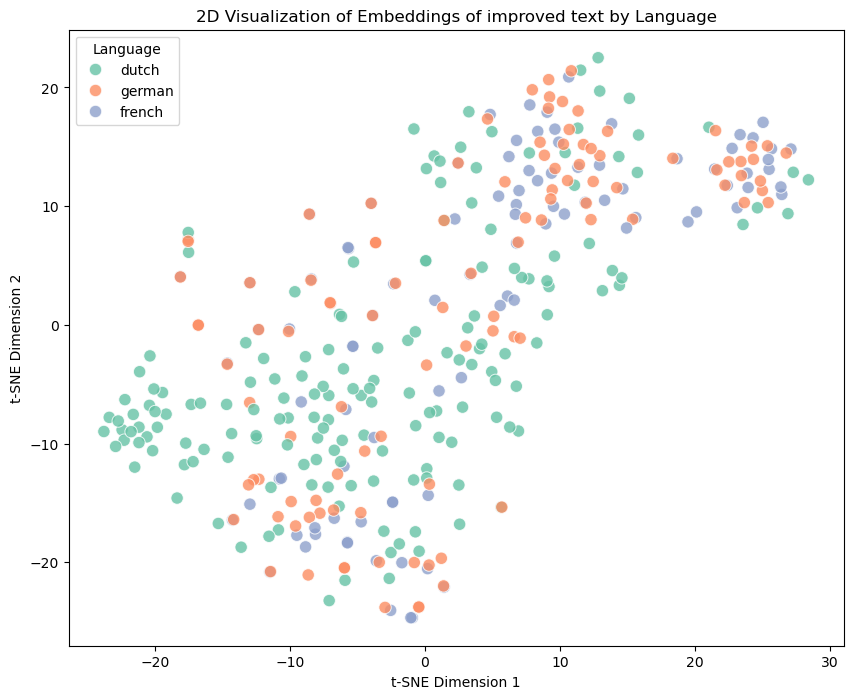

In [45]:
import polars as pl
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE

# Define your list of expected languages and the expected dimension size
languages = ['french', 'dutch', 'german']
EXPECTED_DIM = 384  # Adjust if your embeddings are a different size

# Store extracted embeddings in a list of dicts
embedding_data = []

# Iterate once over df and collect valid embeddings
for row in raw_embedding_df.iter_rows(named=True):
    for lang in languages:
        emb_col = f"{lang}_embedding"
        emb = row.get(emb_col, None)
        # Check if embedding is not None and has the expected dimension
        if emb is not None:
            emb_array = np.array(emb)
            if emb_array.shape[0] == EXPECTED_DIM:
                embedding_data.append({
                    "embedding": emb_array,
                    "language": lang
                })

# Convert to Polars DataFrame
emb_df = pl.DataFrame(embedding_data)

# Convert embeddings into NumPy array for t-SNE
# (At this point, we know all have shape (384,))
X = np.vstack(emb_df["embedding"].to_list())

# Apply t-SNE
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X)

# Add t-SNE dimensions back to Polars DataFrame
emb_df = emb_df.with_columns([
    pl.Series("tsne_1", X_tsne[:, 0]),
    pl.Series("tsne_2", X_tsne[:, 1])
])

# Convert to Pandas for visualization
emb_df_pandas = emb_df.to_pandas()

# Plot using Seaborn
plt.figure(figsize=(10, 8))
sns.scatterplot(
    data=emb_df_pandas,
    x="tsne_1",
    y="tsne_2",
    hue="language",
    palette="Set2",
    s=80,
    alpha=0.8
)
plt.title("2D Visualization of Embeddings of improved text by Language")
plt.xlabel("t-SNE Dimension 1")
plt.ylabel("t-SNE Dimension 2")
plt.legend(title="Language")
plt.show()


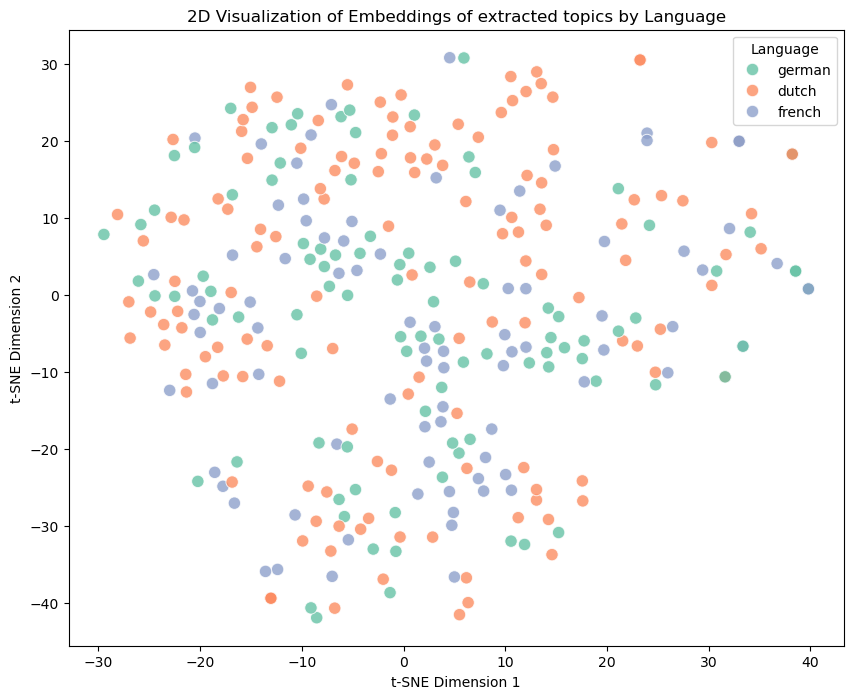

In [44]:
import polars as pl
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE

# Define your list of expected languages and the expected dimension size
languages = ['french', 'dutch', 'german']
EXPECTED_DIM = 384  # Adjust if your embeddings are a different size

# Store extracted embeddings in a list of dicts
embedding_data = []

# Iterate once over df and collect valid embeddings
for row in raw_embedding_df.iter_rows(named=True):
    for lang in languages:
        emb_col = f"topic_{lang}_embedding"
        emb = row.get(emb_col, None)
        # Check if embedding is not None and has the expected dimension
        if emb is not None:
            emb_array = np.array(emb)
            if emb_array.shape[0] == EXPECTED_DIM:
                embedding_data.append({
                    "embedding": emb_array,
                    "language": lang
                })

# Convert to Polars DataFrame
emb_df = pl.DataFrame(embedding_data)

# Convert embeddings into NumPy array for t-SNE
# (At this point, we know all have shape (384,))
X = np.vstack(emb_df["embedding"].to_list())

# Apply t-SNE
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X)

# Add t-SNE dimensions back to Polars DataFrame
emb_df = emb_df.with_columns([
    pl.Series("tsne_1", X_tsne[:, 0]),
    pl.Series("tsne_2", X_tsne[:, 1])
])

# Convert to Pandas for visualization
emb_df_pandas = emb_df.to_pandas()

# Plot using Seaborn
plt.figure(figsize=(10, 8))
sns.scatterplot(
    data=emb_df_pandas,
    x="tsne_1",
    y="tsne_2",
    hue="language",
    palette="Set2",
    s=80,
    alpha=0.8
)
plt.title("2D Visualization of Embeddings of extracted topics by Language")
plt.xlabel("t-SNE Dimension 1")
plt.ylabel("t-SNE Dimension 2")
plt.legend(title="Language")
plt.show()


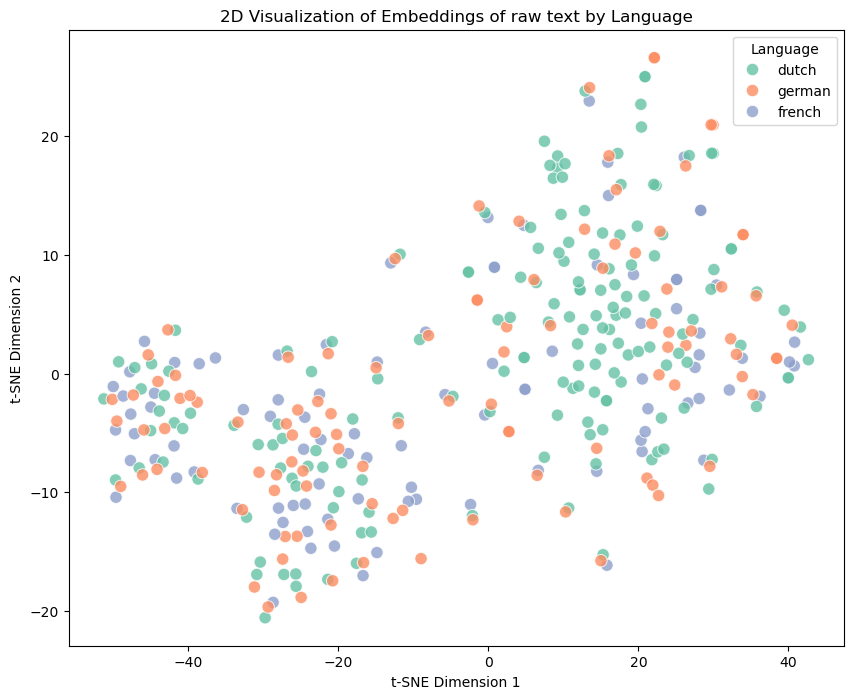

In [43]:
import polars as pl
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE

# Define your list of expected languages and the expected dimension size
languages = ['french', 'dutch', 'german']
EXPECTED_DIM = 384  # Adjust if your embeddings are a different size

# Store extracted embeddings in a list of dicts
embedding_data = []

# Iterate once over df and collect valid embeddings
for row in raw_embedding_df.iter_rows(named=True):
    for lang in languages:
        emb_col = f"raw_{lang}_embedding"
        emb = row.get(emb_col, None)
        # Check if embedding is not None and has the expected dimension
        if emb is not None:
            emb_array = np.array(emb)
            if emb_array.shape[0] == EXPECTED_DIM:
                embedding_data.append({
                    "embedding": emb_array,
                    "language": lang
                })

# Convert to Polars DataFrame
emb_df = pl.DataFrame(embedding_data)

# Convert embeddings into NumPy array for t-SNE
# (At this point, we know all have shape (384,))
X = np.vstack(emb_df["embedding"].to_list())

# Apply t-SNE
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X)

# Add t-SNE dimensions back to Polars DataFrame
emb_df = emb_df.with_columns([
    pl.Series("tsne_1", X_tsne[:, 0]),
    pl.Series("tsne_2", X_tsne[:, 1])
])

# Convert to Pandas for visualization
emb_df_pandas = emb_df.to_pandas()

# Plot using Seaborn
plt.figure(figsize=(10, 8))
sns.scatterplot(
    data=emb_df_pandas,
    x="tsne_1",
    y="tsne_2",
    hue="language",
    palette="Set2",
    s=80,
    alpha=0.8
)
plt.title("2D Visualization of Embeddings of raw text by Language")
plt.xlabel("t-SNE Dimension 1")
plt.ylabel("t-SNE Dimension 2")
plt.legend(title="Language")
plt.show()


sys:1: MapWithoutReturnDtypeWarning: Calling `map_elements` without specifying `return_dtype` can lead to unpredictable results. Specify `return_dtype` to silence this warning.
sys:1: MapWithoutReturnDtypeWarning: Calling `map_elements` without specifying `return_dtype` can lead to unpredictable results. Specify `return_dtype` to silence this warning.
sys:1: MapWithoutReturnDtypeWarning: Calling `map_elements` without specifying `return_dtype` can lead to unpredictable results. Specify `return_dtype` to silence this warning.


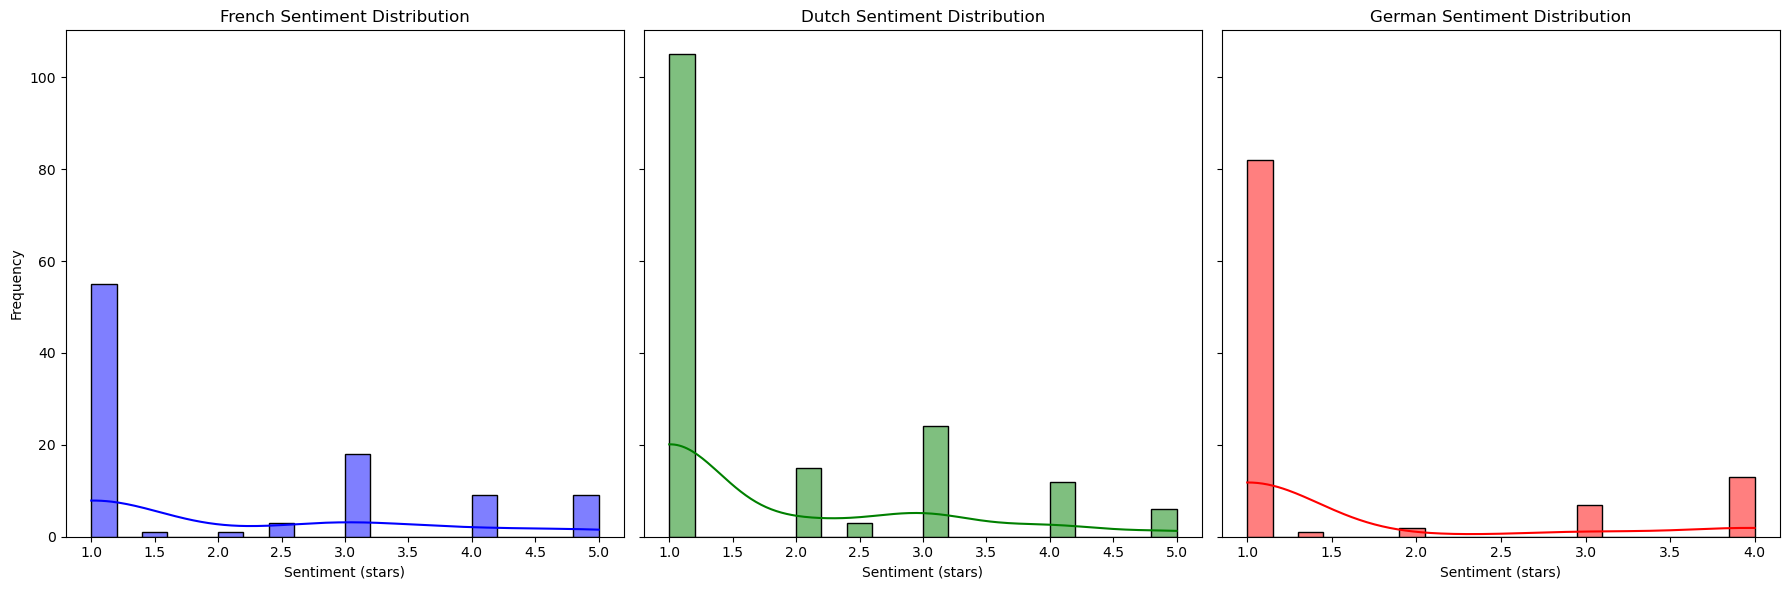

In [40]:
import polars as pl
import re
import seaborn as sns
import matplotlib.pyplot as plt

# Define a UDF to extract the numeric sentiment from a string (e.g., "4.20 stars")
def extract_sentiment_numeric_polars(val: str) -> float:
    if val is None:
        return None
    m = re.search(r'(\d+(\.\d+)?)', val)
    if m:
        return float(m.group(1))
    else:
        return None

# Assume `df` is your existing Polars DataFrame that includes the sentiment columns.
# Create new columns with the numeric sentiment values for French, Dutch, and German.
df = df.with_columns([
    pl.col("sentiment_french").map_elements(extract_sentiment_numeric_polars).alias("sentiment_french_numeric"),
    pl.col("sentiment_dutch").map_elements(extract_sentiment_numeric_polars).alias("sentiment_dutch_numeric"),
    pl.col("sentiment_german").map_elements(extract_sentiment_numeric_polars).alias("sentiment_german_numeric"),
])

# Convert the Polars DataFrame to pandas for plotting with Seaborn.
df_pdf = df.to_pandas()

# Create subplots for three histograms (one for each language)
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

# French Sentiment Histogram
sns.histplot(
    data=df_pdf,
    x="sentiment_french_numeric",
    bins=20,
    kde=True,
    ax=axes[0],
    color="blue"
)
axes[0].set_title("French Sentiment Distribution")
axes[0].set_xlabel("Sentiment (stars)")
axes[0].set_ylabel("Frequency")

# Dutch Sentiment Histogram
sns.histplot(
    data=df_pdf,
    x="sentiment_dutch_numeric",
    bins=20,
    kde=True,
    ax=axes[1],
    color="green"
)
axes[1].set_title("Dutch Sentiment Distribution")
axes[1].set_xlabel("Sentiment (stars)")

# German Sentiment Histogram
sns.histplot(
    data=df_pdf,
    x="sentiment_german_numeric",
    bins=20,
    kde=True,
    ax=axes[2],
    color="red"
)
axes[2].set_title("German Sentiment Distribution")
axes[2].set_xlabel("Sentiment (stars)")

plt.tight_layout()
plt.show()


C:\Users\romai\AppData\Local\Temp\ipykernel_18240\1085404920.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_topics, x='topic', y='count', palette="Oranges_d")


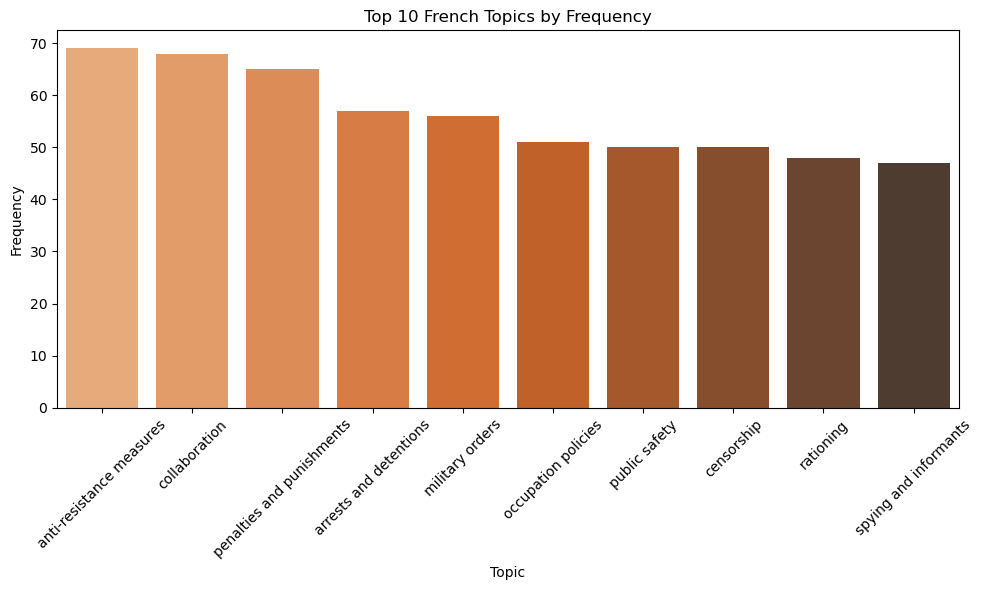

C:\Users\romai\AppData\Local\Temp\ipykernel_18240\1085404920.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_topics, x='topic', y='count', palette="Oranges_d")


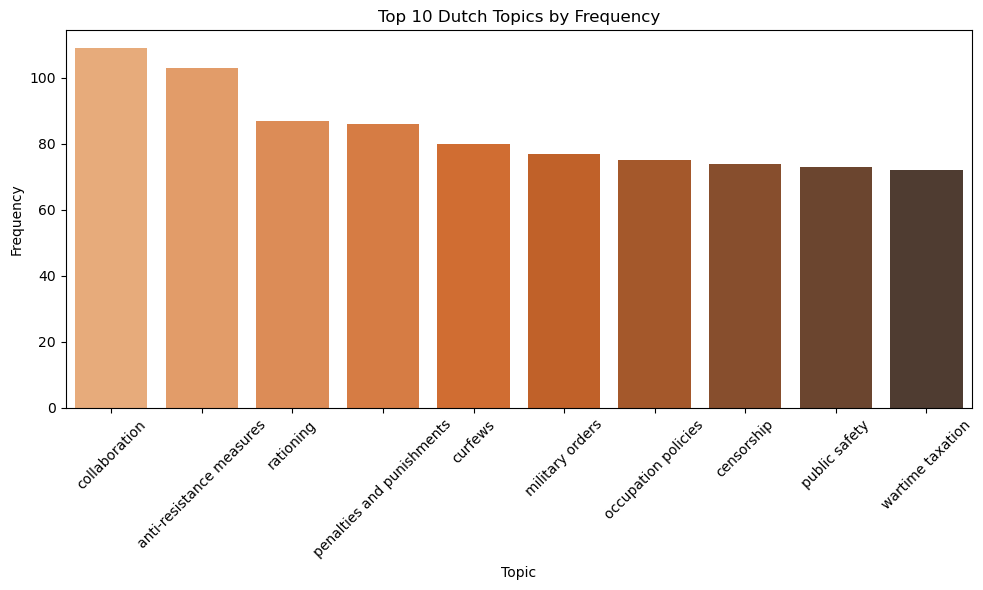

C:\Users\romai\AppData\Local\Temp\ipykernel_18240\1085404920.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_topics, x='topic', y='count', palette="Oranges_d")


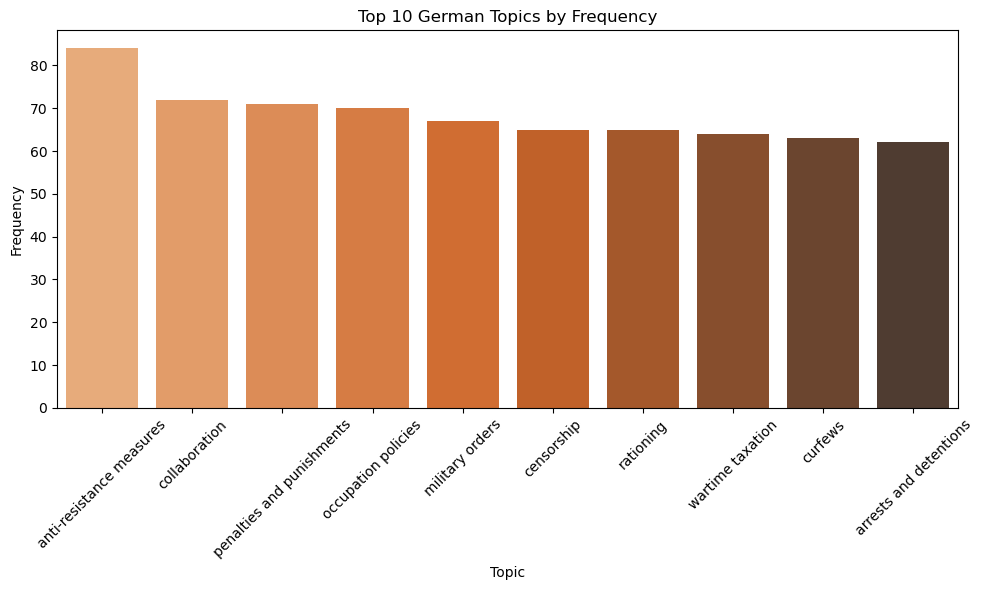

In [59]:
import re
import polars as pl
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

# Assume df is your Polars DataFrame containing the following columns:
# "topics_french_text", "topics_dutch_text", "topics_german_text"

languages = ['french', 'dutch', 'german']

for lang in languages:
    col_name = f"topics_{lang}_text"
    topic_list = []
    
    # Drop null values and convert the column to a list of strings.
    topics_values = df[col_name].drop_nulls().to_list()
    
    # Loop through each entry in the topics column.
    for topics in topics_values:
        # Ensure the string is not empty.
        if topics.strip():
            # Split the comma-separated topics and strip whitespace.
            for topic in topics.split(','):
                topic = topic.strip()
                if topic:
                    topic_list.append(topic)
    
    # Count frequency of each topic.
    topic_counts = Counter(topic_list)
    
    # Convert the counts to a pandas DataFrame.
    topic_df = pd.DataFrame(topic_counts.items(), columns=['topic', 'count'])
    
    # Take the top 10 topics by frequency.
    top_topics = topic_df.sort_values(by='count', ascending=False).head(10)
    
    # Plot the results.
    plt.figure(figsize=(10, 6))
    sns.barplot(data=top_topics, x='topic', y='count', palette="Oranges_d")
    plt.title(f"Top 10 {lang.capitalize()} Topics by Frequency")
    plt.xlabel("Topic")
    plt.ylabel("Frequency")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


In [ ]:
%%python -m spacy download fr_core_news_sm
%%python -m spacy download nl_core_news_sm
%%python -m spacy download de_core_news_sm

UsageError: %%python is a cell magic, but the cell body is empty.


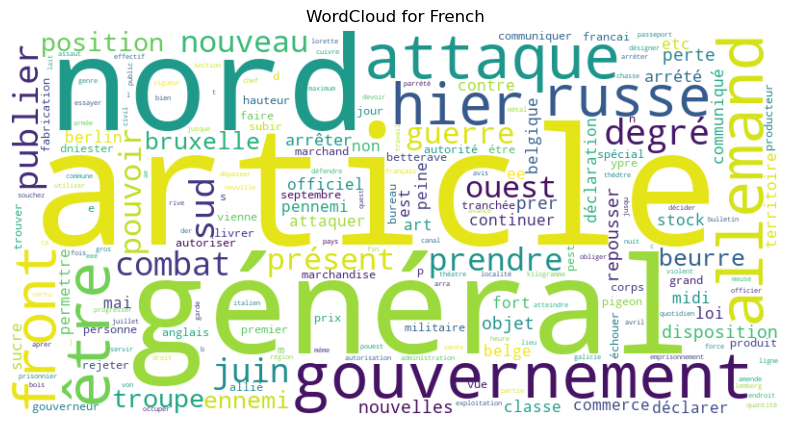

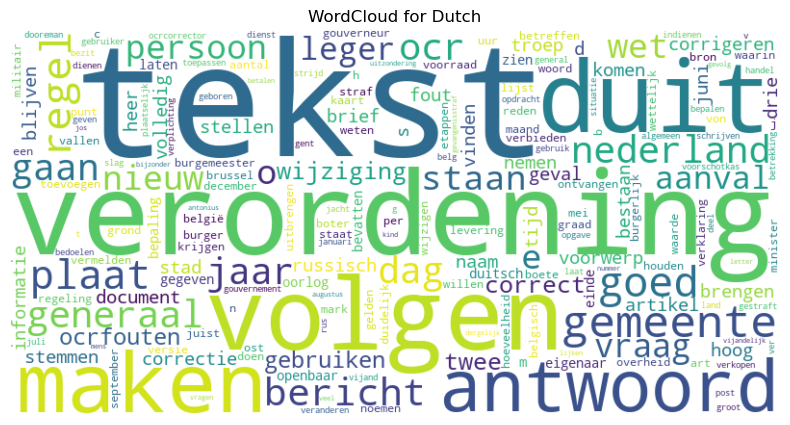

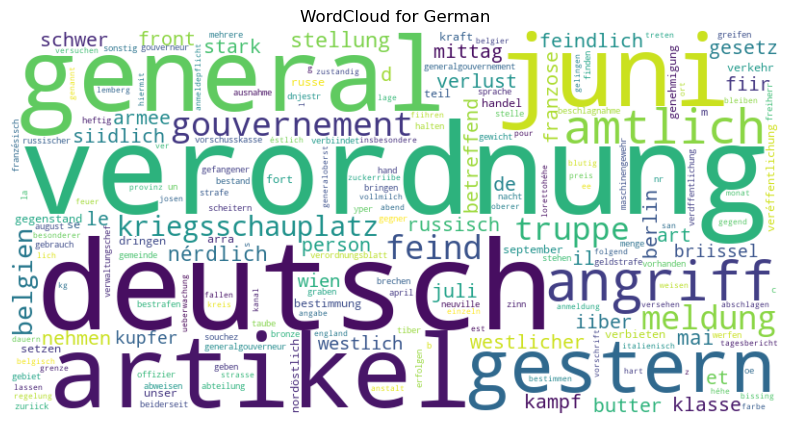

In [56]:
import spacy
import re
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

# Load spaCy models for French, Dutch, and German.
nlp_fr = spacy.load("fr_core_news_sm")
nlp_nl = spacy.load("nl_core_news_sm")
nlp_de = spacy.load("de_core_news_sm")

def preprocess_text(text, language):
    """
    Preprocess the text using spaCy:
      - Lowercase
      - Remove punctuation
      - Remove stopwords
      - Lemmatize tokens
    """
    # Select the appropriate spaCy model
    if language == "french":
        nlp = nlp_fr
    elif language == "dutch":
        nlp = nlp_nl
    elif language == "german":
        nlp = nlp_de
    else:
        return text.lower()  # fallback

    # Process the text with spaCy.
    doc = nlp(text)
    tokens = []
    for token in doc:
        if token.is_stop or token.is_punct:
            continue
        # Use the lemma and ensure it's lowercase and stripped of extra whitespace.
        lemma = token.lemma_.lower().strip()
        if lemma:
            tokens.append(lemma)
    return " ".join(tokens)

languages = ['french', 'dutch', 'german']

for lang in languages:
    text_data = " ".join(df[f"improved_{lang}_text"].drop_nulls().to_list())

    # Preprocess the text thoroughly.
    processed_text = preprocess_text(text_data, lang)

    # Generate the word cloud.
    wordcloud = WordCloud(
        width=800,
        height=400,
        background_color="white",
        collocations=False,
        stopwords=STOPWORDS
    ).generate(processed_text)

    # Plot the word cloud.
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title(f"WordCloud for {lang.capitalize()}")
    plt.show()


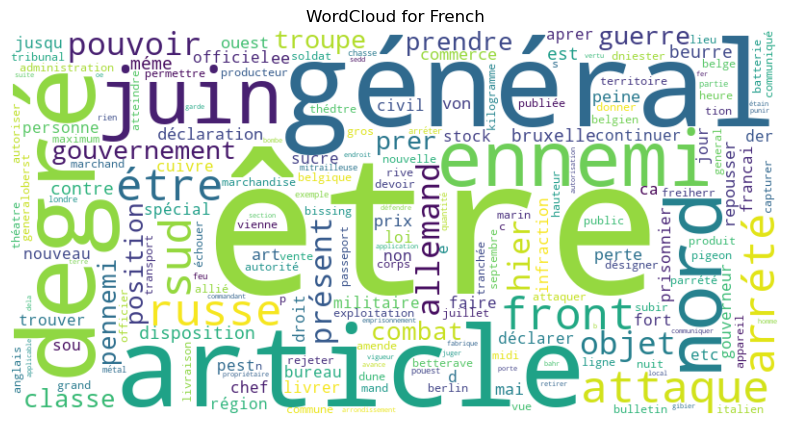

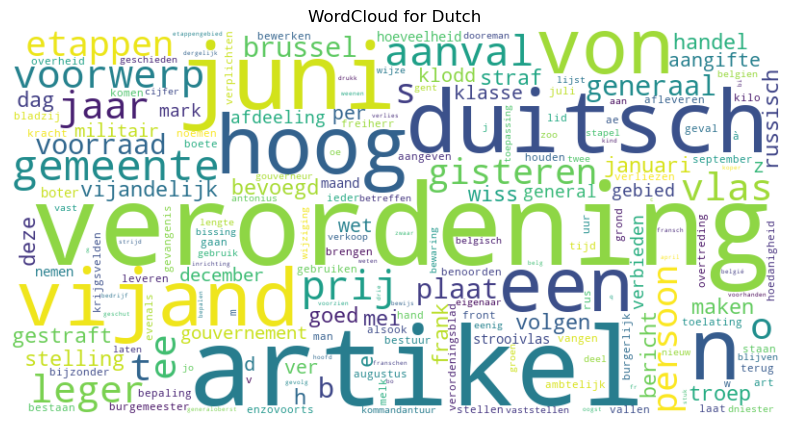

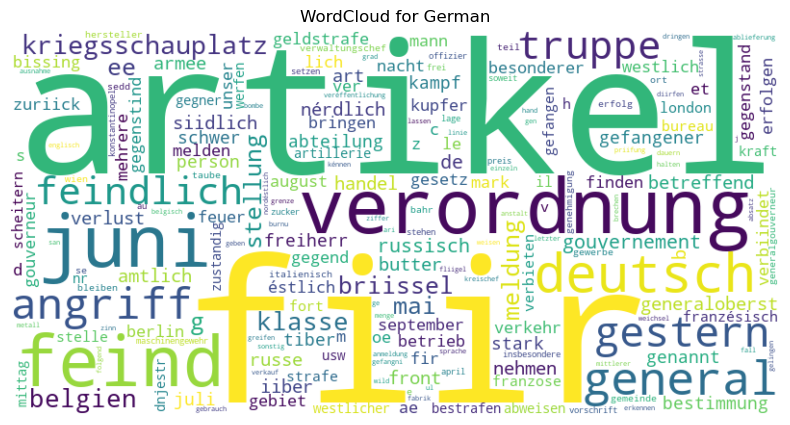

In [57]:
import spacy
import re
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

# Load spaCy models for French, Dutch, and German.
nlp_fr = spacy.load("fr_core_news_sm")
nlp_nl = spacy.load("nl_core_news_sm")
nlp_de = spacy.load("de_core_news_sm")

def preprocess_text(text, language):
    """
    Preprocess the text using spaCy:
      - Lowercase
      - Remove punctuation
      - Remove stopwords
      - Lemmatize tokens
    """
    # Select the appropriate spaCy model
    if language == "french":
        nlp = nlp_fr
    elif language == "dutch":
        nlp = nlp_nl
    elif language == "german":
        nlp = nlp_de
    else:
        return text.lower()  # fallback

    # Process the text with spaCy.
    doc = nlp(text)
    tokens = []
    for token in doc:
        if token.is_stop or token.is_punct:
            continue
        # Use the lemma and ensure it's lowercase and stripped of extra whitespace.
        lemma = token.lemma_.lower().strip()
        if lemma:
            tokens.append(lemma)
    return " ".join(tokens)

languages = ['french', 'dutch', 'german']

for lang in languages:
    text_data = " ".join(df[f"{lang}_text"].drop_nulls().to_list())

    # Preprocess the text thoroughly.
    processed_text = preprocess_text(text_data, lang)

    # Generate the word cloud.
    wordcloud = WordCloud(
        width=800,
        height=400,
        background_color="white",
        collocations=False,
        stopwords=STOPWORDS
    ).generate(processed_text)

    # Plot the word cloud.
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title(f"WordCloud for {lang.capitalize()}")
    plt.show()
